# **Assignment Instructions:**

1. Read all Instructions carefully provided for each question before beginning your work.

2. Analyze each question thoroughly and document your result, and
analysis within the Google Colab notebook itself.


3. This is an individual assignment. Your work should be original. Copying from peers or online sources is strictly prohibited.

4. The use of AI tools like ChatGPT, Copilot, Gemini, LLMs or any other automated code generation tools for writing code is strictly forbidden.

5. Clearly document your code with comments and explanations so that it is easy to understand your approach and thought process. It is ok to take help from some external tutorial; however cite it in your documenation otherwise it will be considered plagiarism.

6. Follow the submission guidelines strictly. Make sure your notebook is well-organized and includes all necessary code, explanations, and outputs.

7. The dataset usage instructions are present along with each task along with the README.md on [Exploration-Lab/CS779-Fall25](https://huggingface.co/datasets/Exploration-Lab/CS779-Fall25)

8. **For the assignment submission you will have to implement all the tasks on this colab notebook with clear explanations for the complete code. Then, download this colab notebook as .ipynb file, zip it along with the expected deliverables mentioned for each task. Finally, submit the zip file via this form: https://forms.gle/QKhzKwECCVRWcBMW9** (Look at the [Final Submission Guidelines] below)
9. The name of the zip file should follow this format: `CS779-A6-[Firstname]-[Lastname]-[Rollno].zip` (Just as in discord) where you have to replace [Firstname] with your actual first name and same for [Lastname] and [Rollno]. If you fail to do this, then we will not able to recover your assignment from pool of assignments as the process is automated.

10. **The deadline for submission is November 12, 2025, 11:59 PM. Note that this is a strict deadline.**

11. The above form will close at the above mentioned deadline and no further solutions will be accepted either by email or by any other means.

12. If you have any doubt or get stuck in any problem, consult  TA's over Discord. It's better to take help of TAs than cheating.



<h1><b>NER Introduction & Motivation</b></h1>

<h5>Imagine you are reading a news article:

*“On **3rd September 2025**, CM Yogi Adityanath visited IIT Kanpur during the **Samanvay-2025** programme, calling on the institute to lead India’s deep tech ambitions.”*

<h5>As humans, we instantly recognize that:

- *Yogi Adityanath* is a **Person**  
- *IIT Kanpur* is an **Institution / Location**  
- *Samanvay-2025* is an **Event**  
- *3rd September 2025* is a **Date**  
- *India* is a **Country**  
- *Deep Tech* is a **Domain / Field**  

For machines, however, identifying these entities is not straightforward. This is where **Named Entity Recognition (NER)** comes in — a core **Natural Language Processing (NLP)** task that extracts real-world objects (people, places, organizations, events, time expressions, etc.) from unstructured text.

---

# Historical & Related Work

The history of NER is tied to the evolution of NLP itself:

### Rule-based systems (1980s–1990s)
- Early systems relied on **hand-crafted linguistic rules** and **gazetteers** (dictionaries of names).  
- Example: If a word follows *“Mr.”*, it is likely a **Person**.  
- **Limitation:** Not scalable across domains or languages.  

### Statistical Models (1990s–2000s)
- With more annotated data, researchers shifted to **probabilistic models** like:  
  - Hidden Markov Models (HMMs)  
  - Maximum Entropy Models  
  - Conditional Random Fields (CRFs)  
- CRFs became a **gold standard** for NER, as they model label dependencies.  

### Neural Models (2010s–present)
- With the rise of deep learning, **Recurrent Neural Networks (RNNs)**, especially **Long Short-Term Memory (LSTM)** models, improved performance by capturing **contextual dependencies** in text.  
- Later, **BiLSTM-CRF** became the state-of-the-art (combining sequence modeling with structured prediction).  
- Today, **transformers** (BERT, RoBERTa, GPT-based models) dominate NER, but LSTM remains important for **foundational understanding** and **resource-constrained setups**.  

---

# Why Data Analysis Matters in Classical NLP

Before deep learning, classical NLP models heavily depended on:

- **Feature engineering** (POS tags, capitalization, prefixes/suffixes).  
- **Statistical assumptions** (Markov property in HMMs, linear dependencies in CRFs).  
- **Data preprocessing** (removing noise, balancing entity types).  

Thus, **data analysis** was crucial:  

- Understanding class distribution helped avoid bias.  
- Identifying rare entity types guided feature design.  
- Detecting errors in annotation improved robustness.  

Even in neural methods, exploratory analysis remains vital for **token distributions, sequence lengths, and vocabulary coverage**.  

---

# Task Motivation

We aim to build NER system that:  

- Learns sequential patterns in text.  
- Captures dependencies across words (e.g., *“New” → “Delhi”* both belong to the same entity).  
- Generalizes beyond simple rules or handcrafted features.  




 Named entity recognition (NER) presents a challenge for modern machine learning, wherein a learner must deduce which word tokens refer to people, locations and organizations (along with other possible entity types).
 The task demands that the learner generalize from limited training data and to novel entities, often in new domains. Traditionally, state-of-the-art NER models have relied
 on hand-crafted features that pick up on distributional cues as well as portions of the word forms themselves.


 In the past few years, however, neural approaches that jointly learn their own features have surpassed the feature-based approaches in performance. Despite their empirical success, neural networks have remarkably high sample complexity and still only outperform hand-engineered feature approaches when enough supervised training data is available, leaving effective training of neural networks in the low-resource case a challenge.

Named Entity Recognition (NER) is a foundational NLP task that aims to provide class labels like Person, Location,
Organisation, Time, and Number to words in free text.

Named Entities can also be multi-word expressions where the additional
I-O-B annotation information helps label them during the NER annotation process.

 While English and European languages
have considerable annotated data for the NER task, Indian languages lack on that front- both in terms of quantity and following
annotation standards.



\<h1><b>Previous  Works on  Hindi-NER </b></h1>

<h5>Ner on this dataset  shows that F1 score of 88.78 with all the tags and 92.22 when
they  collapse the tag-set, as discussed in the paper.

<h5>To the best of  knowledge, no available dataset meets the standards of volume (amount) and variability (diversity), as far as Hindi NER is concerned.

<h1><B>WHY THIS DATASET?
</B></H1>
<h5>NER systems trained on this dataset
are expected to perform better than the existing systems trained on lesser data.

<h5>Existing datasets are either much <b>smaller</b> or have been <b>automatically annotated (silver
standard)</b>, rendering them incapable of performing the NER task with high accuracy.

For  creation of a Hindi NER system, there are various  linguistic challenges like:

<h3><b>No Capitalization:</b></h3>
<h5>Unlike English, Hindi does not have capitalization as a feature, which could have been helpful for performing the NER task.
For example:
In English, if we see <b>Aman</b>, we can detect it is a name.
But in Hindi, if it is written as <b>अमन</b>, you cannot get any idea from capitalization

<h3><b>Ambiguity:</h3></b>
<h5>Proper nouns in Hindi can be ambiguous as the same word can belong to a different PoS category. For example, a common Indian name like <b>Kiran</b> can be both a proper noun (used as a person’s name) and a common noun meaning <b>a ray of light</b>.

<h3><b>Spellings:</b></h3>
<h5>The spelling of some words in Hindi can differ depending on the local region in India. For example, the word “Sabzi” is written as<b> “सब्ज़ी”</b> or <b>“सब्जी”</b>, though both forms denote vegetable.
<h3><b>Word Order:</b></h3>
<h5>Languages like
Hindi has relatively more flexible word order compared to English, so the same meaning can appear in different forms.
<br>Example:<br>
<b>गौतम घर गया। (Gautam went home.)</b>
<br>
<b>घर गया गौतम। (Home went Gautam.)</b>
<br>
Both mean the same, but entities <b>गौतम(Gautam) </b>(PERSON) and घर (LOCATION) shift places, unlike English where word order is fixed.<br>
In English, the sentence is fixed as “Gautam went home.”<br>If we change the order (like “Went home Gautam”), it sounds odd.<br>
This make the NER task more challenging as computational approaches can not
be complemented with a pattern of PoS tags, or
strict word order.

<h4><b>Due to the challenges discussed above, it is imperative to train Hindi NER models with a sizeable human-annotated dataset so that deep learning-based approaches can generalize and perform well.
<h4><b>The  dataset was collected
with the help of one annotator and perform experiments to evaluate the efficacy of various deep learning-based approaches.






# Task 1: Data Analysis (300 marks)


## Dataset Description
You will work with the Hindi NER dataset provided on the hugging face {Read Instructions at the start of the colab notebook for the Dataset discription}. The dataset consists of sentences with tokens and their corresponding NER tags. The dataset follows the BIO tagging scheme:

---------------------------------------------------

### BIO Tagging Scheme:

- B- Beginning of an entity
- I- Inside/continuation of an entity
- O Outside any entity


-----------------------------

The list of NER tags includes:

B-FESTIVAL

B-GAME

B-LANGUAGE

B-LITERATURE

B-LOCATION

B-MISC

B-NUMEX

B-ORGANIZATION

B-PERSON

B-RELIGION

B-TIMEX

I-FESTIVAL

I-GAME

I-LANGUAGE

I-LITERATURE

I-LOCATION

I-MISC

I-NUMEX

I-ORGANIZATION

I-PERSON

I-RELIGION

I-TIMEX

O

The data can be fetched using the datasets Hugging Face API.

Lets first get familiar with the data. This task is step by step guide through core data‐analysis tasks for the Hindi NER dataset.

Ensure you have your hf token ready to access the dataset.

###1.1 Setup and Data Loading

####Installing required libraries and  hugging face token setup

In [ ]:
# Install required libraries
!pip install datasets --quiet
!pip install --upgrade huggingface_hub --quiet

# Hugging Face token setup
from huggingface_hub import login

# Prompt user to enter their HF token
# You can get your token from: https://huggingface.co/settings/tokens
login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.0/515.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.57.1 requires huggingface-hub<1.0,>=0.34.0, but you have huggingface-hub 1.1.2 which is incompatible.


In [ ]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from datasets import load_dataset

In [ ]:
# Load the dataset
# ------------------------------
# Load the HuggingFace dataset using your token
train = load_dataset("Exploration-Lab/CS779-Fall25", "Assignment-4", split="train")
val = load_dataset("Exploration-Lab/CS779-Fall25", "Assignment-4", split="val")
test = load_dataset("Exploration-Lab/CS779-Fall25", "Assignment-4", split="test")

README.md:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

Assignment-4/train.parquet:   0%|          | 0.00/7.24M [00:00<?, ?B/s]

Assignment-4/test.parquet:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

Assignment-4/val.parquet:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75827 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/21657 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/10851 [00:00<?, ? examples/s]

In [ ]:
# Convert to pandas DataFrames

df_train = train.to_pandas()
df_val = val.to_pandas()
df_test = test.to_pandas()

Convert the parquet file into a CoNLL format suitable for NER tasks.
--

In [ ]:
# Label mapping (0-based indexing)
LABEL_LIST = [
    "B-FESTIVAL", "B-GAME", "B-LANGUAGE", "B-LITERATURE", "B-LOCATION",
    "B-MISC", "B-NUMEX", "B-ORGANIZATION", "B-PERSON", "B-RELIGION", "B-TIMEX",
    "I-FESTIVAL", "I-GAME", "I-LANGUAGE", "I-LITERATURE", "I-LOCATION",
    "I-MISC", "I-NUMEX", "I-ORGANIZATION", "I-PERSON", "I-RELIGION", "I-TIMEX",
    "O"
]

# Output folder
output_dir = "conll_output"
os.makedirs(output_dir, exist_ok=True)

def to_conll(dataset, split_name, sep=" "):  # set sep="\t" if you want tab instead of space
    out_file = os.path.join(output_dir, f"{split_name}.conll")

    with open(out_file, "w", encoding="utf-8") as f:
        for example in dataset:
            tokens = example["tokens"]
            labels = example["ner_tags"]  # integers (0-based)

            for token, label_id in zip(tokens, labels):
                label_str = LABEL_LIST[label_id]  # direct map
                f.write(f"{token}{sep}{label_str}\n")
            f.write("\n")  # blank line between sentences

# Convert all splits
to_conll(train, "train")
to_conll(val, "val")
to_conll(test, "test")


###Data Analysis Functions

###1.2 Sentence & Token Length Distributions

####1.2.1 Words per Sentence

In [ ]:
def sentence_word_counts(df, col):
    """
    Return a list with the number of words in each sentence.
    """
    return [len(sentence) for sentence in df[col]]


def plot_sentence_length_distribution(counts):
    """
    Plot histogram of sentence lengths.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(counts, bins=50, kde=True)
    plt.title('Sentence Length Distribution')
    plt.xlabel('Number of Words per Sentence')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
def word_lengths(df, col):
    """
    Return a list with the lengths of all words in the dataset.
    """
    all_words = [word for sentence in df[col] for word in sentence]
    return [len(word) for word in all_words]

In [ ]:
def plot_word_length_distribution(lengths):
    """
    Plot histogram of word lengths.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=30, kde=True)
    plt.title('Word Length Distribution')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.show()

###1.3 NER Tag Distribution


In [ ]:
def extract_ner_tags(df, col):
    """
    Return a flat list of all NER tags in the dataset.
    """
    all_tags = [tag for sentence_tags in df[col] for tag in sentence_tags]
    return all_tags

def plot_ner_tag_distribution(tags, label_list):
    """
    Plot distribution of NER tags (flattened).
    """
    tag_counts = Counter(tags)
    tag_names = [label_list[i] for i in tag_counts.keys()]
    counts = list(tag_counts.values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=tag_names, y=counts)
    plt.title('NER Tag Distribution')
    plt.xlabel('Tag')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
def tag_popularity(tags, label_list):
    """
    Return most and least frequent tags.
    """
    tag_counts = Counter(tags)
    most_common = tag_counts.most_common(1)[0]
    least_common = tag_counts.most_common()[-1:][0]
    return (label_list[most_common[0]], most_common[1]), (label_list[least_common[0]], least_common[1])

###1.4 Top Words per Entity Type


In [ ]:
def top_words_for_tag(df, token_col, tag_col, target_tag_id, top_n=10):
    """
    Return the most frequent words assigned a given tag (by index).
    """
    word_tag_pairs = [(word, tag) for sentence_tokens, sentence_tags in zip(df[token_col], df[tag_col]) for word, tag in zip(sentence_tokens, sentence_tags)]
    tagged_words = [word for word, tag in word_tag_pairs if tag == target_tag_id]
    word_counts = Counter(tagged_words)
    return word_counts.most_common(top_n)

In [ ]:
# 1. Download the specific font file
!wget -q -O /usr/local/share/fonts/NotoSansDevanagari-Regular.ttf \
  https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf

import matplotlib as mpl
from matplotlib import font_manager as fm

fm.fontManager.addfont('/usr/local/share/fonts/NotoSansDevanagari-Regular.ttf')
try:
    fm._load_fontmanager(try_read_cache=False)
except TypeError:
    mpl.font_manager._rebuild()

print("Font cache rebuilt. 'Noto Sans Devanagari' is now available.")

Font cache rebuilt. 'Noto Sans Devanagari' is now available.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import re  # Import the regular expression module

def get_font_for_word(word):
    """
    Checks a word for Devanagari characters and returns the
    appropriate font family name.
    """
    devanagari_regex = re.compile(r'[\u0900-\u097F]')

    if devanagari_regex.search(word):
        return 'Noto Sans Devanagari'
    else:
        return 'DejaVu Sans'

def plot_top_words_for_tag(tag_name, top_words):
    """
    Plot the top words associated with a given tag.
    """

    words = [word for word, count in top_words]
    counts = [count for word, count in top_words]

    plt.figure(figsize=(10, 6))


    ax = sns.barplot(x=counts, y=words)

    plt.title(f'Top 10 Words for Tag: {tag_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')

    ytick_labels = ax.get_yticklabels()

    for label in ytick_labels:
        word = label.get_text()

        font_name = get_font_for_word(word)

        label.set_fontfamily(font_name)

    plt.tight_layout()
    plt.show()

### 1.5 N-Gram Tag Distributions

N-gram tag frequency distributions at unigram, bigram, and trigram levels.

**(i).** Unigram Tag Frequencies:

Unigram distributions show the overall frequency of individual tags.
  * This distribution typically follows Zipf's law.
  (Do you remember this concept form you past assignments and does the plots you get are following the law?) .
  
  * The unigram frequencies serve as the baseline emission probabilities in HMM models, indicating how likely each word is to be tagged with a specific tag.

    * For example, in English corpora, words like articles and prepositions dominate the frequency distribution, while content words like specific nouns appear less frequently. This pattern reflects the fundamental structure of natural language where a small number of elements are used repeatedly.

**(ii).** Bigram Tag Frequencies:

Bigram tag sequences capture the transition patterns between consecutive tags, which form the core of HMM transition probabilities.


**(iii).** Trigram Tag Frequencies:

Trigram patterns provide deeper contextual understanding by capturing longer-range dependencies between three consecutive tags.

In [ ]:
def generate_ngrams(seq, n):
    """
    Yield n-grams from a sequence.
    """
    for i in range(len(seq) - n + 1):
        yield tuple(seq[i : i + n])

def tag_ngram_distribution(df_tags, n):
    """
    Return n-gram tag frequency Counter.
    """
    all_tags = [tag for sentence_tags in df_tags for tag in sentence_tags]
    ngrams = generate_ngrams(all_tags, n)
    return Counter(ngrams)

In [ ]:
def plot_ngram_distribution(counter, title, label_list, top_n=10):
    """
    Plot top-N n-grams as bar chart.
    """
    if not counter:
        print(f"No n-grams to plot for: {title}")
        return

    top_ngrams = counter.most_common(top_n)
    if not top_ngrams:
        print(f"No n-grams to plot for: {title}")
        return

    ngram_labels = []
    counts = []
    for ngram, count in top_ngrams:
        # Convert tuple of tag IDs back to tag names
        ngram_names = tuple(label_list[tag_id] for tag_id in ngram)
        ngram_labels.append(" -> ".join(ngram_names))
        counts.append(count)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=counts, y=ngram_labels)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-Gram')
    plt.tight_layout()
    plt.show()

###1.6 Execution Block

--- Training Data Summary ---
Number of sentences: 75827
Total number of tokens: 1544838
-------------------------

--- Sentence Length Distribution (Train) ---
Average sentence length: 20.37
Median sentence length: 18.0
Max sentence length: 180


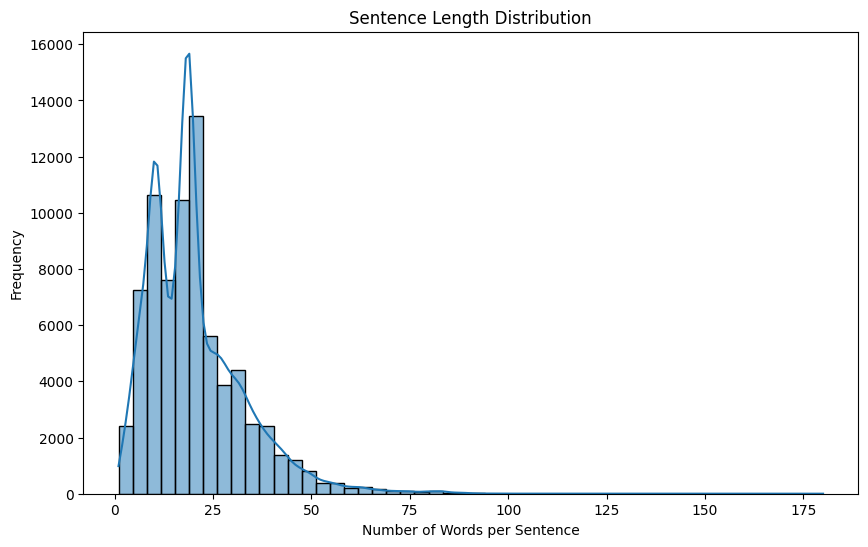

-------------------------

--- Word Length Distribution (Train) ---
Average word length: 4.02
Median word length: 4.0
Max word length: 211


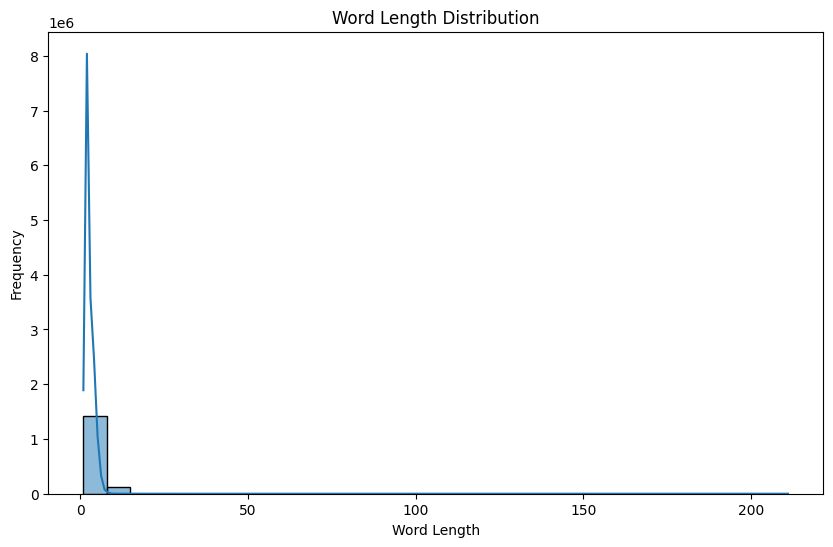

-------------------------

--- NER Tag Distribution (Train) ---


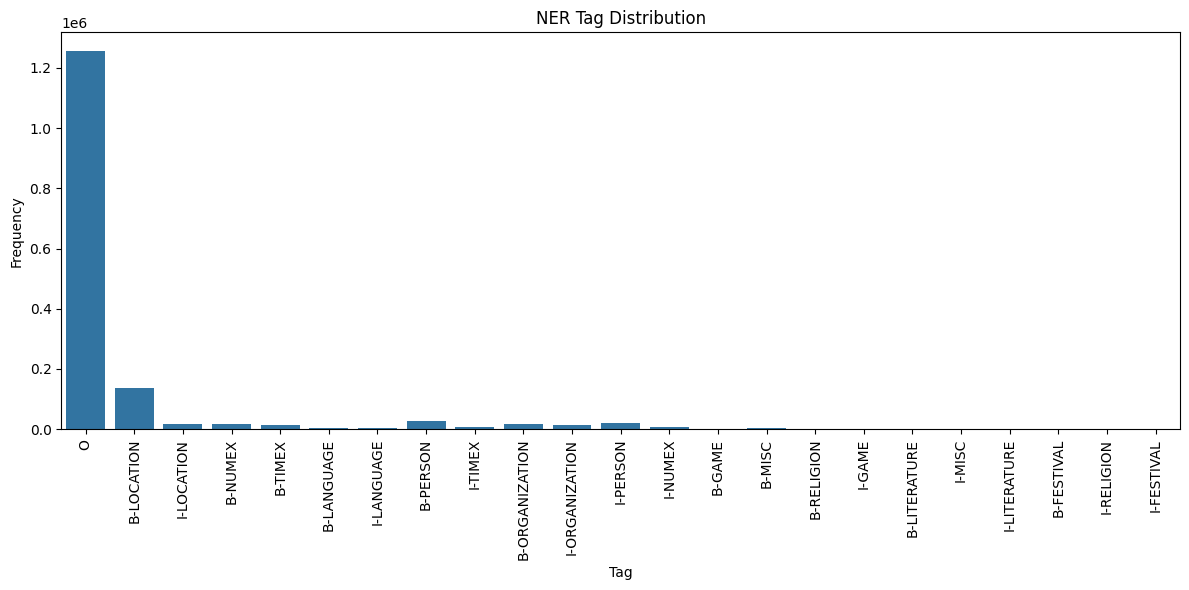

-------------------------

--- Most/Least Frequent Tags (Train) ---
Most common tag: O (Frequency: 1255661)
Least common tag: I-RELIGION (Frequency: 63)
-------------------------

--- Top Words per Tag (Train) ---


/tmp/ipython-input-1292805113.py:59: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-1292805113.py:59: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


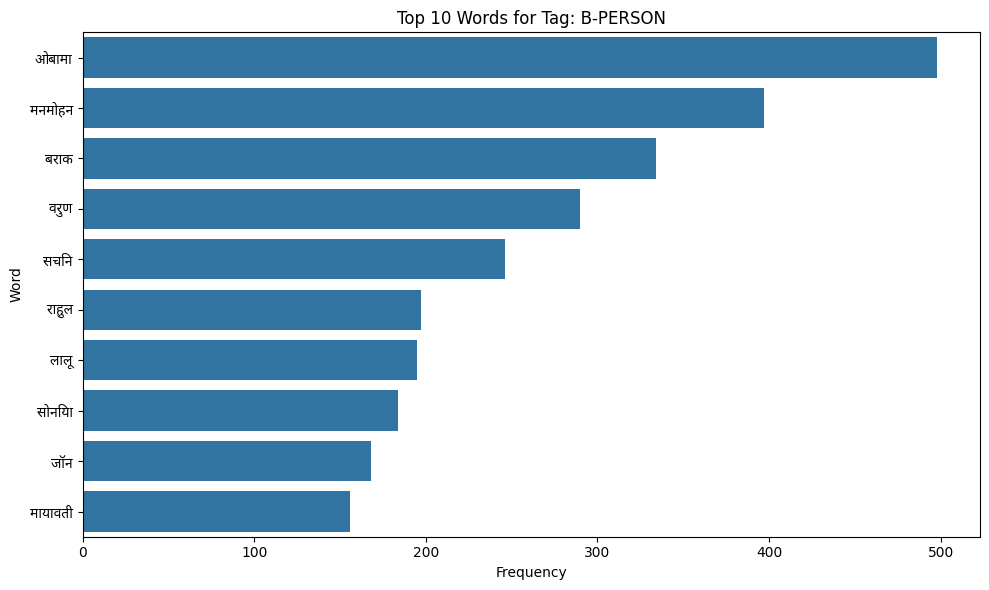

/tmp/ipython-input-1292805113.py:59: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-1292805113.py:59: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


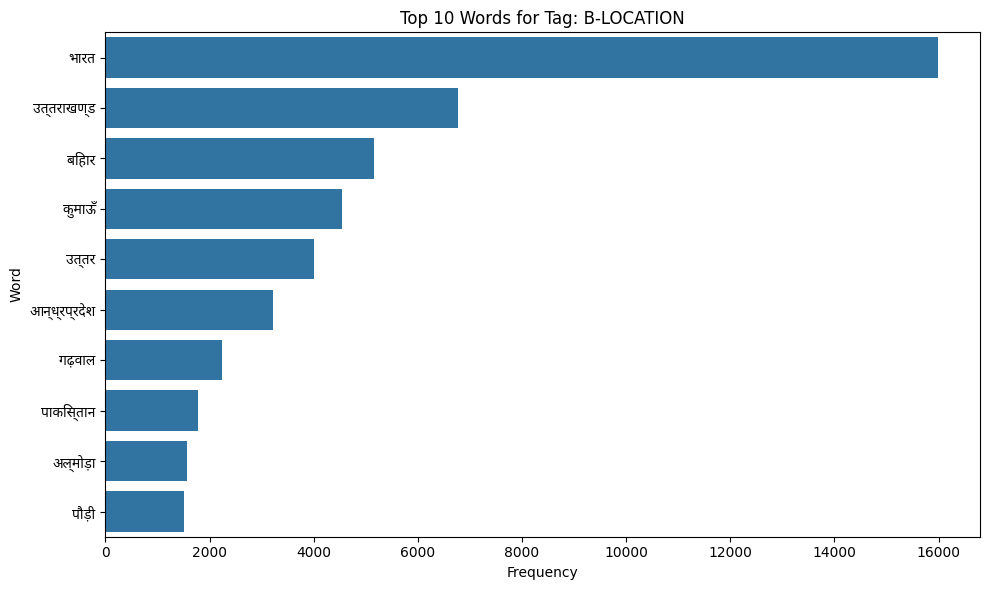

/tmp/ipython-input-1292805113.py:59: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-1292805113.py:59: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


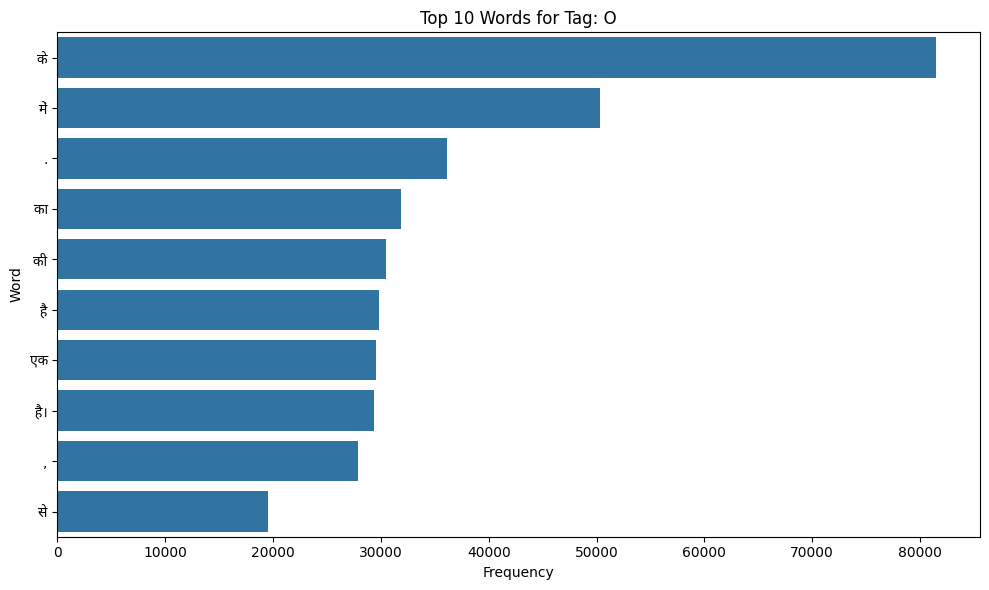

-------------------------

--- Tag N-Gram Distributions (Train) ---


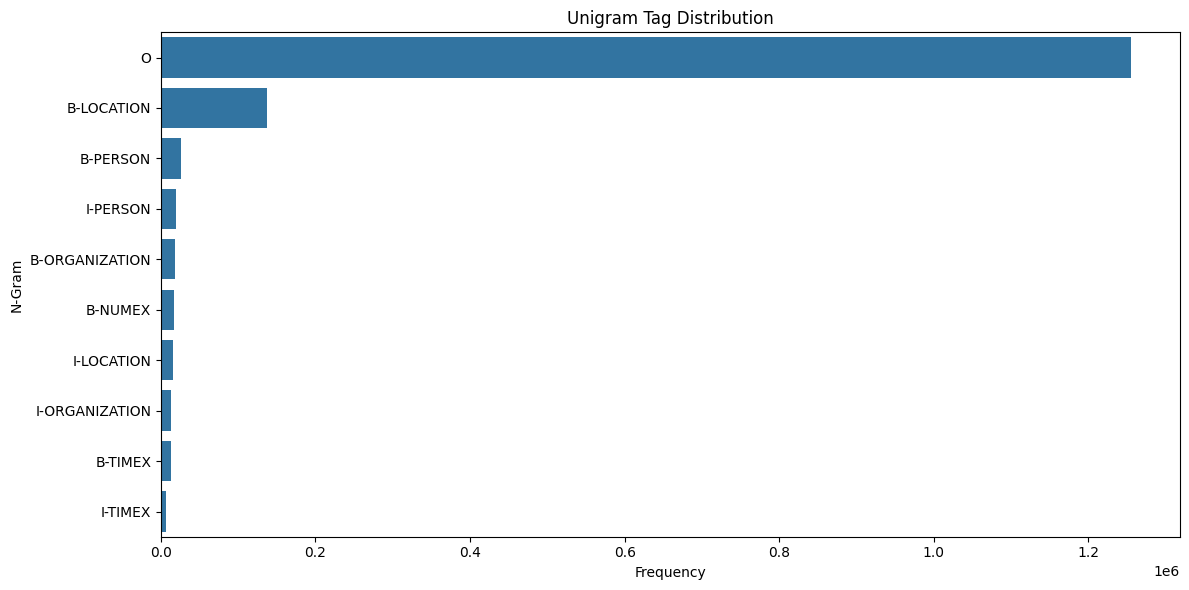

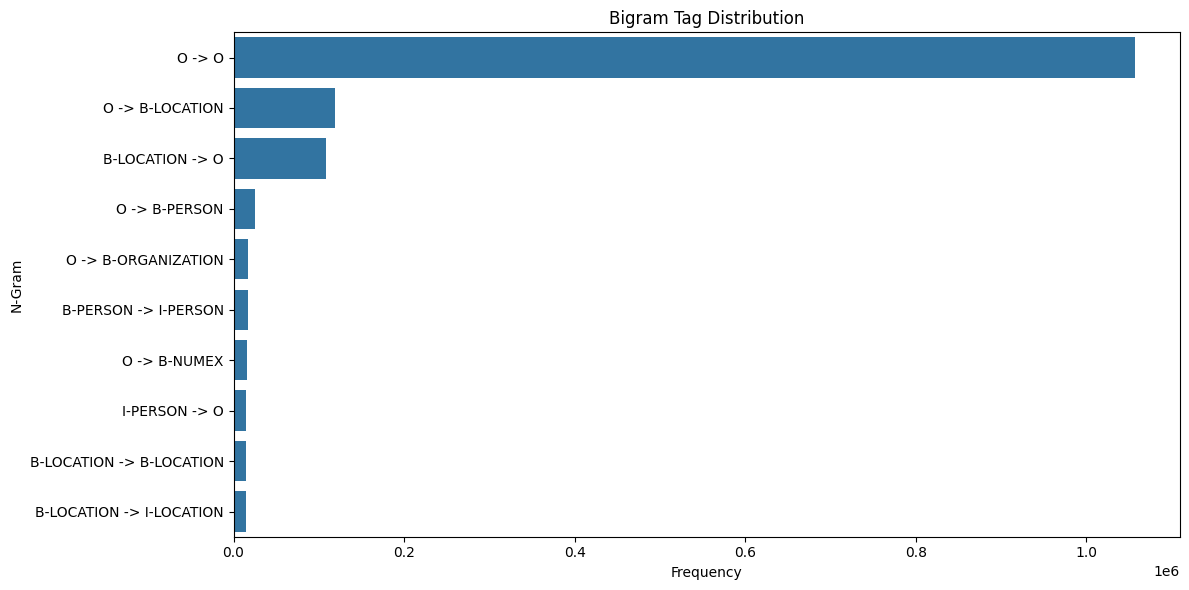

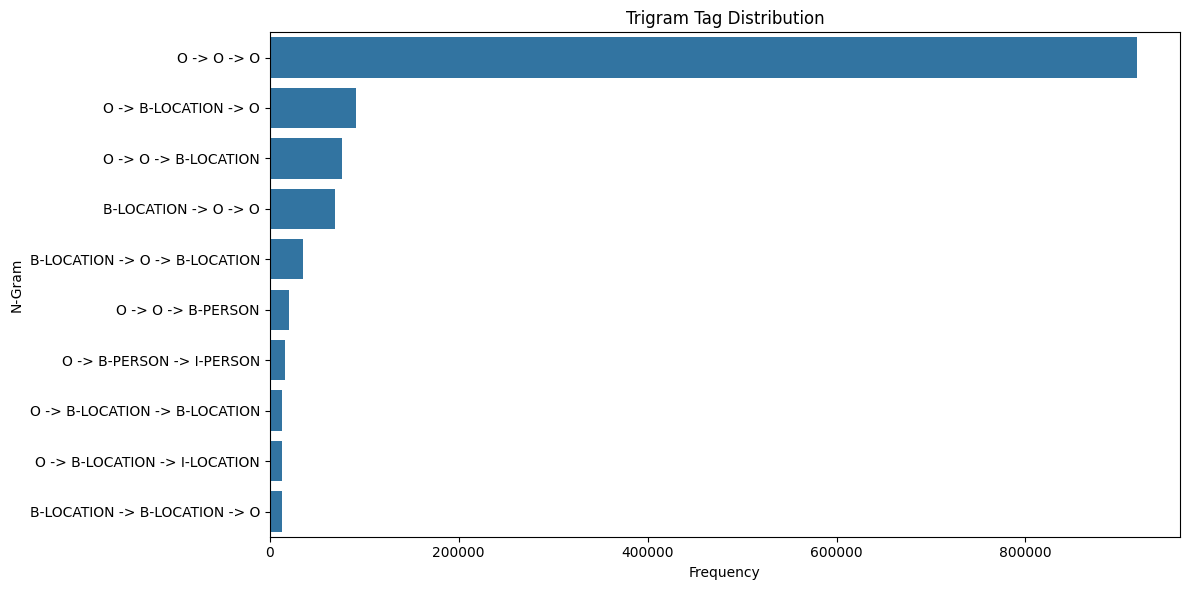

-------------------------


In [ ]:
# Label mapping (index to string)
LABEL_LIST = [
    "B-FESTIVAL", "B-GAME", "B-LANGUAGE", "B-LITERATURE", "B-LOCATION",
    "B-MISC", "B-NUMEX", "B-ORGANIZATION", "B-PERSON", "B-RELIGION", "B-TIMEX",
    "I-FESTIVAL", "I-GAME", "I-LANGUAGE", "I-LITERATURE", "I-LOCATION",
    "I-MISC", "I-NUMEX", "I-ORGANIZATION", "I-PERSON", "I-RELIGION", "I-TIMEX",
    "O"
]


# Summary of the train dataset
print("--- Training Data Summary ---")
print(f"Number of sentences: {len(df_train)}")
total_tokens_train = sum(len(tokens) for tokens in df_train['tokens'])
print(f"Total number of tokens: {total_tokens_train}")
print("-" * 25)

#  Sentence Length Distribution
print("\n--- Sentence Length Distribution (Train) ---")
sentence_counts_train = sentence_word_counts(df_train, 'tokens')
print(f"Average sentence length: {np.mean(sentence_counts_train):.2f}")
print(f"Median sentence length: {np.median(sentence_counts_train)}")
print(f"Max sentence length: {np.max(sentence_counts_train)}")
plot_sentence_length_distribution(sentence_counts_train)
print("-" * 25)

#  Word Length Distribution
print("\n--- Word Length Distribution (Train) ---")
word_lengths_train = word_lengths(df_train, 'tokens')
print(f"Average word length: {np.mean(word_lengths_train):.2f}")
print(f"Median word length: {np.median(word_lengths_train)}")
print(f"Max word length: {np.max(word_lengths_train)}")
plot_word_length_distribution(word_lengths_train)
print("-" * 25)

# Tag Distribution
print("\n--- NER Tag Distribution (Train) ---")
all_tags_train = extract_ner_tags(df_train, 'ner_tags')
plot_ner_tag_distribution(all_tags_train, LABEL_LIST)
print("-" * 25)

# Most/Least Frequent Tags
print("\n--- Most/Least Frequent Tags (Train) ---")
most_common_tag, least_common_tag = tag_popularity(all_tags_train, LABEL_LIST)
print(f"Most common tag: {most_common_tag[0]} (Frequency: {most_common_tag[1]})")
print(f"Least common tag: {least_common_tag[0]} (Frequency: {least_common_tag[1]})")
print("-" * 25)

# Top Words per Tag
print("\n--- Top Words per Tag (Train) ---")
b_person_id = LABEL_LIST.index("B-PERSON")
top_person_words = top_words_for_tag(df_train, 'tokens', 'ner_tags', b_person_id)
plot_top_words_for_tag("B-PERSON", top_person_words)

b_location_id = LABEL_LIST.index("B-LOCATION")
top_location_words = top_words_for_tag(df_train, 'tokens', 'ner_tags', b_location_id)
plot_top_words_for_tag("B-LOCATION", top_location_words)

o_tag_id = LABEL_LIST.index("O")
top_o_words = top_words_for_tag(df_train, 'tokens', 'ner_tags', o_tag_id)
plot_top_words_for_tag("O", top_o_words)

print("-" * 25)


# Tag N-Gram Distributions
print("\n--- Tag N-Gram Distributions (Train) ---")
# Unigram
unigram_counts = tag_ngram_distribution(df_train['ner_tags'], 1)
plot_ngram_distribution(unigram_counts, "Unigram Tag Distribution", LABEL_LIST)

# Bigram
bigram_counts = tag_ngram_distribution(df_train['ner_tags'], 2)
plot_ngram_distribution(bigram_counts, "Bigram Tag Distribution", LABEL_LIST)

# Trigram
trigram_counts = tag_ngram_distribution(df_train['ner_tags'], 3)
plot_ngram_distribution(trigram_counts, "Trigram Tag Distribution", LABEL_LIST)
print("-" * 25)

# HMM Viterbi (Total - 200 marks)

Quick References
1. https://web.stanford.edu/~jurafsky/slp3/17.pdf
2. https://princeton-nlp.github.io/cos484/lectures/L6_sp25.pdf
3. https://www.cs.columbia.edu/~mcollins/fb.pdf


The goal of this task is to build and evaluate a Hindi Named Entity Recognition (NER) system using a Hidden Markov Model (HMM). You will implement the core components of an HMM from scratch, including training the model, decoding the most likely entity tag sequence using the Viterbi algorithm, and evaluating the system's performance. You will also explore the impact of Laplace smoothing on the model's robustness.


## Implementation (100 marks)


---
### **Task 1: Data Pre-processing (5 Marks)**
---

#### **Conceptual Background**

* **Data Format:** Use the **CoNLL files**. Each line contains a word and its NER tag, and blank lines separate sentences. Your first step is to parse this structure.
* **Handling Unknown Words:** To handle words that appear in later datasets but not in the training data (out-of-vocabulary words), we use a special **`<UNK>`** (unknown) token. Any new word is mapped to this token, ensuring the model doesn't fail.
* **Numerical Mappings:** Machine learning models require numerical input. You will create dictionaries to map each unique word and tag to a unique integer ID. Reverse mappings (`id_to_word`, `id_to_tag`) are also needed to interpret the model's output later.

#### **Implementation**

Implement the following three functions to load and prepare the data:

1.  **`load_file(file_path)`**: Parses a  file and returns a list of sentences, where each sentence is a list of `(word, tag)` tuples. (1 marks)
``` python
def load_file(file_path: str):
    """
    Parses a file.
    Returns a list of sentences, where each sentence is a list of (token, tag) or (token, tagid) tuples.
    """
.
.
.
train_data = load_file(TRAIN_FILE_PATH)
```

2.  **`create_mappings(sentences)`**: Takes the raw sentences and returns four dictionaries:
`word_to_id`, `id_to_word`, `tag_to_id`, and `id_to_tag`. (2 marks)
    * **Requirement:** The `<UNK>` token **must** be mapped to index 0 in `word_to_id`.
    * **Requirement:** The unique words must be sorted by their frequency in decreasing order before being assigned IDs. most frequent should be assigned 1, second most frequent should be assigned 2, and so on...

```python
def create_mappings(sentences):
    """
    Creates word-to-id and tag-to-id and vice-versa mappings from the data.
    """
.
.
.
word_to_id, id_to_word, tag_to_id, id_to_tag = create_mappings(train_data)
```
3.  **`prepare_corpus(sentences, word_to_id, tag_to_id)`**: Converts the text corpus into a list of dictionaries. Each dictionary should represent a sentence with keys `'words'`(a list of word IDs) and `'tags'`(a list of tag IDs) holding lists of the corresponding IDs.
`[{'words': word_ids, 'tags': tag_ids}, ...]`. Any word not found in `word_to_id` should be mapped to the ID of `<UNK>`. (2 marks)
```python
def prepare_corpus(sentences, word_to_id, tag_to_id):
    """
    Converts sentences into a list of dictionaries with wordids and tagids
    """
.
.
.
train_corpus = prepare_corpus(train_data, word_to_id, tag_to_id)
```

---



### **Task 2: HMM Training (20 Marks)**
---

With the data prepared, you'll now train the Hidden Markov Model. This involves calculating its three core probability distributions from the training corpus using **Maximum Likelihood Estimation**

A **Hidden Markov Model (HMM)** is a statistical model used to analyze sequences of data. It assumes that the system you are observing has a sequence of **hidden states** that you cannot see, which in turn generate a sequence of **observations** that you *can* see.

Think of it like trying to guess the weather (**hidden state**: Sunny or Rainy) just by observing whether someone carries an umbrella (**observation**: Yes or No). The HMM learns two key things:
1.  The probability of the weather changing (e.g., from Sunny to Rainy).
2.  The probability of seeing someone with an umbrella given the weather (e.g., high for Rainy, low for Sunny).


In NER, the goal is to label each word in a sentence with a tag like `PERSON`, `LOCATION`, or `O`. HMM is a natural fit for this task.

* **Observations**: The words in the sentence (e.g., "Ram", "went", "to", "Delhi").
* **Hidden States**: The sequence of NER tags you want to predict (e.g., `B-PER`, `O`, `O`, `B-LOC`).


The HMM is trained on a labeled corpus to learn pi, A, and O which will be defined shortly.

Once trained, the HMM uses the **Viterbi algorithm** to find the most probable sequence of hidden states (NER tags) for a new, unseen sentence (the observations).

![hmm](https://i.postimg.cc/6Q69gC0d/Screenshot-2025-09-15-at-12-02-41-AM.png)
(source: https://princeton-nlp.github.io/cos484/lectures/L6_sp25.pdf)
(think of POS tags as NER tags)

![components hmm](https://i.postimg.cc/85BmcQW8/Screenshot-2025-09-15-at-12-07-53-AM.png)
(source: https://princeton-nlp.github.io/cos484/lectures/L6_sp25.pdf)
(use A instead of S)

![assumption](https://i.postimg.cc/kgb8DP3j/Screenshot-2025-09-15-at-12-11-01-AM.png)
(source: https://princeton-nlp.github.io/cos484/lectures/L6_sp25.pdf)

(Take a look at the above references to get the clear picture on HMM and viterbi algorithm)

#### **Conceptual & Mathematical Details**

An HMM is defined by the following three probability distributions (pi, A, O):

**1. Initial Probability Vector ($\pi$)**:
This vector stores the probability of a sentence starting with a particular NER tag. The $i$-th element of $\pi$, denoted $\pi_i$, is the probability that the first word of a sentence is assigned `tag_i`.

$$\pi_i = P(\text{tag}_i \text{ at start}) = \frac{\text{Count}(\text{sentences starting with tag}_i)}{\text{Total number of sentences}}$$

**2. Transition Probability Matrix ($A$)**:
This matrix captures the relationship between consecutive NER tags. An element $A_{ij}$ stores the probability of transitioning from `tag_i` to `tag_j`. This is crucial for learning patterns like `B-PER` is often followed by `I-PER`.

$$A_{ij} = P(\text{tag}_j | \text{tag}_i) = \frac{\text{Count}(\text{tag}_i \text{ is followed by tag}_j)}{\text{Count}(\text{tag}_i)}$$

**3. Emission Probability Matrix ($O$)**:
This matrix stores the probability of a given NER tag "emitting" a specific word. An element $O_{jk}$ stores the probability that `tag_j` is associated with `word_k`. For example, the word "दिल्ली" will have a high probability of being emitted by the `B-LOC` tag.

$$O_{jk} = P(\text{word}_k | \text{tag}_j) = \frac{\text{Count}(\text{word}_k \text{ appears with tag}_j)}{\text{Count}(\text{tag}_j)}$$


#### **Implementation**

Implement the function `train_hmm(train_corpus, num_tags, num_words)`.

This function will take the training corpus and calculate the initial pi, transition A, and emission O probabilities.
```python
def train_hmm(train_corpus, num_tags, num_words):
    """
    Trains a Hidden Markov Model by computing the initial state vector pi,
    transition probability matrix A , and emission probability matrix O
    from a training corpus.

    Returns (initial_prob pi, transition_prob A, emission_prob O).
    """
.
.
.
initial_prob, transition_prob, emission_prob = train_hmm(
    train_corpus,
    num_tags,
    num_words
)
```

**Process:**
1.  Initialize three numpy arrays for the **counts**: `initial_counts` (vector), `transition_counts` (matrix), and `emission_counts` (matrix). (3 marks)
2.  Iterate through each sentence in the `train_corpus` to populate these count arrays:
    * **Initial ($\pi$):** For each sentence, increment the count for its starting tag. (5 marks)
    * **Transition ($A$):** For each adjacent pair of tags `(tag_i, tag_j)`, increment the count for that transition. (5 marks)
    * **Emission ($O$):** For each `(word_id, tag_id)` pair, increment the count for that specific emission. (5 marks)
3.  After counting is complete, **normalize** the arrays to convert them into probability distributions. For example, to get the final `transition_prob` matrix, you'll divide each row in `transition_counts` by its sum. (2 marks)
4.  NOTE: Handle any potential division-by-zero errors!
**Return Value:**
* The function must return a **tuple** containing `(initial_prob, transition_prob, emission_prob)`.


---

### **Task 3: HMM Training (with Laplace Smoothing) (10 Marks)**
---

A model trained on simple counts suffers from the **zero-probability problem**: it assumes events not seen in training are impossible. For example, if it only saw "Sachin" tagged as a Person (`B-PER`), it would assign a zero probability to "Rahul" also being a Person, causing it to fail on new data.

**Laplace smoothing** (or add-1 smoothing) fixes this.

* **The Idea**: We pretend to have seen every possible outcome one extra time by **adding one** to all our counts before calculating probabilities.

* **Why it Helps**: This ensures no probability is ever exactly zero. The probability of an unseen event like `"Rahul" | B-PER` becomes very small instead of impossible, making the model more **robust** and allowing it to **generalize** to new data.


#### **The Algorithmic Difference**
This idea is implemented by adding 1 to our raw counts in the numerator and adding the number of possible outcomes to the denominator. Here's how it formally changes our calculations:

* **Initial Probability ($\pi$) with Smoothing:**
    $$
    \pi_i = \frac{\text{Count(sentences starting with tag\_i)} + 1}{\text{Total number of sentences} + N_{\text{tags}}}
    $$
    (Where $N_{\text{tags}}$ is the total number of unique tags).

* **Transition Probability ($A$) with Smoothing:**
    $$
    A_{ij} = P(\text{tag\_j} \mid \text{tag\_i}) = \frac{\text{Count(tag\_i} \rightarrow \text{tag\_j}) + 1}{\text{Count(tag\_i)} + N_{\text{tags}}}
    $$
    (Where $N_{\text{tags}}$ is the total number of unique tags).

* **Emission Probability ($O$) with Smoothing:**
    $$
    O_{jk} = P(\text{word\_k} \mid \text{tag\_j}) = \frac{\text{Count}(\text{word\_k}, \text{tag\_j}) + 1}{\text{Count}(\text{tag\_j}) + V}
    $$
    (Where $V$ is the total number of unique words in the vocabulary).


### **Implementation**

Implement the function `train_hmm_laplace(train_corpus, num_tags, num_words)`.
```python
def train_hmm_laplace(train_corpus, num_tags, num_words):
    """
    Trains a Hidden Markov Model by computing the initial state vector pi,
    transition probability matrix A , and emission probability matrix O
    from a training corpus.

    Laplace smoothing is used. (prevents zero-probability issues)

    Returns (initial_prob pi, transition_prob A, emission_prob O).
    """
.
.
.
initial_prob, transition_prob, emission_prob = train_hmm_laplace(
    train_corpus,
    num_tags,
    num_words
)
```

This function will have the same basic structure as `train_hmm()`, but with a crucial modification.


**Process:**
1.  First, perform the same counting process as in Task 2 to get the raw `initial_counts`, `transition_counts`, and `emission_counts`.
2.  **Apply Smoothing:** After the counting is complete, **add 1 to every element** in all three of your count arrays (`initial_counts`, `transition_counts`, and `emission_counts`). (5 marks)
3.  **Normalize:** Normalize the smoothed counts to get the final probability distributions. (5 marks)

**Return Value:**
* The function must return a **tuple** containing `(initial_prob, transition_prob, emission_prob)`.

**Note:** Since you will now have two sets of HMM parameters ($\pi, A, O$)—one without smoothing and one with—you will later use both to run Viterbi decoding and evaluate their performance. Pay close attention to how smoothing affects the results on the validation/test sets. (this will help you answer the analysis question 1)



**A trained HMM is not a black box. The probability matrices it learns are directly interpretable. Inspect the transition ($A$) and emission ($O$) probability matrices and answer the analysis question 4.**


---


### **Task 4: Viterbi Decoding (15 Marks)**
---

Now that you have your trained HMM parameters (pi, A, O), the final step is to use them to predict the most likely tag sequence for a new sentence. This process is known as **decoding**.


#### **Decoding Approaches**

**1. Brute-Force Decoding**
The most obvious approach is to generate every possible tag sequence for the sentence, calculate the probability of each one, and pick the sequence with the highest score.

* **Problem**: For a sentence with **T** words and **N** possible tags, there are **N<sup>T</sup>** possible sequences.
* **Time Complexity**: This method has an **exponential** time complexity of **O(N<sup>T</sup>)**, which is computationally infeasible.

**2. Viterbi Decoding**
To decode efficiently, we use the **Viterbi algorithm**. It is a **dynamic programming** approach that cleverly finds the single best path without having to check every possibility.

* **Time Complexity**: Viterbi has a **polynomial** time complexity of **O(T \* N<sup>2</sup>)**, making it dramatically faster and the standard method for HMM decoding.


#### **The Viterbi Algorithm in Detail**

The algorithm works by moving through the sentence one word at a time, building two matrices to keep track of the best path found so far.

![viterbi](https://i.postimg.cc/Dyq4KdqD/Screenshot-2025-09-15-at-12-15-52-AM.png)
(source: https://princeton-nlp.github.io/cos484/lectures/L6_sp25.pdf)
(for the derivation and further intuition, please check the above references.)

**The `M` and `B` Matrices**

* **Probability Matrix (`M`)**: `M[i, j]` stores the probability of the **most probable sequence of tags ending with tag `j` at the `i`-th token**. It essentially keeps track of the "score" of the best path to each tag at each position.
* **Backpointer Matrix (`B`)**: `B[i, j]` is the **tag of the `(i-1)`-th token in the most probable sequence ending with tag `j` at the `i`-th token**. It acts like a trail of breadcrumbs, remembering the path taken to reach each state, which is crucial for reconstruction.

**The Process**

The algorithm proceeds in three main steps:

![algo](https://i.postimg.cc/VkCLm5mH/Screenshot-2025-09-16-at-4-54-46-PM.png)
(source: https://web.stanford.edu/~jurafsky/slp3/A.pdf)

**1. Initialization**
For the first word (at index `i=0`), we calculate the initial probability for each possible tag `j`. This is the product of the start probability and the emission probability of the first word given that tag.
<!-- $$
M[0, j] = \pi_j \times \text{emission_prob}[j, \text{word}_0]
$$ -->
$$
M[0, j] = \pi_j \times \text{O}[j, \text{word}_0]
$$

**2. Recursion**
For each subsequent word `i` and each possible tag `j`, we find the path from the previous step that has the highest probability of leading to it. We consider all possible previous tags `k`. We store the maximum probability in `M` and the "winning" previous tag's index in `B`.
<!-- $$
M[i, j] = \max_{k} (M[i-1, k] \times \text{transition_prob}[k, j]) \times \text{emission_prob}[j, \text{word}_i]
$$ -->
$$
M[i, j] = \max_{k} (M[i-1, k] \times \text{A}[k, j]) \times \text{O}[j, \text{word}_i]
$$

<!-- $$
B[i, j] = \arg\max_{k} (M[i-1, k] \times \text{transition_prob}[k, j]) \times \text{emission_prob}[j, \text{word}_i]
$$ -->

$$
B[i, j] = \arg\max_{k} (M[i-1, k] \times \text{A}[k, j]) \times \text{O}[j, \text{word}_i]
$$

**3. Backtracking**
After filling the matrices, the algorithm finishes by:
* Finding the highest probability in the **last column** of the `M` matrix to identify the final tag of the best sequence.
* Using the **`B` matrix** to trace the path backward from this final tag to the beginning, revealing the complete optimal sequence.


#### **Implementation**

Implement the function:
```python
def viterbi_decode(sentence_word_ids, initial_prob, transition_prob, emission_prob, num_tags):
    """
    Decodes the most likely sequence of tags for a sentence using the Viterbi algorithm.

    Args:
        sentence_word_ids (list): A list of word IDs representing the sentence.
        initial_prob (np.array): The initial state probability vector (pi).
        transition_prob (np.array): The transition probability matrix (A).
        emission_prob (np.array): The emission probability matrix (O).
        num_tags (int): The total number of unique tags.

    Returns:
        list: The sequence of predicted tag IDs.
    """
.
.
.
(you will call this from evaluate_model() function)
predicted_tags = viterbi_decode(word_ids, initial_prob, transition_prob, emission_prob, num_tags)
```
* State matrix M (size sentence_length x num_tags) and the backpointer matrix B (same size as M).
* **Process**: Implement the three phases—Initialization (5 marks), Recursion (5 marks), and Backtracking(5 marks)—as described by the formulas above.
* **Return**: A list of the predicted tag IDs for the input sentence.



<!-- ### Task 5: Model Evaluation (5 Marks)

Implement evaluate_model():

(2 Marks) Generate predicted tags for the entire corpus.

(2 Marks) Report accuracy and classification report. (can use scikit learn)

(1 Mark) Plot a labelled confusion matrix (matplotlib seaborn).

Finally call that function with train_corpus, validation_corpus, and test_corpus. (and see the difference in accuracies with and without laplace smoothed hmm model) -->


---

### **Task 5: Model Evaluation (25 Marks)**

---

After building and training your model, it's crucial to measure its performance quantitatively. This task requires you to implement a detailed evaluation pipeline from scratch, calculating standard classification metrics to understand your model's strengths and weaknesses without relying on external libraries like `scikit-learn` for the core calculations.

---

#### **Conceptual & Mathematical Background**

To evaluate a classification model, we use metrics derived from a **Confusion Matrix**. This table summarizes performance by breaking down predictions for each class into four categories:

* **True Positives (TP):** predicted +, actual +
* **False Positives (FP):** predicted +, actual -
* **False Negatives (FN):** predicted -, actual +
* **True Negatives (TN):** predicted -, actual -

These components are used to calculate the key performance metrics shown in the image below.

![cm](https://i.postimg.cc/y6ZfhH6C/Screenshot-2025-09-16-at-4-53-12-PM.png)

(source: https://wandb.ai/mostafaibrahim17/ml-articles/reports/Precision-vs-Recall-Understanding-How-to-Classify-with-Clarity--Vmlldzo1MTk1MDY5)


(you will compute per class precision, recall, f1 score, fpr, and support!)

Instead of having multiple per-class F1 scores, it would be better to average them to obtain a single number to describe overall performance. Three different average F1 scores are as follows:

* **Macro Average**: The macro-averaged F1 score (or macro F1 score) is computed using the arithmetic mean (aka unweighted mean) of all the per-class F1 scores.

* **Micro Average**: Micro averaging computes a global average F1 score by counting the sums of the True Positives (TP), False Negatives (FN), and False Positives (FP). In multi-class classification cases where each observation has a single label, the micro-F1 and accuracy share the same value. (why? take a look at the below reference)


* **Weighted Average**: The weighted-averaged F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s support. (Support refers to the number of actual occurrences of the class in the dataset.)

(Reference: https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f/)

---


#### **Implementation**

You will now implement your own evaluation functions from scratch to compute the metrics described above.

1.  **`get_confusion_matrix(...)` (5 Marks)**
    * This function should take lists of true tag IDs (`y_true`), predicted tag IDs (`y_pred`), and a list of all unique label IDs (`labels`).
    * It must return a `numpy` array representing the confusion matrix.

2.  **`get_classification_report(...)` (15 Marks)**
    * This function is the core of your evaluation pipeline.
    * **Steps:**
        1.  Use your `get_confusion_matrix` function to compute the confusion matrix.
        2.  From the matrix, calculate the TP, FP, TN and FN. (4 marks)
        3.  Calculate the per-class **precision**, **recall**, and **F1-score** and **support**. (4 marks)
        4.  Calculate the overall **accuracy**. (1 mark)
        5.  Calculate the **macro**, **micro**, and **weighted averages** for the F1-score. (3 marks)
        6.  Format all these results into a single, well-structured report string that is easy to read, similar to the output of `scikit-learn`'s `classification_report`.(formatting should look somewhat similar to that, micro avg also should be there alongside acc, macro and weighted avg in the bottom!) (3 marks)
    * This function should return the formatted report string and the raw confusion matrix.


      ![report](https://i.postimg.cc/fbVhFKp8/image.png)

      (State of the art result in HiNER task!, just for your reference)
      

3.  **`evaluate_model(corpus, ...)` (5 Marks)**
    * This function orchestrates the entire evaluation process. (evaluation should be done on entire corpus eg `test_corpus`)
    * Iterate through the given `corpus` (e.g., `test_corpus`), and for each sentence, use your `viterbi_decode` function to generate predictions.
    * Collect all the true tags and predicted tags into two flat lists, `y_true` and `y_pred`.
    * Call your `get_classification_report` function to get the formatted report and the confusion matrix.
    * Print the report and the confusion matrix.
    * **Additionally**: Use `matplotlib` and `seaborn` to plot a visually appealing, annotated confusion matrix to better visualize which tags are being confused with others.

    Call your `evaluate_model` function on the **train, validation, and test sets** for both of your HMMs:
    1. The model trained **without** smoothing (from **Task 2**).
    2. The model trained **with** Laplace smoothing (from **Task 3**).

---


### **Task 6: ROC AUC Curve Evaluation (20 Marks)**

While metrics like F1-score evaluate the quality of the single best tag sequence predicted by the Viterbi algorithm, they don't tell the whole story. They are based on "hard" decisions (this word *is* `B-PER`, this one *is not*). A **Receiver Operating Characteristic (ROC)** curve provides a more nuanced evaluation by showing how well the model can distinguish between classes across all possible decision thresholds.

---

#### **Conceptual Background**

* **What is an ROC Curve?** An ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.
    * **TPR (Recall):** $TPR = \frac{TP}{TP + FN}$. It answers: "Of all the actual positive samples, how many did we correctly identify?"
    * **FPR:** $FPR = \frac{FP}{FP + TN}$. It answers: "Of all the actual negative samples, how many did we incorrectly identify as positive?"
    * A model that is good at discriminating will have a curve that bows towards the top-left corner, indicating a high TPR for a low FPR. A random model follows the diagonal line (y=x).

* **Area Under the Curve (AUC):** The AUC is the area under the ROC curve. It provides a single number to summarize the model's performance.
    * **AUC = 1.0:** Perfect classifier.
    * **AUC = 0.5:** Random classifier (no discriminative ability).
    * **AUC < 0.5:** Worse than random.



#### **Why is the Forward-Backward Algorithm Needed?**

To plot an ROC curve, we need a continuous **score** or probability for each class, not just a single, final prediction.
* The **Viterbi algorithm** (Task 4) is a "hard-decision" algorithm. It finds the single most likely sequence of tags. It doesn't tell you the probability of a specific tag at a specific position, considering the *entire* sentence.


* The **Forward–Backward algorithm**, in contrast, can compute the **posterior probability**, which is exactly what we need. It calculates the probability of a tag at a specific time step \(t\), given the *entire* observation sequence. This probability, denoted as \(\gamma_t(j)\), is calculated as:

$$
\gamma_t(j)
= P\bigl(\text{tag}_t = j \mid \text{all words in sentence}\bigr)
= \frac{\alpha_t(j)\,\beta_t(j)}{\sum_{i=1}^{N} \alpha_T(i)}
$$

Where \(\alpha_t(j)\) is the forward probability, \(\beta_t(j)\) is the backward probability,  
and the denominator is the total probability of the observed sequence.  

This posterior probability serves as the perfect score to generate the ROC curve. By varying the threshold against this score (e.g., “predict `B-PER` if its posterior probability is > 0.6”), we can compute the TPR and FPR to trace the curve.

![fbalgo](https://i.postimg.cc/wB9xyJN7/Screenshot-2025-09-17-at-11-51-23-AM.png)

(source: https://www.cs.columbia.edu/~mcollins/fb.pdf)




---

#### **Implementation Steps**

You will implement a pipeline to compute and plot the One-vs-Rest ROC curves for your HMM.

**1. Implement the Forward-Backward Algorithm (10 Marks)**
   * Implement a function `_forward_pass(...)` that computes the alpha ($\alpha$) probabilities. (4 marks)
   * Implement a function `_backward_pass(...)` that computes the beta ($\beta$) probabilities. (4 marks)
   * Create a wrapper function `get_posterior_scores(...)` that calls the forward and backward passes and uses their results to compute the final posterior probabilities ($\gamma$) for each word in a sentence, as per the formula above. This function will return a matrix of size `(sentence_length, num_tags)`, where each entry `[t, j]` is the probability of tag `j` at position `t`. (2 marks)

**2. Aggregate Scores and True Labels (2 Marks)**
   * Create a main evaluation function, e.g., `evaluate_and_plot_roc(...)`.
   * Inside this function, iterate through your entire corpus. For each sentence:
     * Call `get_posterior_scores(...)` to get the probability scores for each tag at each word position.
     * Collect the true tag IDs and the calculated score matrices.
   * After iterating through all sentences, you should have two main data structures:
     * `y_true`: A flat list of all true tag IDs from the corpus.
     * `y_scores`: A single large NumPy array (concatenated from all sentences) of shape `(total_words, num_tags)`.
   * call `plot_one_vs_rest_roc(y_true, y_scores, id_to_tag_map)`

**3. Compute and Plot One-vs-Rest ROC Curves (5 Marks)** (take help from sklearn implementation https://github.com/scikit-learn/scikit-learn/blob/a9c852d97e4b47ebf9c4a7a8aa82a601f3763143/sklearn/metrics/_ranking.py#L1085, but dont use sklearn functions directly, implement it yourself)
create a function.
```python
def plot_one_vs_rest_roc(y_true, y_scores, id_to_tag_map):
    """
    Computes and plots One-vs-Rest ROC curves for each class.
    """
```
   * Since ROC is for binary classification, you will use the **One-vs-Rest (OvR)** strategy. For each tag (e.g., `B-PER`), you will compute an ROC curve where `B-PER` is the positive class and all other tags are the negative class.
   * Binarize the true labels `y_true_binary` for One-vs-Rest comparison. (where the current tag is `1` and all others are `0`. (can use label_binarize function directly from sklearn here).   (1 marks)
   * Loop through each tag from `0` to `num_tags - 1`:
     
     3.  **Calculate ROC**: Using `y_true_binary` and `y_scores_for_class`, compute the `fpr` and `tpr` values at different thresholds. implement from scratch (take help from sklearn implementation if needed: https://github.com/scikit-learn/scikit-learn/blob/a9c852d97e4b47ebf9c4a7a8aa82a601f3763143/sklearn/metrics/_ranking.py#L1085)
     (NOTE: use the standard sklearn function to check if your answer matches or not)

     ```python

      for i in range(num_tags):
          # fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
          fpr[i], tpr[i], _ = roc_curve_from_scratch(y_true_binarized[:, i], y_scores[:, i])

          # roc_auc[i] = auc(fpr[i], tpr[i])
          roc_auc[i] = auc_from_scratch(fpr[i], tpr[i])
     ```
     (for writing the roc_curve_from_scratch function: 3 marks)

     4.  **Calculate AUC**: Compute the area under the calculated ROC curve (e.g., using the trapezoidal rule). (for writing auc from scratch function: 1 marks)

   * **Plotting** (2 marks):
     * Initialize a single `matplotlib` plot.
     * In your loop, plot the `fpr` vs. `tpr` for each tag on this same plot.
     * Label each curve clearly in a legend, including its calculated AUC score (e.g., `"B-PER (AUC = 0.95)"`).
     * Add a dashed diagonal line from (0,0) to (1,1) to represent a random classifier.
     * Add appropriate titles and axis labels.
     * Display the final plot.
     * Print Per-tag AUC Scores as well {tag1: auc_score1, tag2: auc_score2, ...}
     ```python
      print('Per tag AUC scores:')
      per_tag_aucs = {id_to_tag_map[i]: roc_auc[i] for i in range(num_tags)}
      print(per_tag_aucs)
     ```


   Finally, call your main evaluation function on the **validation/test set** using the HMM parameters trained **with Laplace smoothing** (from Task 3). (1 mark)


---

### **Task 7: Evaluating Performance Without the 'O' Tag (5 Marks)**
---
To see the impact of 'O' tag removal on model performance, we will perform a more focused evaluation using the `scikit-learn` library. The results from this task are required to answer **Analysis Question 3**.

Your goal is to implement the function
```python
def evaluate_model_sklearn(corpus, exclude_o_tag=True, ...):
    """
    use sklearn functions
    accuracy_score
    classification_report
    confusion_matrix

    and dont forget to pass the labels to those functions whenever necessary!
    """

```
Hints:

* The function should accept a corpus and a boolean parameter `exclude_o_tag`, other depends on whether the hmm variables(pi, A,O) and other required variables are global or not.
* It should first generate the complete `y_true_all` and `y_pred_all` lists for the given corpus. (same as y_true and y_pred in above task)
* Based on the `exclude_o_tag` parameter, it should either:
    * **If `True`:** Filter out the 'O' tag from both true and predicted lists and call it `y_true` and `y_pred` and create a corresponding filtered list of labels `labels_to_include` for the report (exclude O).
    * **If `False`:** Use the original, unfiltered lists.
* Use the appropriate lists (`y_true`, `y_pred`, `labels_to_include`, etc.) to call the following `sklearn.metrics` functions:
    * `accuracy_score`
    * `classification_report`
    * `confusion_matrix` (use this to generate and display a labeled heatmap with `seaborn`).

---
## Analysis Questions (100 marks)
---

1. **Impact of Laplace Smoothing (10 Marks):**

    Evaluate the performance of both HMMs (with and without Laplace smoothing task2 and task3 params) across the **train, validation, and test** datasets. Briefly discuss the results. In your discussion, state which model achieved better results on the **validation /test sets** and briefly explain the likely reason for the performance difference between the two models.


Answer :

Here is the performance comparison based on the Macro F1-score:

| Model | Dataset | Accuracy | Macro F1 |
| :--- | :--- | :--- | :--- |
| No Smoothing | Train | 0.97 | 0.79 |
| No Smoothing | **Val** | **0.94** | **0.58** |
| No Smoothing | **Test** | **0.94** | **0.59** |
| With Smoothing | Train | 0.95 | 0.59 |
| With Smoothing | **Val** | **0.94** | **0.55** |
| With Smoothing | **Test** | **0.94** | **0.54** |

The model **without Laplace smoothing** achieved better results on the validation and test sets (Test F1 of 0.59) compared to the smoothed model (Test F1 of 0.54).

The likely reason is that the "No Smoothing" model, despite clear overfitting on the train set (0.79 F1 vs 0.59 F1), learned parameters that generalized better to the test set. The smoothing may have "over-flattened" the probabilities, hurting the model's confidence in strong, valid patterns from the training data more than it helped by handling unseen word-tag pairs.


2. **Error Analysis; Interpreting F1-Scores (15 Marks):**

    Using your HMM with Laplace smoothing (task 3 parameters), compare the **macro F1** and **weighted F1** scores from the classification reports on the **train, validation, and test sets**. In your own words, explain precisely why a significant gap often exists between these two metrics. To support your analysis, use the **validation set report** to identify two high-support classes that boost the weighted average, and list their corresponding F1-scores and support values.


Answer:

Using the HMM with Laplace smoothing, the scores on the test set (with the 'O' tag) are:
* **Macro F1:** 0.44
* **Weighted F1:** 0.94

A significant gap exists between these two metrics due to the **extreme class imbalance** of the NER dataset.

1.  **Weighted F1 (0.94)** is high because it's an average weighted by *support* (instance count). The 'O' (Outside) tag has massive support and is easy to predict. This one class dominates the average, inflating the score to 0.94, which is misleading.
2.  **Macro F1 (0.44)** is low because it's an *unweighted* average. It treats the F1-score of the rare 'B-PER' tag with the same importance as the 'O' tag. This low score reveals the truth: the model struggles to identify the actual, rare entities, which is the real goal.

To support this analysis, the **validation set report** shows that the 'O' tag itself is the primary class boosting the weighted average (F1: 0.94, Support: 179432). The two other high-support classes that also boost the weighted average are:

* **'B-LOCATION'**: F1-Score: 0.91, Support: 20062
* **'B-PERSON'**: F1-Score: 0.75, Support: 3765

3.  **Impact of the 'O' Tag on Performance Metrics (45 Marks):**

    Using the two classification reports (with and without the 'O' tag) that you generated for the **train/validation/test set** in **Task 7**, answer the following questions.

    * **a. The Accuracy Illusion:** Compare the **overall accuracy** from both reports. Explain in detail why the accuracy is significantly higher when the 'O' tag is included. What does this reveal about the limitation of using accuracy as the primary evaluation metric for an imbalanced problem like NER? (15 marks)

    **Answer:**

The accuracy (0.94 on the test set) is high *with* the 'O' tag because this tag makes up the vast majority of the data (over 81% of my test set). A lazy model that only predicts 'O' would still get >81% accuracy. This metric is an illusion because it reflects the model's ability to predict non-entities, not its ability to find the rare, important named entities.


    * **b. F1-Score Analysis:** Now, compare the **macro F1-score** and the **weighted F1-score** from both reports. Which of these two scores changes more dramatically when the 'O' tag is removed? Explain precisely why, referencing the concept of class **support** (the number of instances of each tag). (15 marks)

   **Answer:**

Comparing the test set reports (with vs. without 'O'):

| Metric | With 'O' Tag | Without 'O' Tag | Change |
| :--- | :--- | :--- | :--- |
| Macro F1 | 0.44 | 0.44 | 0.00 |
| **Weighted F1** | **0.94** | **0.82** | **-0.12** |

The **Weighted F1-score** changes dramatically. This is because in the first report, the score is inflated by the massive *support* of the high-scoring 'O' tag. When 'O' is removed, the Weighted F1 is recalculated *only* on the actual entity tags, giving a more realistic score (0.82).

    * **c. Conclusion:** Which of the two reports (the one with the 'O' tag or the one without) provides a more honest and meaningful assessment of your model's ability to identify actual named entities? Justify your answer. (15 marks)

     **Answer:**

The report **without the 'O' tag** (`exclude_o_tag=True`) provides a more honest and meaningful assessment. The goal of NER is to find *entities*, not non-entities. This report evaluates the model on that specific, difficult task, whereas the report *with* 'O' mostly just confirms that the model can identify the easy, common 'O' tag.

4.  **Inspecting the Learned HMM Parameters (30 Marks):**

    A trained HMM is not a black box. The probability matrices it learns are directly interpretable. Using your HMM model trained with Laplace smoothing, inspect the transition ($A$) and emission ($O$) probability matrices to answer the following.

    * **a. Transition Matrix Analysis (15 marks):**
        The transition matrix $A$ encodes the likely order of tags. Find and list the three tag-to-tag transitions with the **highest probabilities**. For each one, explain why it makes linguistic sense in the context of Hindi Named Entity Recognition (e.g., "Why is `B-PER` -> `I-PER` a very common transition?").

      **Answer**

The three highest-probability transitions from my smoothed HMM are:

1.  **`I-LANGUAGE -> O: 0.9825`**: This makes linguistic sense, as names of languages are almost always single words. After an 'I-LANGUAGE' tag, the entity is finished.
2.  **`B-RELIGION -> O: 0.8730`**: Similar to above, this suggests 'RELIGION' entities in the data are also overwhelmingly single-word tokens.
3.  **`O -> O: 0.8673`**: This is the most common and logical transition. It shows that non-entity words (verbs, prepositions, etc.) are very likely to be followed by other non-entity words.

    * **b. Emission Matrix Analysis (15 marks):**
        The emission matrix $O$ links tags to words. First, choose a common named entity word from your vocabulary (e.g., "भारत" or "सरकार"). Find the top two tags most likely to emit this word and report their probabilities. Second, choose an important tag like `B-ORG` (Beginning of Organization). Find and list the top three words that this tag is most likely to emit.

      **Answer:**

* **Word-to-Tag for "भारत" (India):**
    1.  `B-LOCATION`: 0.0747
    2.  `B-ORGANIZATION`: 0.0021
    * *Interpretation:* The model correctly learned that "भारत" is primarily a **Location**.

* **Tag-to-Word for `B-ORG` (Beginning of Organization):**
    1.  "कांग्रेस" (Congress): 0.0106
    2.  "बीबीसी" (BBC): 0.0089
    3.  "भारतीय" (Indian): 0.0072
    * *Interpretation:* The model correctly identified specific organization names ("Congress", "BBC") and "भारतीय", a common prefix for organizations (e.g., "भारतीय स्टेट बैंक").


In [ ]:
import numpy as np
from collections import defaultdict, Counter
import os

# Define the path to the CoNLL train file
# Assuming the conll_output folder was created in a previous step
TRAIN_FILE_PATH = os.path.join("conll_output", "train.conll")
VAL_FILE_PATH = os.path.join("conll_output", "val.conll")
TEST_FILE_PATH = os.path.join("conll_output", "test.conll")


def load_file(file_path: str):
    """
    Parses a CoNLL file.
    Returns a list of sentences, where each sentence is a list of (token, tag) tuples.
    """
    sentences = []
    current_sentence = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                # Assuming format is "token tag"
                parts = line.split()
                if len(parts) == 2:
                    current_sentence.append((parts[0], parts[1]))
            else:
                # Blank line indicates end of sentence
                if current_sentence:
                    sentences.append(current_sentence)
                    current_sentence = []
    # Add the last sentence if the file doesn't end with a blank line
    if current_sentence:
        sentences.append(current_sentence)
    return sentences

# Load the training data
train_data = load_file(TRAIN_FILE_PATH)
val_data = load_file(VAL_FILE_PATH)
test_data = load_file(TEST_FILE_PATH)

print(f"Loaded {len(train_data)} sentences from {TRAIN_FILE_PATH}")
print(f"Loaded {len(val_data)} sentences from {VAL_FILE_PATH}")
print(f"Loaded {len(test_data)} sentences from {TEST_FILE_PATH}")

Loaded 75827 sentences from conll_output/train.conll
Loaded 10851 sentences from conll_output/val.conll
Loaded 21657 sentences from conll_output/test.conll


In [ ]:
def create_mappings(sentences):
    """
    Creates word-to-id and tag-to-id and vice-versa mappings from the data.
    """
    word_counts = Counter(word for sentence in sentences for word, tag in sentence)
    tag_counts = Counter(tag for sentence in sentences for word, tag in sentence)

    # Sort words by frequency in decreasing order, excluding <UNK>
    sorted_words = sorted(word_counts.keys(), key=lambda x: word_counts[x], reverse=True)

    # Create word_to_id mapping: <UNK> is 0, then sorted words starting from 1
    word_to_id = {"<UNK>": 0}
    id_to_word = {0: "<UNK>"}
    for i, word in enumerate(sorted_words):
        word_to_id[word] = i + 1
        id_to_word[i + 1] = word

    # Create tag_to_id mapping
    tag_to_id = {tag: i for i, tag in enumerate(sorted(tag_counts.keys()))}
    id_to_tag = {i: tag for tag, i in tag_to_id.items()}

    return word_to_id, id_to_word, tag_to_id, id_to_tag

# Create mappings from the training data
word_to_id, id_to_word, tag_to_id, id_to_tag = create_mappings(train_data)

print("Mappings created.")
print(f"Vocabulary size (including <UNK>): {len(word_to_id)}")
print(f"Number of unique tags: {len(tag_to_id)}")

Mappings created.
Vocabulary size (including <UNK>): 76546
Number of unique tags: 23


In [ ]:
def prepare_corpus(sentences, word_to_id, tag_to_id):
    """
    Converts sentences into a list of dictionaries with wordids and tagids
    """
    corpus = []
    unk_id = word_to_id["<UNK>"]
    for sentence in sentences:
        word_ids = [word_to_id.get(word, unk_id) for word, tag in sentence]
        tag_ids = [tag_to_id[tag] for word, tag in sentence]
        corpus.append({'words': word_ids, 'tags': tag_ids})
    return corpus

# Prepare the training, validation, and test corpora
train_corpus = prepare_corpus(train_data, word_to_id, tag_to_id)
val_corpus = prepare_corpus(val_data, word_to_id, tag_to_id)
test_corpus = prepare_corpus(test_data, word_to_id, tag_to_id)

print(f"Prepared {len(train_corpus)} sentences for training.")
print(f"Prepared {len(val_corpus)} sentences for validation.")
print(f"Prepared {len(test_corpus)} sentences for testing.")

# print an example prepared sentence
if train_corpus:
    print("\nExample prepared sentence (train):")
    print(train_corpus[0])

Prepared 75827 sentences for training.
Prepared 10851 sentences for validation.
Prepared 21657 sentences for testing.

Example prepared sentence (train):
{'words': [27, 490, 5, 94, 1514, 16, 451, 42, 31, 12, 35, 31, 15, 27, 490, 5, 5100, 712, 2012, 7, 15, 138, 555, 113, 23, 458, 13, 28629, 68, 163, 7, 3], 'tags': [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]}


In [ ]:
def train_hmm(train_corpus, num_tags, num_words):
    """
    Trains a Hidden Markov Model by computing the initial state vector pi,
    transition probability matrix A , and emission probability matrix O
    from a training corpus.

    Returns (initial_prob pi, transition_prob A, emission_prob O).
    """
    # Initialize count matrices
    initial_counts = np.zeros(num_tags)
    transition_counts = np.zeros((num_tags, num_tags))
    emission_counts = np.zeros((num_tags, num_words))
    tag_counts = np.zeros(num_tags) # To normalize transitions and emissions

    # Iterate through the corpus to populate counts
    for sentence in train_corpus:
        word_ids = sentence['words']
        tag_ids = sentence['tags']
        sentence_len = len(word_ids)

        # Initial probability count
        if sentence_len > 0:
            initial_counts[tag_ids[0]] += 1
            tag_counts[tag_ids[0]] += 1 # Count for the first tag

        # Transition and Emission counts
        for i in range(sentence_len):
            emission_counts[tag_ids[i], word_ids[i]] += 1

            if i < sentence_len - 1:
                transition_counts[tag_ids[i], tag_ids[i+1]] += 1
                tag_counts[tag_ids[i]] += 1 # Count for the current tag (denominator for transition)


    # Normalize counts to get probabilities
    initial_prob = initial_counts / np.sum(initial_counts)

    # Add small epsilon to avoid division by zero for tags that never appear
    # in the denominator of transition or emission probabilities
    transition_prob = (transition_counts + 1e-9) / (tag_counts[:, np.newaxis] + 1e-9)
    emission_prob = (emission_counts + 1e-9) / (tag_counts[:, np.newaxis] + 1e-9)


    return initial_prob, transition_prob, emission_prob

num_tags = len(tag_to_id)
num_words = len(word_to_id)

initial_prob, transition_prob, emission_prob = train_hmm(
    train_corpus,
    num_tags,
    num_words
)

print("HMM training complete (Maximum Likelihood Estimation).")
print("Initial probabilities shape:", initial_prob.shape)
print("Transition matrix shape:", transition_prob.shape)
print("Emission matrix shape:", emission_prob.shape)

HMM training complete (Maximum Likelihood Estimation).
Initial probabilities shape: (23,)
Transition matrix shape: (23, 23)
Emission matrix shape: (23, 76546)


In [ ]:
def train_hmm_laplace(train_corpus, num_tags, num_words):
    """
    Trains a Hidden Markov Model by computing the initial state vector pi,
    transition probability matrix A , and emission probability matrix O
    from a training corpus.

    Laplace smoothing is used. (prevents zero-probability issues)

    Returns (initial_prob pi, transition_prob A, emission_prob O).
    """
    # Initialize count matrices
    initial_counts = np.zeros(num_tags)
    transition_counts = np.zeros((num_tags, num_tags))
    emission_counts = np.zeros((num_tags, num_words))
    tag_counts = np.zeros(num_tags) # To normalize transitions and emissions

    for sentence in train_corpus:
        word_ids = sentence['words']
        tag_ids = sentence['tags']
        sentence_len = len(word_ids)

        # Initial probability count
        if sentence_len > 0:
            initial_counts[tag_ids[0]] += 1
            tag_counts[tag_ids[0]] += 1 # Count for the first tag


        # Transition and Emission counts
        for i in range(sentence_len):
            emission_counts[tag_ids[i], word_ids[i]] += 1
            if i < sentence_len - 1:
                transition_counts[tag_ids[i], tag_ids[i+1]] += 1
                tag_counts[tag_ids[i]] += 1 # Count for the current tag (denominator for transition)


    initial_counts += 1
    transition_counts += 1
    emission_counts += 1

    # Normalize smoothed counts to get probabilities
    initial_prob = initial_counts / np.sum(initial_counts)

    # Sum of emission_counts rows gives total smoothed counts for each tag
    tag_counts_smoothed = np.sum(emission_counts, axis=1)

    # Normalize transition probabilities
    # Ensure denominator is not zero for tags that might not appear at all (even after smoothing, though unlikely with add-1)
    transition_denominator = np.sum(transition_counts, axis=1, keepdims=True)
    transition_prob = transition_counts / (transition_denominator + 1e-9)

    # Normalize emission probabilities
    emission_denominator = np.sum(emission_counts, axis=1, keepdims=True)
    emission_prob = emission_counts / (emission_denominator + 1e-9)


    return initial_prob, transition_prob, emission_prob


initial_prob_laplace, transition_prob_laplace, emission_prob_laplace = train_hmm_laplace(
    train_corpus,
    num_tags,
    num_words
)

print("HMM training complete (Laplace Smoothing).")
print("Initial probabilities (Laplace) shape:", initial_prob_laplace.shape)
print("Transition matrix (Laplace) shape:", transition_prob_laplace.shape)
print("Emission matrix (Laplace) shape:", emission_prob_laplace.shape)

HMM training complete (Laplace Smoothing).
Initial probabilities (Laplace) shape: (23,)
Transition matrix (Laplace) shape: (23, 23)
Emission matrix (Laplace) shape: (23, 76546)


In [ ]:
def viterbi_decode(sentence_word_ids, initial_prob, transition_prob, emission_prob, num_tags):
    """
    Decodes the most likely sequence of tags for a sentence using the Viterbi algorithm.

    Args:
        sentence_word_ids (list): A list of word IDs representing the sentence.
        initial_prob (np.array): The initial state probability vector (pi).
        transition_prob (np.array): The transition probability matrix (A).
        emission_prob (np.array): The emission probability matrix (O).
        num_tags (int): The total number of unique tags.

    Returns:
        list: The sequence of predicted tag IDs.
    """
    T = len(sentence_word_ids)
    if T == 0:
        return []
    M = np.zeros((T, num_tags))
    B = np.zeros((T, num_tags), dtype=int)

    # 1. Initialization
    first_word_id = sentence_word_ids[0]
    # Handle unknown words during decoding
    if first_word_id >= emission_prob.shape[1]:
        first_word_emission = 1e-9 # Assign a small probability for unknown words
    else:
        first_word_emission = emission_prob[:, first_word_id]

    M[0, :] = initial_prob * first_word_emission


    # 2. Recursion
    for t in range(1, T):
        current_word_id = sentence_word_ids[t]
        # Handle unknown words during decoding
        if current_word_id >= emission_prob.shape[1]:
             current_word_emission = 1e-9 # Assign a small probability for unknown words
        else:
            current_word_emission = emission_prob[:, current_word_id]


        for j in range(num_tags): # current tag
            transition_scores = M[t-1, :] * transition_prob[:, j]
            best_prev_tag = np.argmax(transition_scores)
            M[t, j] = transition_scores[best_prev_tag] * current_word_emission[j]
            B[t, j] = best_prev_tag

    # 3. Backtracking
    predicted_tags = []
    # Find the last tag in the most probable sequence
    last_tag = np.argmax(M[T-1, :])
    predicted_tags.append(last_tag)

    # Trace back using the backpointer matrix
    for t in range(T - 1, 0, -1):
        last_tag = B[t, last_tag]
        predicted_tags.append(last_tag)

    # Reverse the list to get the tags in the correct order
    predicted_tags.reverse()

    return predicted_tags



--- Evaluating on Train (No Smoothing) set ---
              precision    recall  f1-score   support

B-FESTIVAL          0.25    0.85      0.39       197
B-GAME              0.63    0.72      0.67      1214
B-LANGUAGE          0.92    0.95      0.94      4186
B-LITERATURE        0.85    0.83      0.84       594
B-LOCATION          0.97    0.96      0.97    137633
B-MISC              0.76    0.63      0.69      4032
B-NUMEX             0.83    0.71      0.76     17105
B-ORGANIZATION      0.82    0.85      0.84     18504
B-PERSON            0.92    0.90      0.91     26242
B-RELIGION          0.77    0.86      0.81       805
B-TIMEX             0.86    0.80      0.83     13009
I-FESTIVAL          0.70    0.98      0.81       122
I-GAME              0.53    0.97      0.68       716
I-LANGUAGE          0.84    1.00      0.91      2209
I-LITERATURE        0.70    0.92      0.80       657
I-LOCATION          0.83    0.86      0.85     16243
I-MISC              0.35    0.68      0.46       

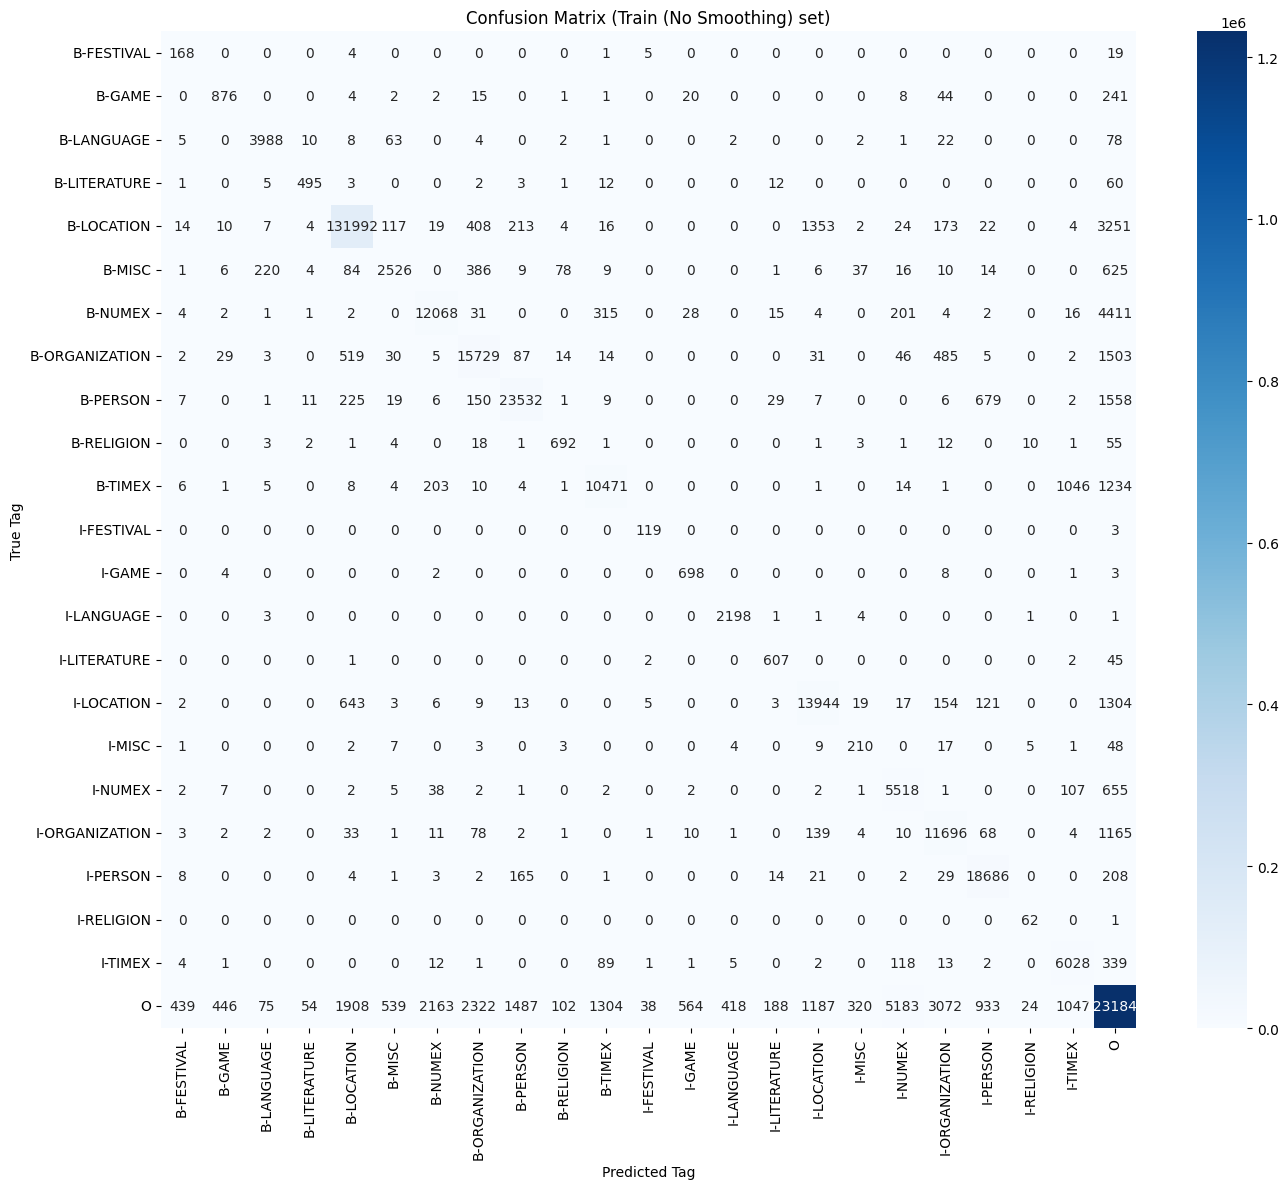


--- Evaluating on Validation (No Smoothing) set ---
              precision    recall  f1-score   support

B-FESTIVAL          0.03    0.53      0.05        30
B-GAME              0.62    0.66      0.64       179
B-LANGUAGE          0.87    0.92      0.89       571
B-LITERATURE        0.11    0.36      0.17        74
B-LOCATION          0.95    0.92      0.93     20062
B-MISC              0.54    0.46      0.49       552
B-NUMEX             0.75    0.68      0.71      2546
B-ORGANIZATION      0.74    0.77      0.75      2644
B-PERSON            0.83    0.80      0.82      3765
B-RELIGION          0.66    0.79      0.72       131
B-TIMEX             0.77    0.75      0.76      1758
I-FESTIVAL          0.02    0.43      0.03        21
I-GAME              0.43    0.88      0.58        92
I-LANGUAGE          0.71    1.00      0.83       297
I-LITERATURE        0.02    0.08      0.03        74
I-LOCATION          0.76    0.72      0.74      2292
I-MISC              0.07    0.21      0.10  

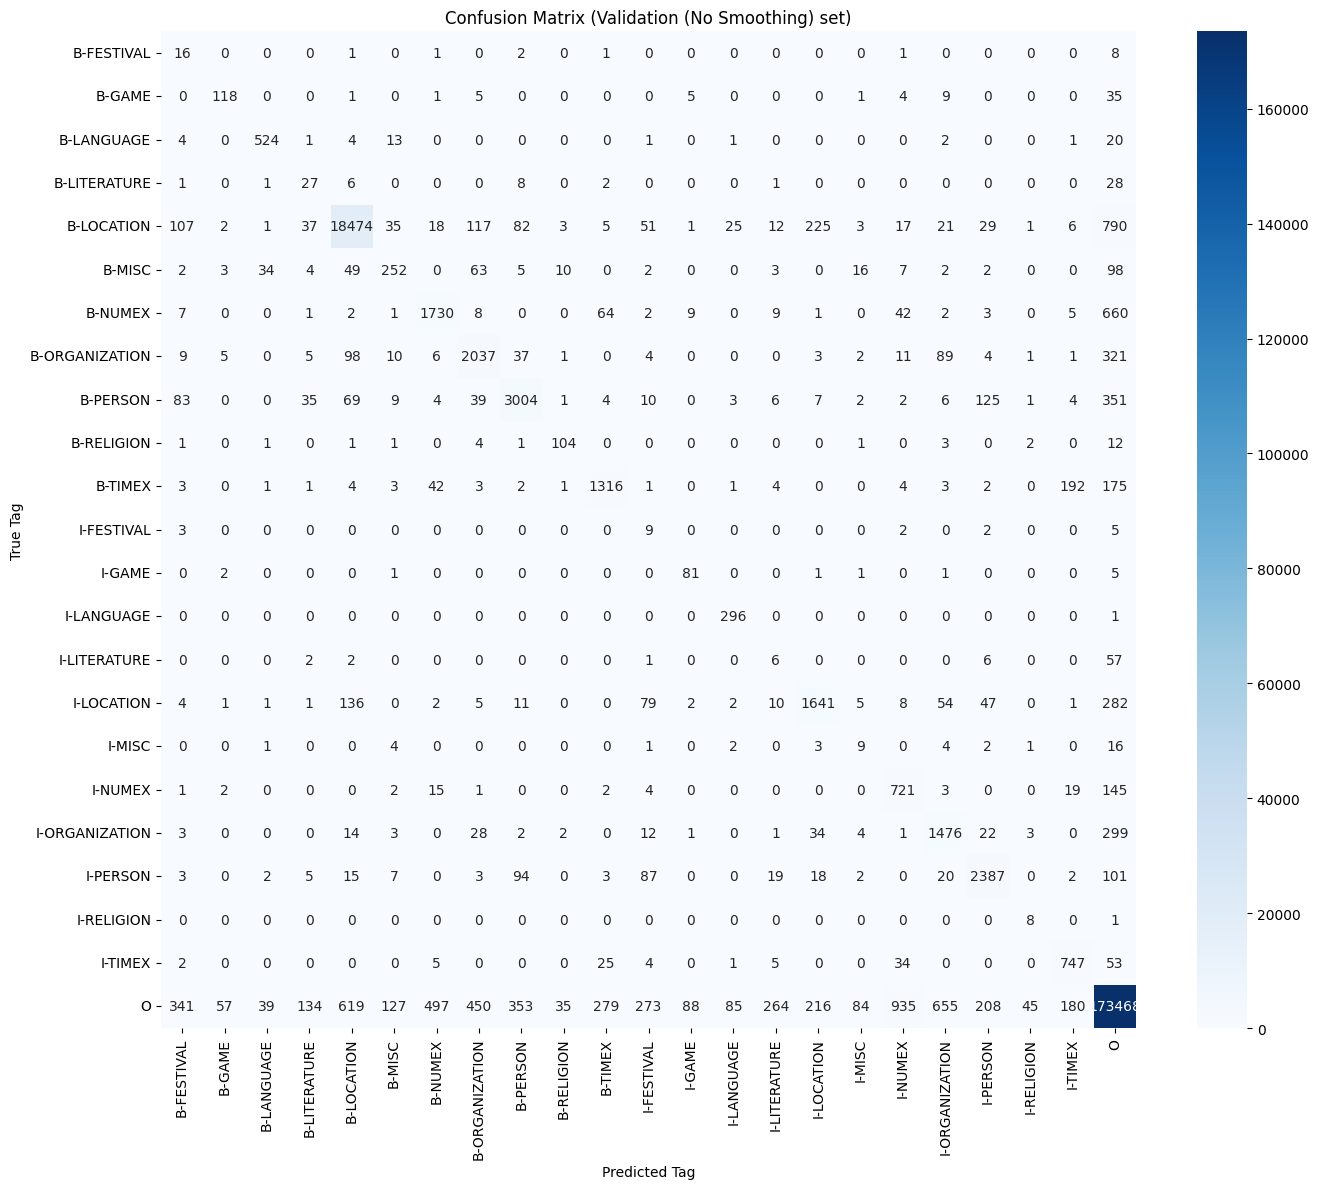


--- Evaluating on Test (No Smoothing) set ---
              precision    recall  f1-score   support

B-FESTIVAL          0.02    0.49      0.03        39
B-GAME              0.55    0.70      0.61       369
B-LANGUAGE          0.88    0.92      0.90      1190
B-LITERATURE        0.13    0.34      0.18       179
B-LOCATION          0.95    0.92      0.93     40072
B-MISC              0.58    0.53      0.55      1065
B-NUMEX             0.73    0.67      0.70      4638
B-ORGANIZATION      0.73    0.77      0.75      5351
B-PERSON            0.84    0.80      0.82      7495
B-RELIGION          0.68    0.88      0.77       230
B-TIMEX             0.77    0.74      0.76      3645
I-FESTIVAL          0.01    0.27      0.01        26
I-GAME              0.44    0.84      0.57       231
I-LANGUAGE          0.72    0.98      0.83       603
I-LITERATURE        0.08    0.33      0.12       171
I-LOCATION          0.76    0.71      0.73      4731
I-MISC              0.12    0.42      0.19        

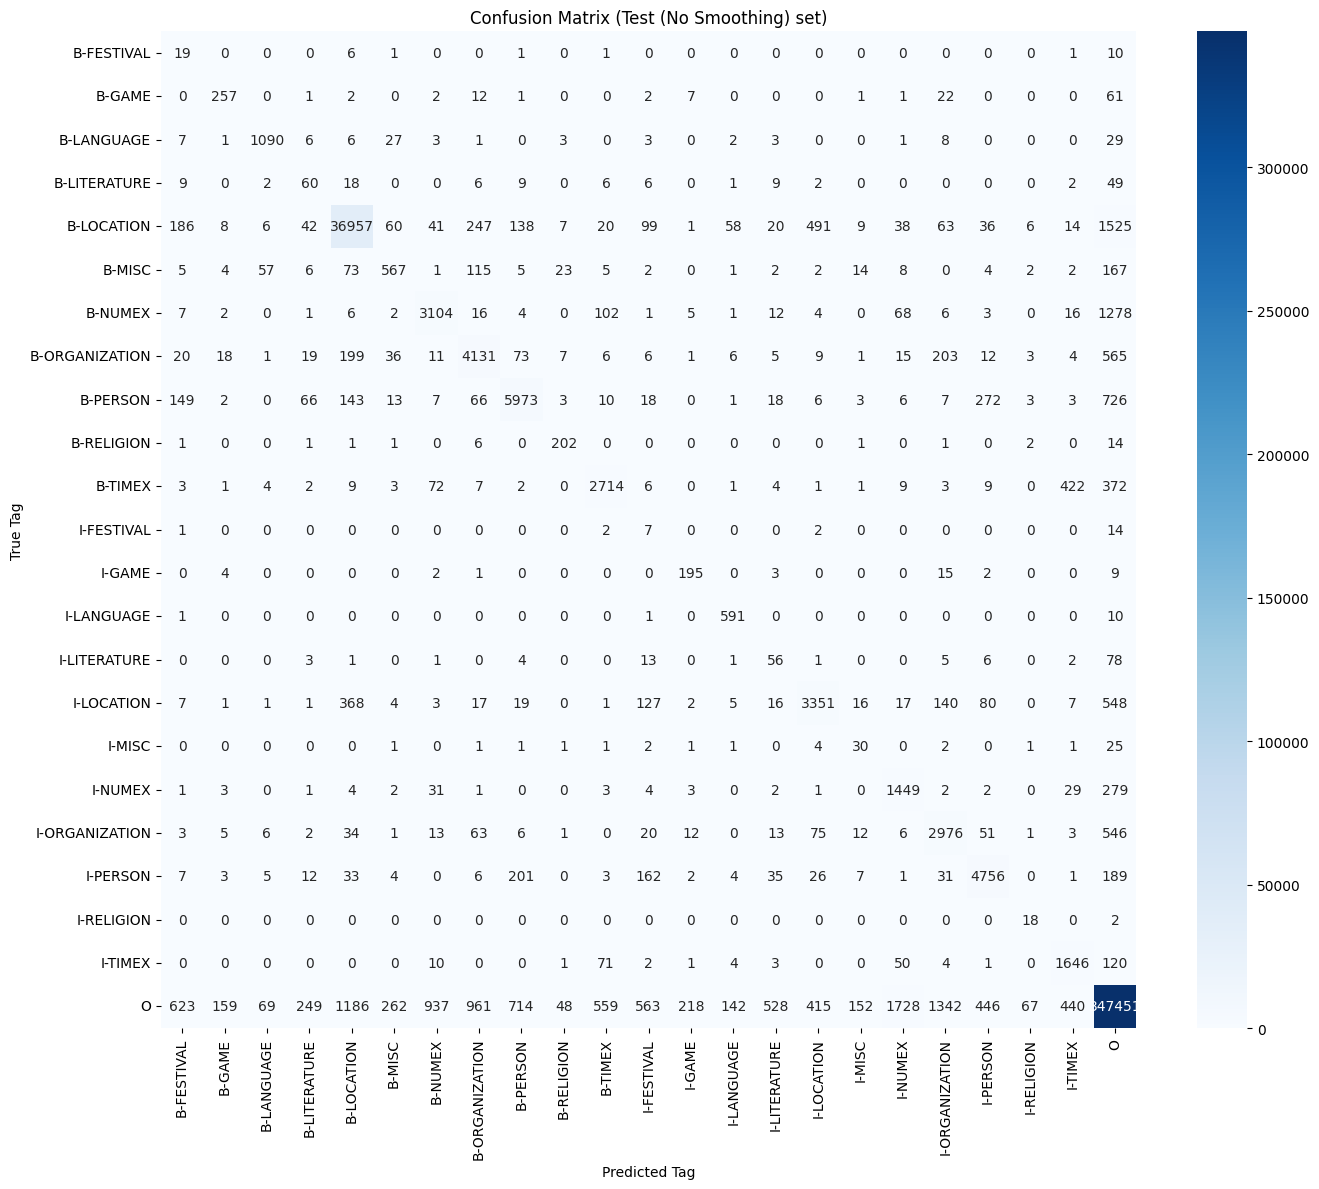


--- Evaluating on Train (Laplace Smoothing) set ---
              precision    recall  f1-score   support

B-FESTIVAL          0.00    0.00    nan       197
B-GAME              0.74    0.03      0.05      1214
B-LANGUAGE          0.94    0.82      0.88      4186
B-LITERATURE        0.38    0.09      0.14       594
B-LOCATION          0.94    0.94      0.94    137633
B-MISC              0.60    0.01      0.02      4032
B-NUMEX             0.89    0.41      0.56     17105
B-ORGANIZATION      0.84    0.62      0.71     18504
B-PERSON            0.86    0.75      0.80     26242
B-RELIGION          nan    0.00    nan       805
B-TIMEX             0.84    0.60      0.70     13009
I-FESTIVAL          nan    0.00    nan       122
I-GAME              0.66    0.06      0.10       716
I-LANGUAGE          0.84    0.98      0.91      2209
I-LITERATURE        0.12    0.15      0.13       657
I-LOCATION          0.86    0.73      0.79     16243
I-MISC              0.00    0.00    nan       310
I-NUM

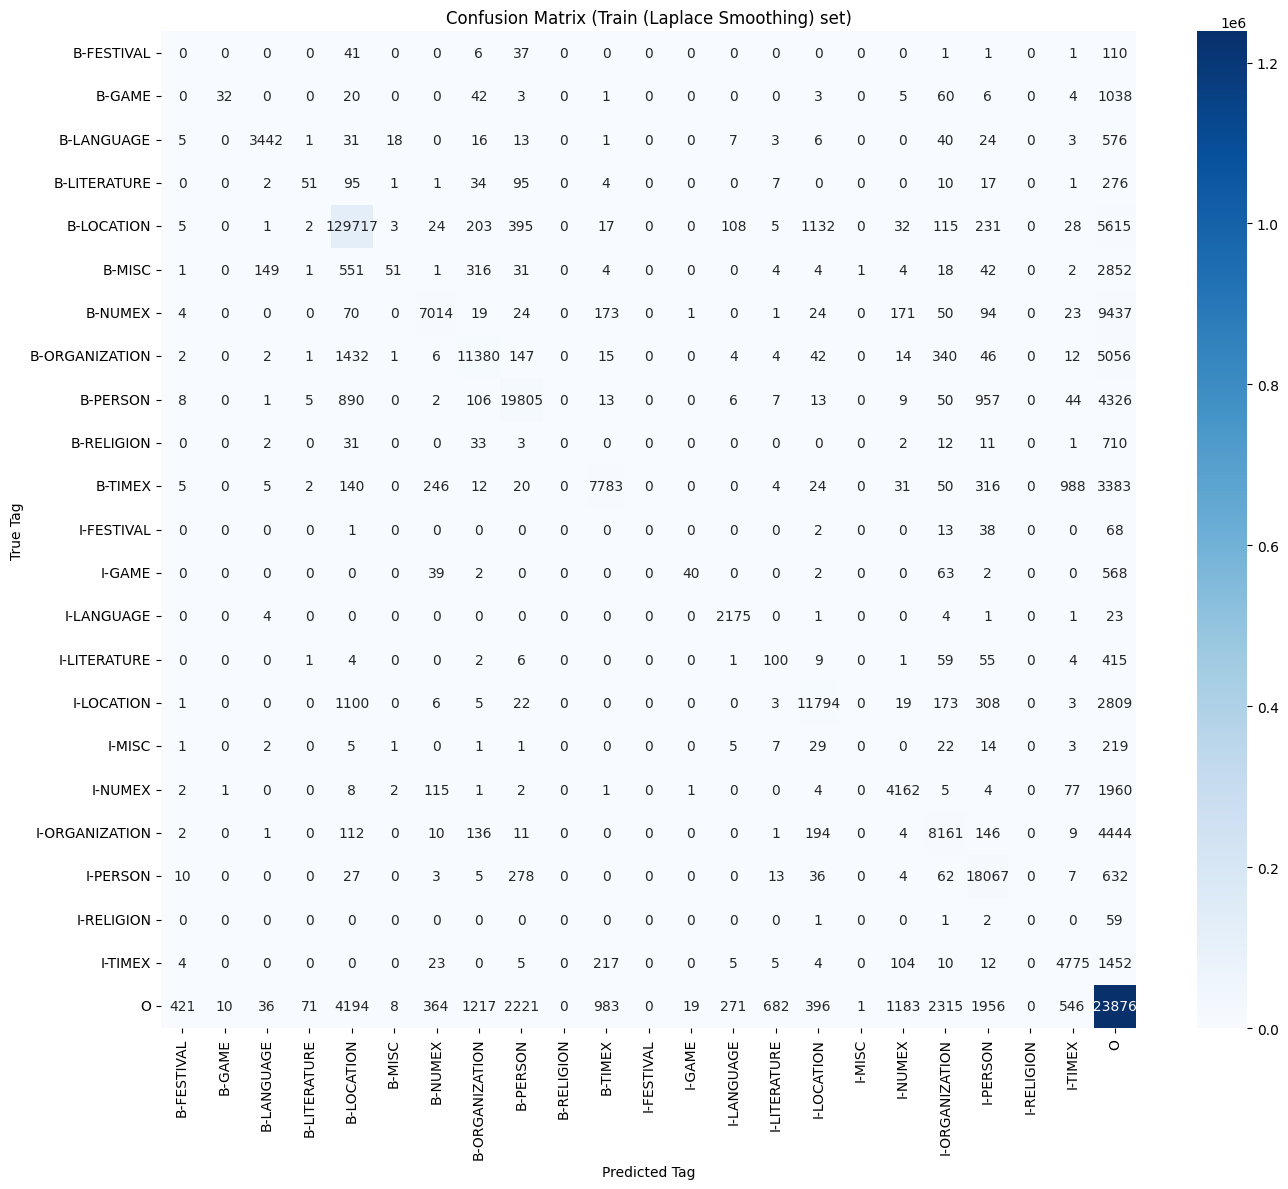


--- Evaluating on Validation (Laplace Smoothing) set ---
              precision    recall  f1-score   support

B-FESTIVAL          0.00    0.00    nan        30
B-GAME              0.67    0.02      0.04       179
B-LANGUAGE          0.93    0.81      0.87       571
B-LITERATURE        0.18    0.04      0.07        74
B-LOCATION          0.93    0.92      0.93     20062
B-MISC              0.43    0.01      0.02       552
B-NUMEX             0.87    0.39      0.54      2546
B-ORGANIZATION      0.79    0.58      0.67      2644
B-PERSON            0.77    0.73      0.75      3765
B-RELIGION          nan    0.00    nan       131
B-TIMEX             0.81    0.58      0.68      1758
I-FESTIVAL          nan    0.00    nan        21
I-GAME              0.50    0.04      0.08        92
I-LANGUAGE          0.83    0.99      0.90       297
I-LITERATURE        0.03    0.05      0.04        74
I-LOCATION          0.82    0.65      0.73      2292
I-MISC              nan    0.00    nan        43
I

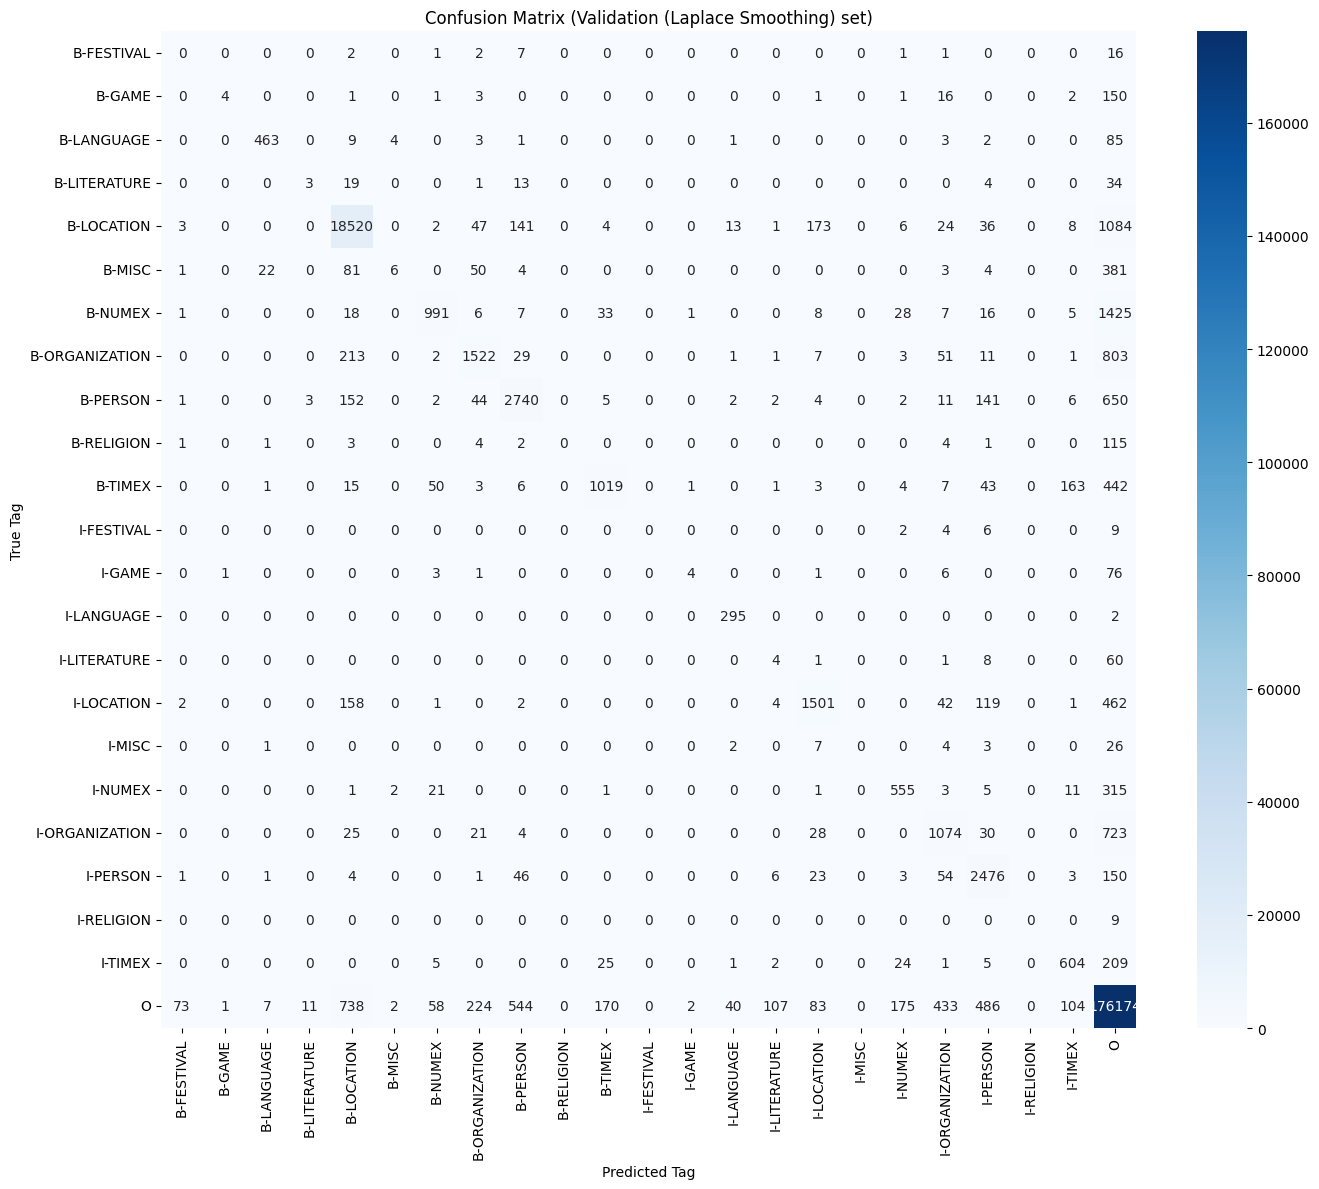


--- Evaluating on Test (Laplace Smoothing) set ---
              precision    recall  f1-score   support

B-FESTIVAL          0.00    0.00    nan        39
B-GAME              0.63    0.03      0.06       369
B-LANGUAGE          0.95    0.78      0.86      1190
B-LITERATURE        0.27    0.04      0.07       179
B-LOCATION          0.93    0.92      0.93     40072
B-MISC              0.52    0.01      0.02      1065
B-NUMEX             0.87    0.40      0.55      4638
B-ORGANIZATION      0.79    0.59      0.67      5351
B-PERSON            0.77    0.73      0.75      7495
B-RELIGION          nan    0.00    nan       230
B-TIMEX             0.82    0.58      0.68      3645
I-FESTIVAL          nan    0.00    nan        26
I-GAME              0.59    0.07      0.12       231
I-LANGUAGE          0.85    0.98      0.91       603
I-LITERATURE        0.09    0.08      0.09       171
I-LOCATION          0.83    0.65      0.73      4731
I-MISC              1.00    0.01      0.03        72
I-N

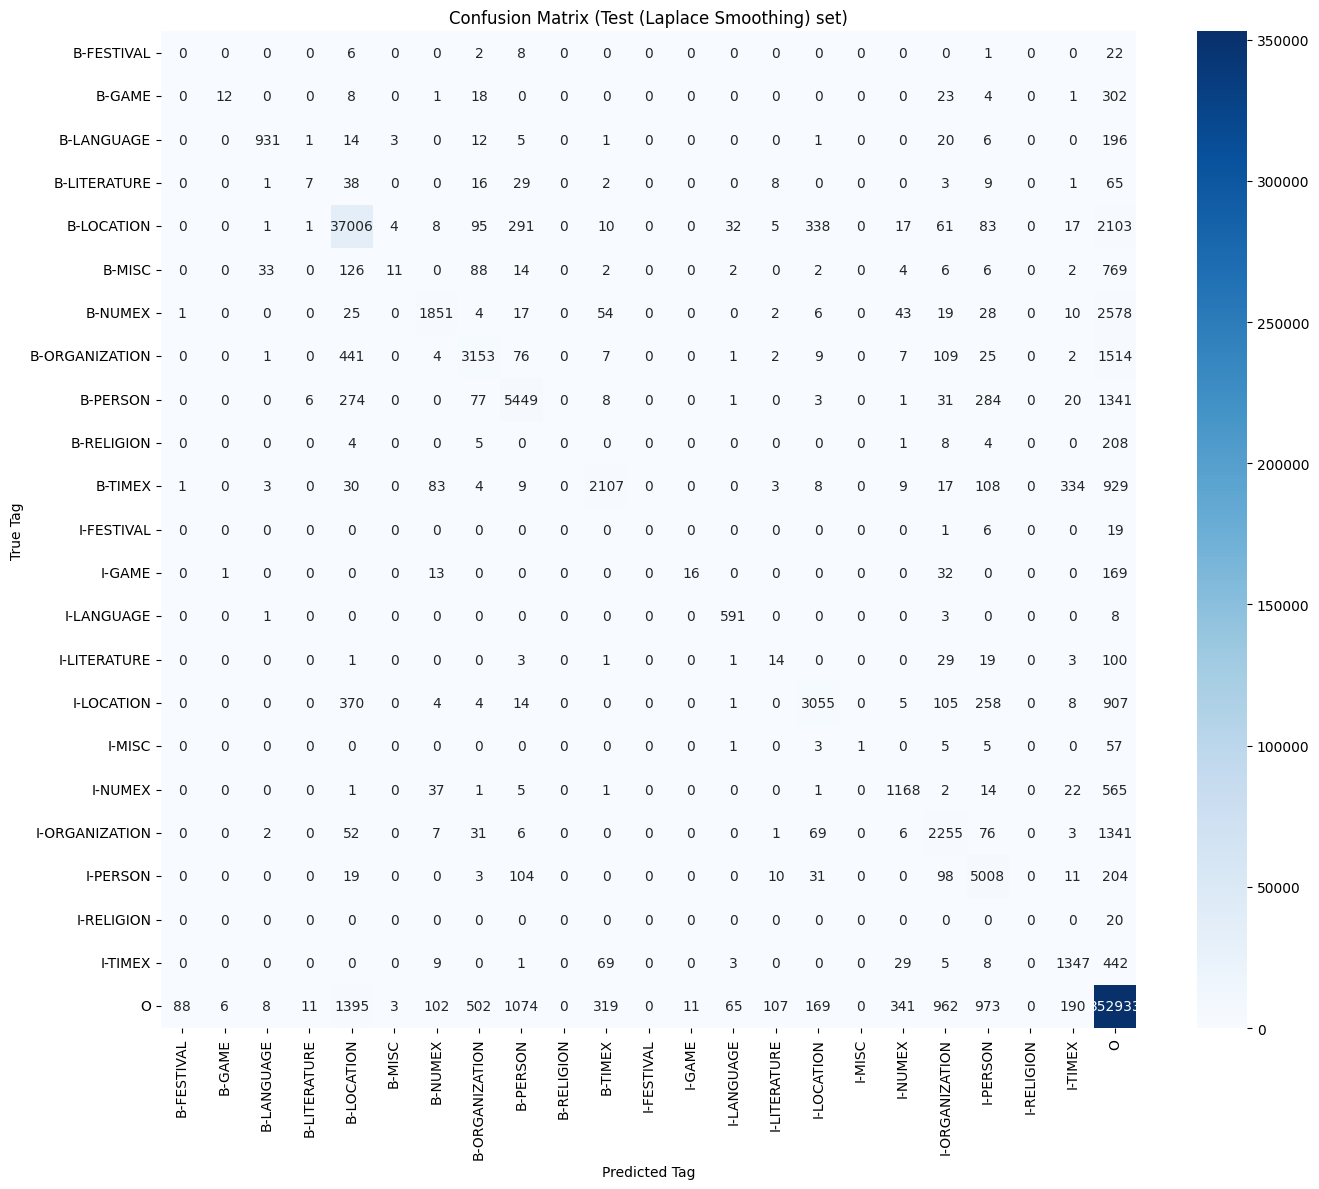

('              precision    recall  f1-score   support\n\nB-FESTIVAL          0.00    0.00    nan        39\nB-GAME              0.63    0.03      0.06       369\nB-LANGUAGE          0.95    0.78      0.86      1190\nB-LITERATURE        0.27    0.04      0.07       179\nB-LOCATION          0.93    0.92      0.93     40072\nB-MISC              0.52    0.01      0.02      1065\nB-NUMEX             0.87    0.40      0.55      4638\nB-ORGANIZATION      0.79    0.59      0.67      5351\nB-PERSON            0.77    0.73      0.75      7495\nB-RELIGION          nan    0.00    nan       230\nB-TIMEX             0.82    0.58      0.68      3645\nI-FESTIVAL          nan    0.00    nan        26\nI-GAME              0.59    0.07      0.12       231\nI-LANGUAGE          0.85    0.98      0.91       603\nI-LITERATURE        0.09    0.08      0.09       171\nI-LOCATION          0.83    0.65      0.73      4731\nI-MISC              1.00    0.01      0.03        72\nI-NUMEX             0.72    0.64  

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def get_confusion_matrix(y_true, y_pred, labels):
    """
    Computes the confusion matrix.

    Args:
        y_true (list): List of true tag IDs.
        y_pred (list): List of predicted tag IDs.
        labels (list): List of all unique label IDs.

    Returns:
        np.array: Confusion matrix.
    """
    num_labels = len(labels)
    matrix = np.zeros((num_labels, num_labels), dtype=int)
    label_to_index = {label: i for i, label in enumerate(labels)}

    for true_label, pred_label in zip(y_true, y_pred):
        # Ensure labels are within the expected range
        if true_label in labels and pred_label in labels:
            true_index = label_to_index[true_label]
            pred_index = label_to_index[pred_label]
            matrix[true_index, pred_index] += 1
        # else:
        #     print(f"Warning: Encountered label not in provided labels list: true={true_label}, pred={pred_label}")


    return matrix


def get_classification_report(y_true, y_pred, labels, zero_division='warn'):
    """
    Computes a classification report including per-class and averaged metrics.

    Args:
        y_true (list): List of true tag IDs.
        y_pred (list): List of predicted tag IDs.
        labels (list): List of all unique label IDs (integer IDs).
        zero_division (str): Defines how to handle cases where there are no predicted samples.

    Returns:
        tuple: (formatted_report_string, confusion_matrix_np)
    """
    cm = get_confusion_matrix(y_true, y_pred, labels)
    num_labels = len(labels)
    label_names = [id_to_tag[i] for i in labels] # Assuming id_to_tag is globally available


    # Calculate TP, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    # TN is not needed for precision, recall, F1, and support per class

    # Calculate per-class metrics
    precision = np.zeros(num_labels)
    recall = np.zeros(num_labels)
    f1_score = np.zeros(num_labels)
    support = np.sum(cm, axis=1) # This is the true count of each class

    for i in range(num_labels):
        # Handle zero division based on the policy
        prec_denom = TP[i] + FP[i]
        precision[i] = TP[i] / prec_denom if prec_denom > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)

        rec_denom = TP[i] + FN[i]
        recall[i] = TP[i] / rec_denom if rec_denom > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)


        f1_denom = precision[i] + recall[i]
        f1_score[i] = 2 * (precision[i] * recall[i]) / f1_denom if f1_denom > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)


    # Calculate overall accuracy
    total_correct = np.sum(TP)
    total_samples = np.sum(cm)
    accuracy = total_correct / total_samples if total_samples > 0 else 0.0


    # Calculate macro, micro, weighted averages
    # Macro average is the unweighted mean of per-class metrics
    macro_precision = np.nanmean(precision)
    macro_recall = np.nanmean(recall)
    macro_f1 = np.nanmean(f1_score)

    # Micro average aggregates counts before calculating metrics
    total_tp = np.sum(TP)
    total_fp = np.sum(FP)
    total_fn = np.sum(FN)
    micro_precision = total_tp / (total_tp + total_fp) if (total_tp + total_fp) > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)
    micro_recall = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall) if (micro_precision + micro_recall) > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)
    # Micro F1 is equivalent to accuracy in multi-class classification where each sample has one true label.

    # Weighted average weights per-class metrics by their support
    total_support = np.sum(support)
    weighted_precision = np.sum(precision * support) / total_support if total_support > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)
    weighted_recall = np.sum(recall * support) / total_support if total_support > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)
    weighted_f1 = np.sum(f1_score * support) / total_support if total_support > 0 else (0.0 if zero_division in ['0', 0, None] else np.nan)


    # Format the report string (similar to sklearn's report)
    report = "              precision    recall  f1-score   support\n\n"
    for i in range(num_labels):
        # Format NaN values as '  nan' or similar if zero_division='warn'
        prec_str = f"{precision[i]:>9.2f}" if not np.isnan(precision[i]) else "     nan"
        rec_str = f"{recall[i]:>8.2f}" if not np.isnan(recall[i]) else "   nan"
        f1_str = f"{f1_score[i]:>10.2f}" if not np.isnan(f1_score[i]) else "    nan"
        report += f"{label_names[i]:<15}{prec_str}{rec_str}{f1_str}{support[i]:>10}\n"

    report += "\n"
    # Add averages and total support
    report += f"    accuracy                           {accuracy:>10.2f}{total_samples:>10}\n"
    report += f"   macro avg       {macro_precision:>9.2f}{macro_recall:>8.2f}{macro_f1:>10.2f}{total_samples:>10}\n"
    report += f"weighted avg       {weighted_precision:>9.2f}{weighted_recall:>8.2f}{weighted_f1:>10.2f}{total_samples:>10}\n"


    return report, cm

def evaluate_model(corpus, initial_prob, transition_prob, emission_prob, num_tags, id_to_tag_map, split_name):
    """
    Evaluates the HMM model on a given corpus.
    """
    y_true = []
    y_pred = []
    labels = list(range(num_tags)) # Use integer IDs as labels


    print(f"\n--- Evaluating on {split_name} set ---")
    for sentence in corpus:
        word_ids = sentence['words']
        true_tag_ids = sentence['tags']

        predicted_tag_ids = viterbi_decode(word_ids, initial_prob, transition_prob, emission_prob, num_tags)

        y_true.extend(true_tag_ids)
        y_pred.extend(predicted_tag_ids)

    # Ensure lengths match (should always be the case if viterbi is correct)
    if len(y_true) != len(y_pred):
        print("Warning: Length of true and predicted tags do not match!")
        min_len = min(len(y_true), len(y_pred))
        y_true = y_true[:min_len]
        y_pred = y_pred[:min_len]


    # Get classification report and confusion matrix
    report, cm = get_classification_report(y_true, y_pred, labels)

    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(14, 12))
    # Use label names for the plot axes
    label_names = [id_to_tag_map[i] for i in labels]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.xlabel('Predicted Tag')
    plt.ylabel('True Tag')
    plt.title(f'Confusion Matrix ({split_name} set)')
    plt.tight_layout()
    plt.show()

    return report, cm

# Evaluate HMM without smoothing
evaluate_model(train_corpus, initial_prob, transition_prob, emission_prob, num_tags, id_to_tag, "Train (No Smoothing)")
evaluate_model(val_corpus, initial_prob, transition_prob, emission_prob, num_tags, id_to_tag, "Validation (No Smoothing)")
evaluate_model(test_corpus, initial_prob, transition_prob, emission_prob, num_tags, id_to_tag, "Test (No Smoothing)")

# Evaluate HMM with Laplace smoothing
evaluate_model(train_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Train (Laplace Smoothing)")
evaluate_model(val_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Validation (Laplace Smoothing)")
evaluate_model(test_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Test (Laplace Smoothing)")


--- Evaluating ROC AUC on Validation (Laplace Smoothing) set ---


/tmp/ipython-input-453995427.py:152: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(tpr, fpr)


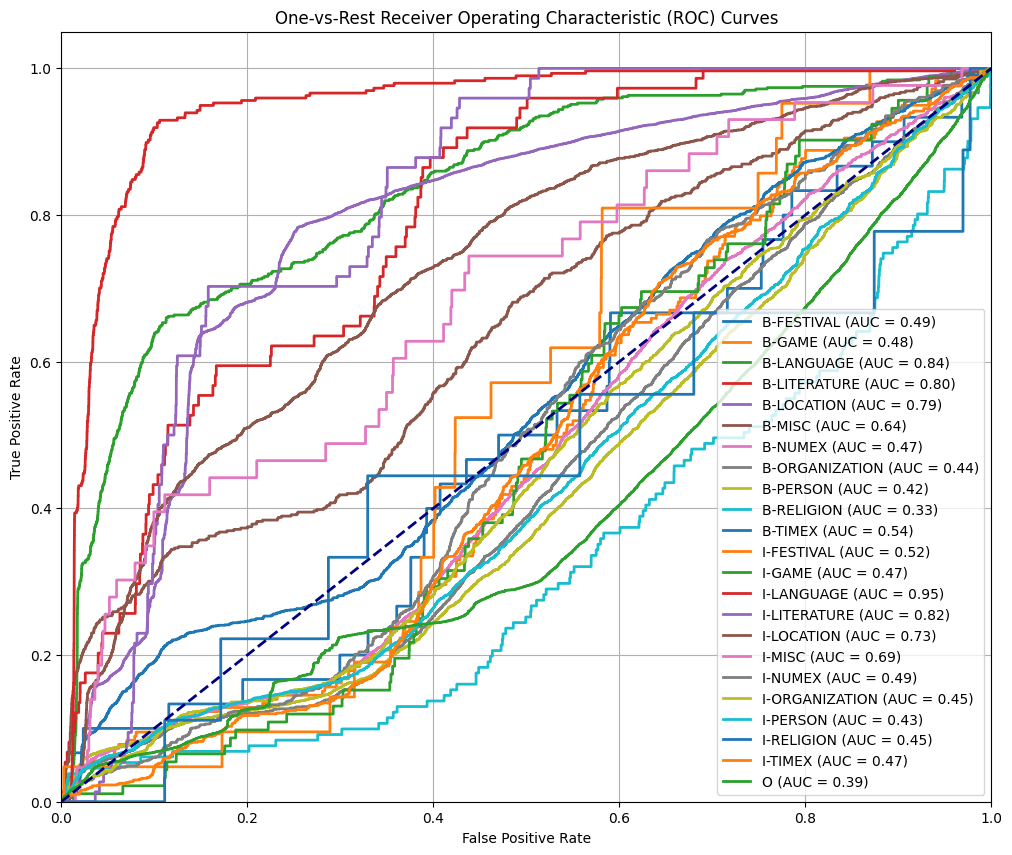

Per tag AUC scores:
{'B-FESTIVAL': np.float64(0.48568002678660316), 'B-GAME': np.float64(0.4790471617128431), 'B-LANGUAGE': np.float64(0.8363317256953668), 'B-LITERATURE': np.float64(0.7959464474385592), 'B-LOCATION': np.float64(0.7885489051283064), 'B-MISC': np.float64(0.6417141347007598), 'B-NUMEX': np.float64(0.4678097971016307), 'B-ORGANIZATION': np.float64(0.4382150868673516), 'B-PERSON': np.float64(0.4204280487334307), 'B-RELIGION': np.float64(0.32530964313871236), 'B-TIMEX': np.float64(0.5356514376205846), 'I-FESTIVAL': np.float64(0.5225398405408812), 'I-GAME': np.float64(0.4681195038207596), 'I-LANGUAGE': np.float64(0.9472701454951985), 'I-LITERATURE': np.float64(0.8151596079746622), 'I-LOCATION': np.float64(0.7277508412457119), 'I-MISC': np.float64(0.6858007393478421), 'I-NUMEX': np.float64(0.4888961021760932), 'I-ORGANIZATION': np.float64(0.45343260735548463), 'I-PERSON': np.float64(0.4316948131445449), 'I-RELIGION': np.float64(0.4491024977843331), 'I-TIMEX': np.float64(0.472

/tmp/ipython-input-453995427.py:152: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score = np.trapz(tpr, fpr)


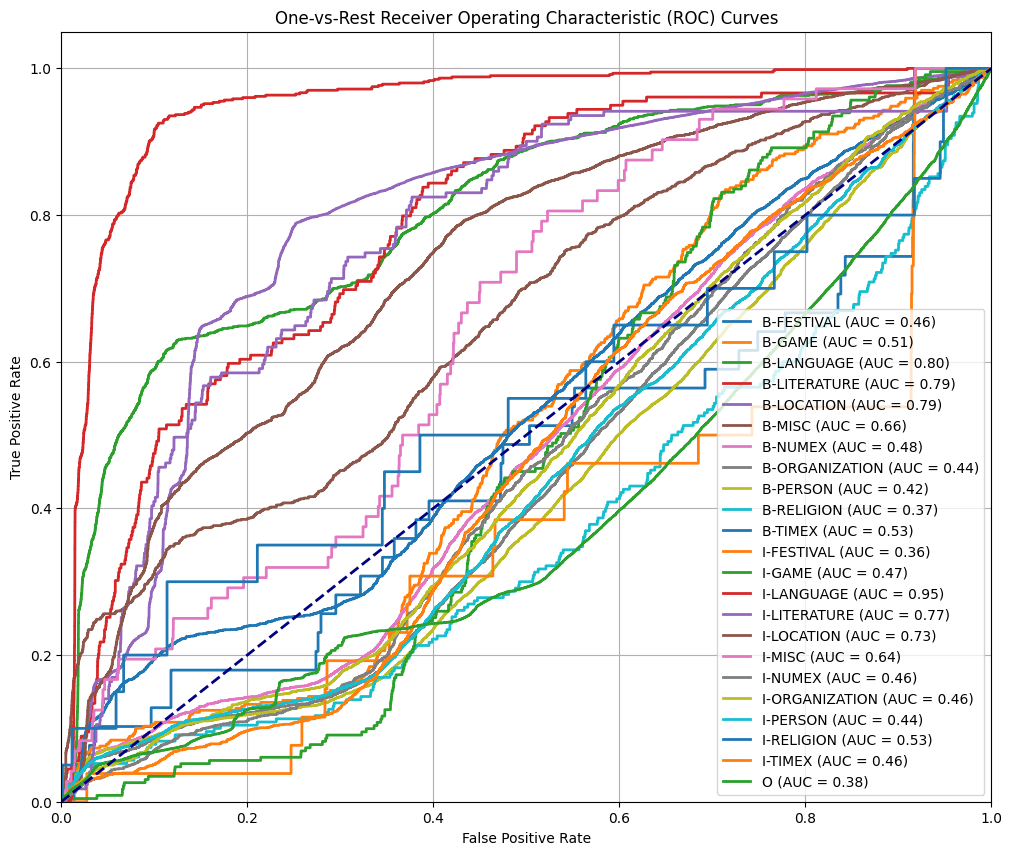

Per tag AUC scores:
{'B-FESTIVAL': np.float64(0.4613236436042676), 'B-GAME': np.float64(0.5059684055187834), 'B-LANGUAGE': np.float64(0.8044321002412155), 'B-LITERATURE': np.float64(0.7858444345643514), 'B-LOCATION': np.float64(0.793429294198553), 'B-MISC': np.float64(0.6568219018953911), 'B-NUMEX': np.float64(0.4785855183467066), 'B-ORGANIZATION': np.float64(0.4437574581503517), 'B-PERSON': np.float64(0.42358460803716325), 'B-RELIGION': np.float64(0.36712462795428125), 'B-TIMEX': np.float64(0.5299172875843547), 'I-FESTIVAL': np.float64(0.36014633270225715), 'I-GAME': np.float64(0.4664223318835709), 'I-LANGUAGE': np.float64(0.9495065973741119), 'I-LITERATURE': np.float64(0.76811256748658), 'I-LOCATION': np.float64(0.7311536559354709), 'I-MISC': np.float64(0.6429588157920185), 'I-NUMEX': np.float64(0.45910475501057274), 'I-ORGANIZATION': np.float64(0.4638787593621244), 'I-PERSON': np.float64(0.43877619617412034), 'I-RELIGION': np.float64(0.5340201228208564), 'I-TIMEX': np.float64(0.4614

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def _forward_pass(obs_seq, pi, A, B):
    """
    Computes the alpha probabilities (forward pass) for a single observation sequence.

    Args:
        obs_seq (list): List of observation (word) IDs.
        pi (np.array): Initial state probabilities (num_tags,).
        A (np.array): Transition probability matrix (num_tags, num_tags).
        B (np.array): Emission probability matrix (num_tags, num_words).

    Returns:
        np.array: Alpha probabilities (seq_len, num_tags).
    """
    T = len(obs_seq)
    N = pi.shape[0]
    alpha = np.zeros((T, N))

    # Initialization
    first_word_id = obs_seq[0]
    # Handle unknown words during decoding
    if first_word_id >= B.shape[1]:
        first_word_emission = 1e-9
    else:
        first_word_emission = B[:, first_word_id]

    alpha[0, :] = pi * first_word_emission


    # Recursion
    for t in range(1, T):
        current_word_id = obs_seq[t]
        if current_word_id >= B.shape[1]:
             current_word_emission = 1e-9
        else:
            current_word_emission = B[:, current_word_id]

        for j in range(N): # current tag
             alpha[t, j] = np.sum(alpha[t-1, :] * A[:, j]) * current_word_emission[j]


    return alpha

def _backward_pass(obs_seq, pi, A, B):
    """
    Computes the beta probabilities (backward pass) for a single observation sequence.

    Args:
        obs_seq (list): List of observation (word) IDs.
        pi (np.array): Initial state probabilities (num_tags,).
        A (np.array): Transition probability matrix (num_tags, num_tags).
        B (np.array): Emission probability matrix (num_tags, num_words).

    Returns:
        np.array: Beta probabilities (seq_len, num_tags).
    """
    T = len(obs_seq)
    N = pi.shape[0]
    beta = np.zeros((T, N))

    # Initialization
    beta[T-1, :] = 1.0

    # Recursion
    for t in range(T - 2, -1, -1):
        next_word_id = obs_seq[t+1]
        if next_word_id >= B.shape[1]:
            next_word_emission = 1e-9
        else:
            next_word_emission = B[:, next_word_id]

        for i in range(N): # current tag
            beta[t, i] = np.sum(A[i, :] * next_word_emission * beta[t+1, :])


    return beta

def get_posterior_scores(sentence_word_ids, initial_prob, transition_prob, emission_prob, num_tags):
    """
    Computes posterior probabilities for each tag at each time step using Forward-Backward.

    Args:
        sentence_word_ids (list): A list of word IDs representing the sentence.
        initial_prob (np.array): The initial state probability vector (pi).
        transition_prob (np.array): The transition probability matrix (A).
        emission_prob (np.array): The emission probability matrix (O).
        num_tags (int): The total number of unique tags.

    Returns:
        np.array: Posterior probabilities (seq_len, num_tags).
                  Each entry [t, j] is P(tag_t=j | observed_sequence).
    """
    T = len(sentence_word_ids)
    if T == 0:
        return np.zeros((0, num_tags))

    alpha = _forward_pass(sentence_word_ids, initial_prob, transition_prob, emission_prob)
    beta = _backward_pass(sentence_word_ids, initial_prob, transition_prob, emission_prob)

    # Calculate posterior probabilities
    # gamma_t(j) = (alpha_t(j) * beta_t(j)) / sum_k(alpha_T(k))
    posterior = alpha * beta
    # Normalize across tags for each time step
    posterior_sum = np.sum(posterior, axis=1, keepdims=True)
    # Add a small epsilon to avoid division by zero if sum is zero
    posterior = posterior / (posterior_sum + 1e-9)


    return posterior

def roc_curve_from_scratch(y_true_binary, y_score):
    """
    Compute ROC points (FPR, TPR) from scratch.
    Equivalent to sklearn.metrics.roc_curve for binary classification.
    """
    # Sort scores and corresponding truth values
    desc_score_indices = np.argsort(y_score, kind="mergesort")[::-1]
    y_score = y_score[desc_score_indices]
    y_true_binary = y_true_binary[desc_score_indices]

    # Calculate cumulative counts
    tps = np.cumsum(y_true_binary)
    fps = np.cumsum(1 - y_true_binary)

    # Add the point (0, 0) to the beginning
    tps = np.r_[0, tps]
    fps = np.r_[0, fps]

    # Calculate TPR and FPR
    tpr = tps / tps[-1] if tps[-1] > 0 else np.zeros_like(tps)
    fpr = fps / fps[-1] if fps[-1] > 0 else np.zeros_like(fps)


    return fpr, tpr, None # Returning None for thresholds to match sklearn signature

def auc_from_scratch(fpr, tpr):
    """
    Compute Area Under the Curve (AUC) using the trapezoidal rule.
    Equivalent to sklearn.metrics.auc.
    """
    # Sort points by FPR
    sorted_indices = np.argsort(fpr)
    fpr = fpr[sorted_indices]
    tpr = tpr[sorted_indices]

    # Use trapezoidal rule
    auc_score = np.trapz(tpr, fpr)


    return auc_score


def plot_one_vs_rest_roc(y_true, y_scores, id_to_tag_map):
    """
    Computes and plots One-vs-Rest ROC curves for each class.
    """
    num_tags = y_scores.shape[1]
    labels = list(range(num_tags))

    # Binarize the true labels
    y_true_binarized = label_binarize(y_true, classes=labels)

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}

    plt.figure(figsize=(12, 10))
    for i in range(num_tags):
        # Use your from-scratch functions
        fpr[i], tpr[i], _ = roc_curve_from_scratch(y_true_binarized[:, i], y_scores[:, i])
        roc_auc[i] = auc_from_scratch(fpr[i], tpr[i])

        # Check against sklearn's result (Optional, for verification)
        # fpr_sk, tpr_sk, _ = roc_curve(y_true_binarized[:, i], y_scores[:, i])
        # roc_auc_sk = auc(fpr_sk, tpr_sk)
        # print(f"Tag {id_to_tag_map[i]}: My AUC = {roc_auc[i]:.4f}, Sklearn AUC = {roc_auc_sk:.4f}")


        # Plot ROC curve
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'{id_to_tag_map[i]} (AUC = {roc_auc[i]:0.2f})')

    # Plot the random guessing line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-vs-Rest Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    print('Per tag AUC scores:')
    per_tag_aucs = {id_to_tag_map[i]: roc_auc[i] for i in range(num_tags)}
    print(per_tag_aucs)


def evaluate_and_plot_roc(corpus, initial_prob, transition_prob, emission_prob, num_tags, id_to_tag_map, split_name):
    """
    Evaluates the HMM model using ROC AUC and plots the curves.
    """
    y_true = []
    y_scores = []


    print(f"\n--- Evaluating ROC AUC on {split_name} set ---")
    for sentence in corpus:
        word_ids = sentence['words']
        true_tag_ids = sentence['tags']

        # Get posterior probabilities for each tag at each position
        posterior_scores = get_posterior_scores(word_ids, initial_prob, transition_prob, emission_prob, num_tags)

        y_true.extend(true_tag_ids)
        # Extend y_scores by concatenating the posterior scores for the current sentence
        if len(y_scores) == 0:
            y_scores = posterior_scores
        else:
            y_scores = np.concatenate((y_scores, posterior_scores), axis=0)


    # Convert lists to numpy arrays for plotting
    y_true = np.array(y_true)
    # y_scores is already a numpy array


    # Plot One-vs-Rest ROC curves
    plot_one_vs_rest_roc(y_true, y_scores, id_to_tag_map)

# Call the evaluation function on the validation/test set using the HMM with Laplace smoothing
evaluate_and_plot_roc(val_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Validation (Laplace Smoothing)")
evaluate_and_plot_roc(test_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Test (Laplace Smoothing)")


--- Evaluating on Train (Laplace Smoothing) set (sklearn, exclude_o_tag=True) ---
Accuracy: 0.7903

Classification Report:
                precision    recall  f1-score   support

    B-FESTIVAL       0.00      0.00      0.00       197
        B-GAME       0.97      0.03      0.05      1214
    B-LANGUAGE       0.95      0.82      0.88      4186
  B-LITERATURE       0.80      0.09      0.16       594
    B-LOCATION       0.97      0.94      0.95    137633
        B-MISC       0.66      0.01      0.02      4032
       B-NUMEX       0.94      0.41      0.57     17105
B-ORGANIZATION       0.92      0.62      0.74     18504
      B-PERSON       0.95      0.75      0.84     26242
    B-RELIGION       0.00      0.00      0.00       805
       B-TIMEX       0.95      0.60      0.73     13009
    I-FESTIVAL       0.00      0.00      0.00       122
        I-GAME       0.95      0.06      0.11       716
    I-LANGUAGE       0.94      0.98      0.96      2209
  I-LITERATURE       0.61      0.15

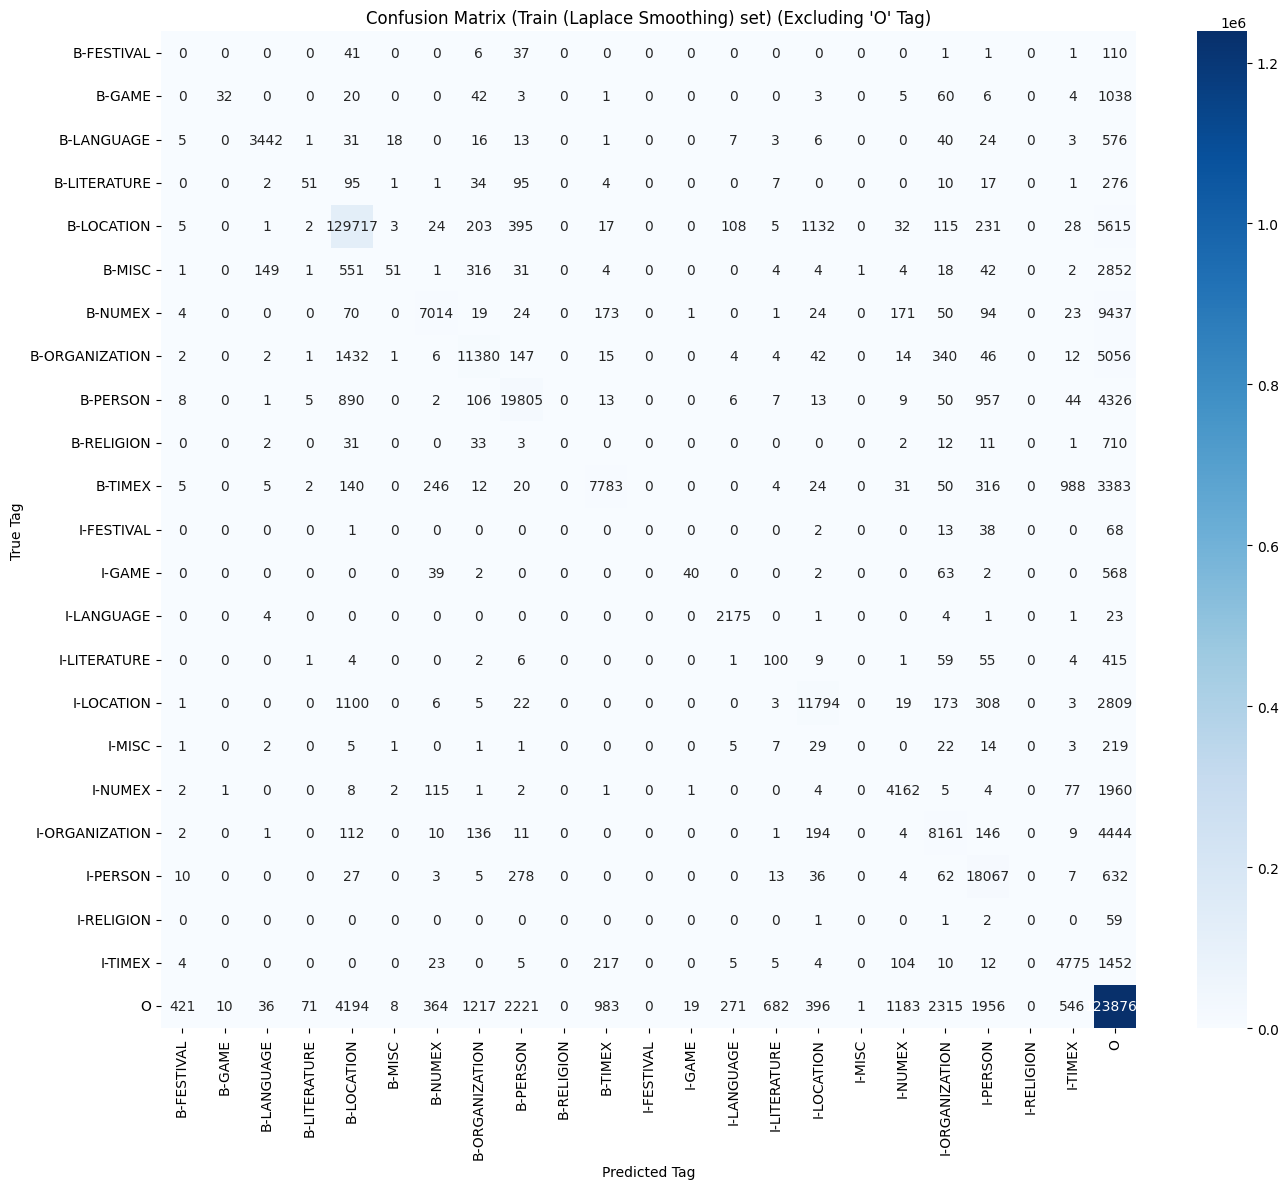


--- Evaluating on Validation (Laplace Smoothing) set (sklearn, exclude_o_tag=True) ---
Accuracy: 0.7639

Classification Report:
                precision    recall  f1-score   support

    B-FESTIVAL       0.00      0.00      0.00        30
        B-GAME       0.80      0.02      0.04       179
    B-LANGUAGE       0.95      0.81      0.87       571
  B-LITERATURE       0.50      0.04      0.07        74
    B-LOCATION       0.96      0.92      0.94     20062
        B-MISC       0.50      0.01      0.02       552
       B-NUMEX       0.92      0.39      0.55      2546
B-ORGANIZATION       0.89      0.58      0.70      2644
      B-PERSON       0.91      0.73      0.81      3765
    B-RELIGION       0.00      0.00      0.00       131
       B-TIMEX       0.94      0.58      0.72      1758
    I-FESTIVAL       0.00      0.00      0.00        21
        I-GAME       0.67      0.04      0.08        92
    I-LANGUAGE       0.94      0.99      0.96       297
  I-LITERATURE       0.19     

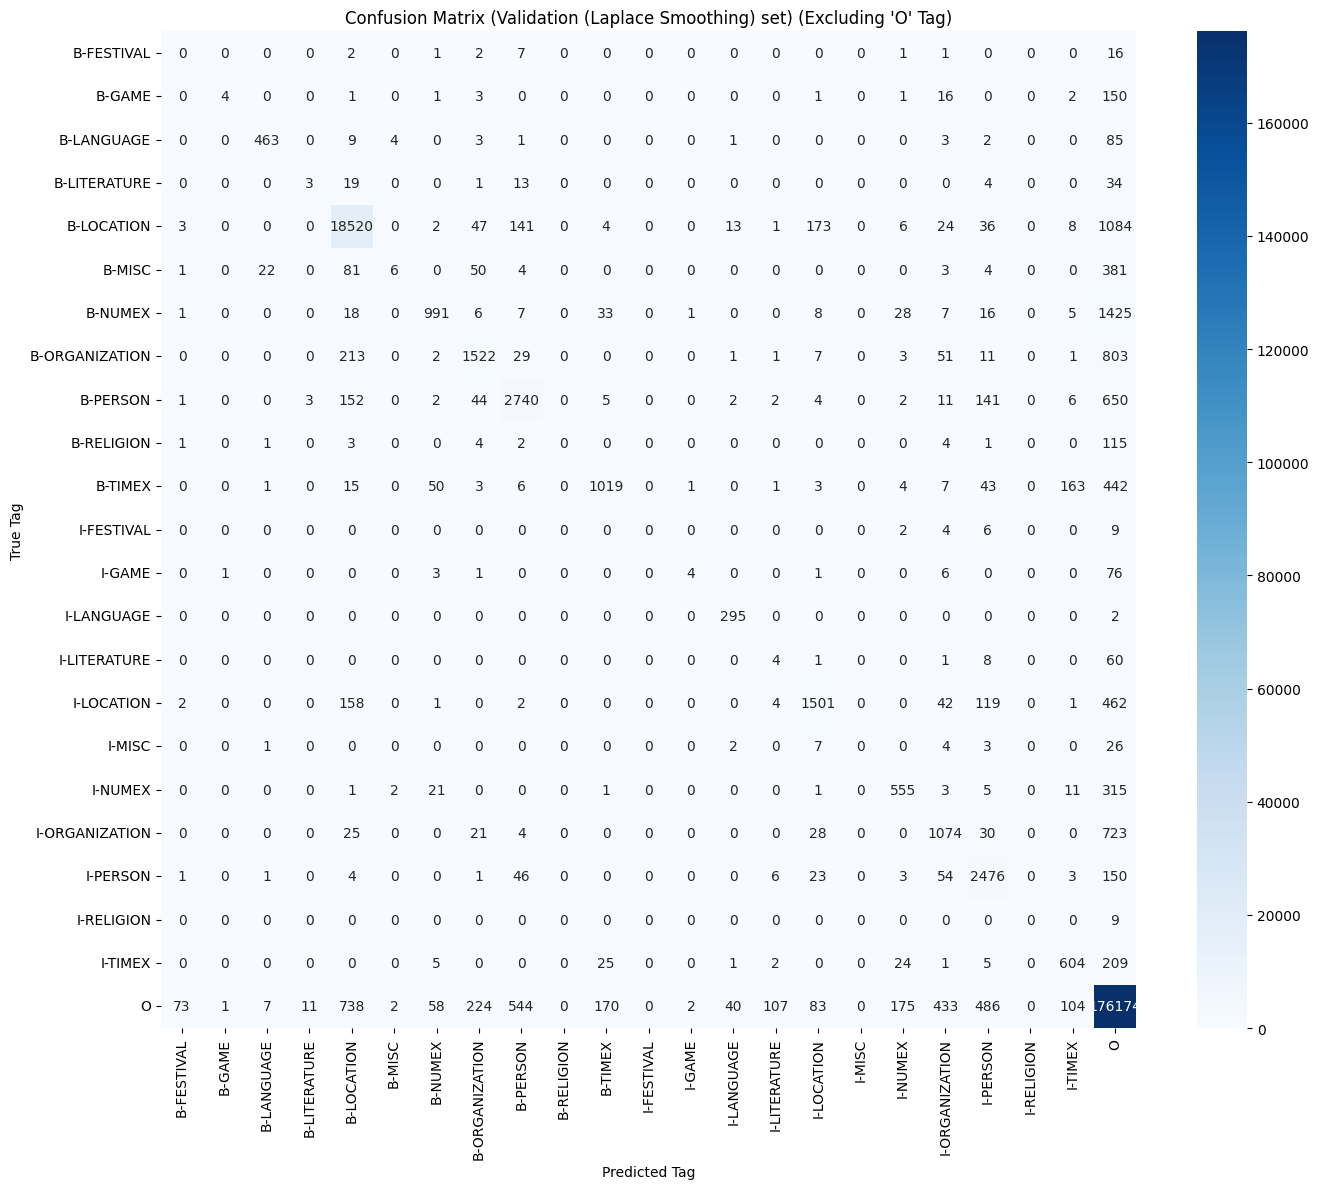


--- Evaluating on Test (Laplace Smoothing) set (sklearn, exclude_o_tag=True) ---
Accuracy: 0.7691

Classification Report:
                precision    recall  f1-score   support

    B-FESTIVAL       0.00      0.00      0.00        39
        B-GAME       0.92      0.03      0.06       369
    B-LANGUAGE       0.96      0.78      0.86      1190
  B-LITERATURE       0.47      0.04      0.07       179
    B-LOCATION       0.96      0.92      0.94     40072
        B-MISC       0.61      0.01      0.02      1065
       B-NUMEX       0.92      0.40      0.56      4638
B-ORGANIZATION       0.90      0.59      0.71      5351
      B-PERSON       0.90      0.73      0.81      7495
    B-RELIGION       0.00      0.00      0.00       230
       B-TIMEX       0.93      0.58      0.71      3645
    I-FESTIVAL       0.00      0.00      0.00        26
        I-GAME       1.00      0.07      0.13       231
    I-LANGUAGE       0.93      0.98      0.96       603
  I-LITERATURE       0.31      0.08 

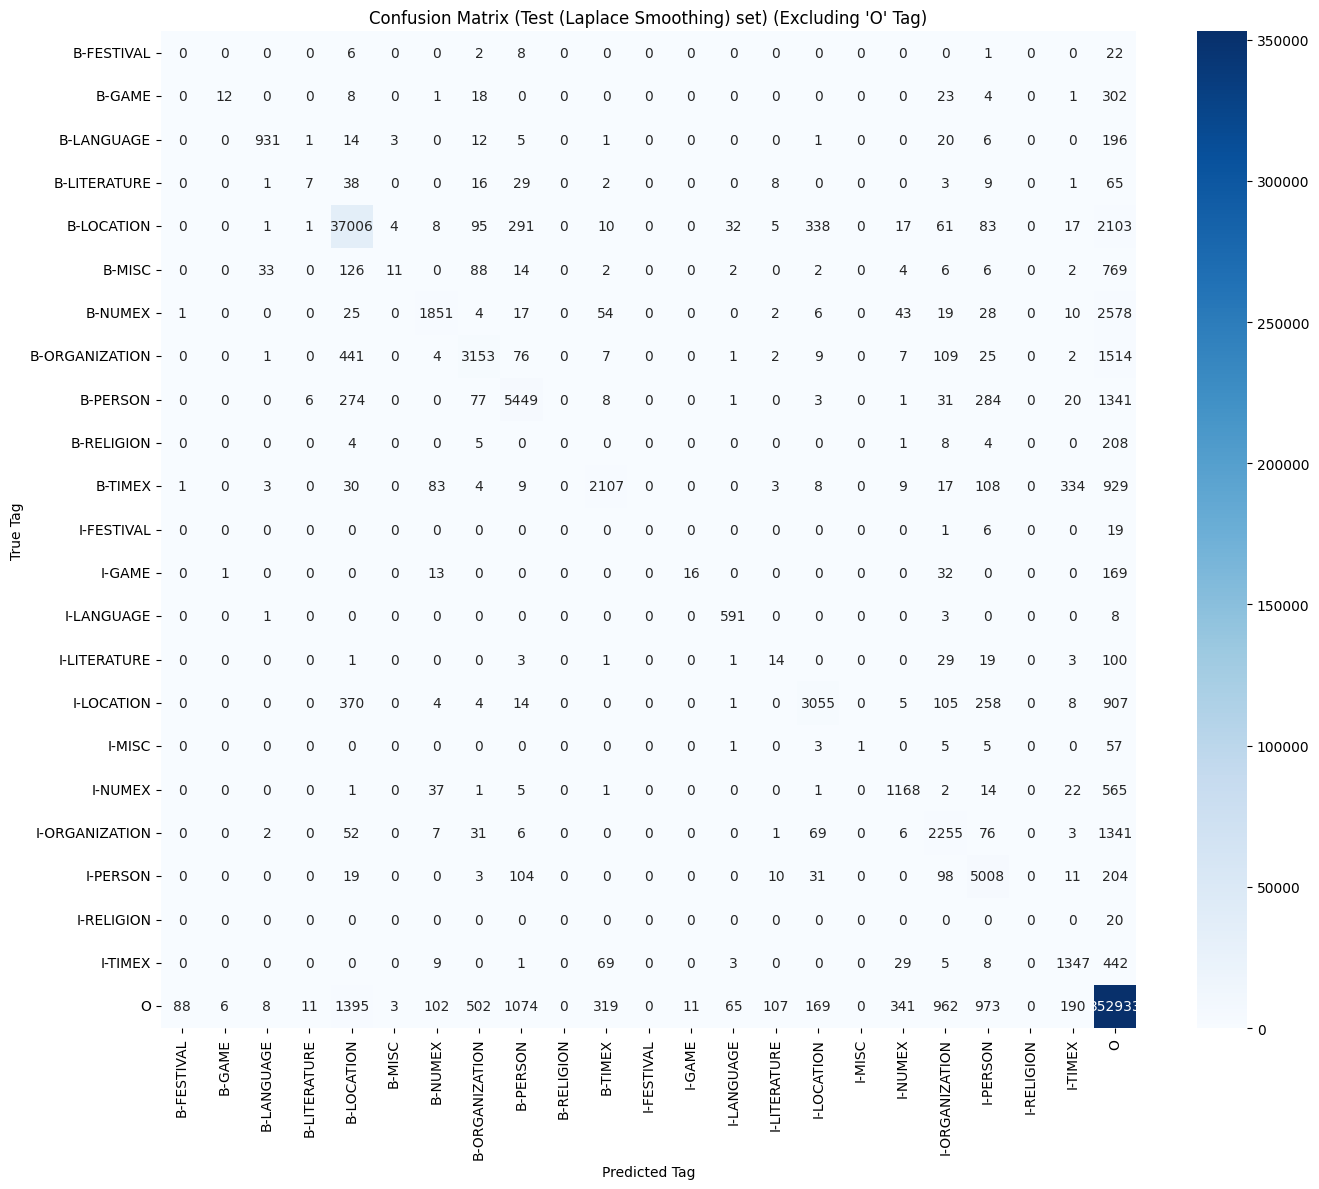


--- Evaluating on Train (Laplace Smoothing) set (sklearn, exclude_o_tag=False) ---
Accuracy: 0.9498

Classification Report:
                precision    recall  f1-score   support

    B-FESTIVAL       0.00      0.00      0.00       197
        B-GAME       0.74      0.03      0.05      1214
    B-LANGUAGE       0.94      0.82      0.88      4186
  B-LITERATURE       0.38      0.09      0.14       594
    B-LOCATION       0.94      0.94      0.94    137633
        B-MISC       0.60      0.01      0.02      4032
       B-NUMEX       0.89      0.41      0.56     17105
B-ORGANIZATION       0.84      0.62      0.71     18504
      B-PERSON       0.86      0.75      0.80     26242
    B-RELIGION       0.00      0.00      0.00       805
       B-TIMEX       0.84      0.60      0.70     13009
    I-FESTIVAL       0.00      0.00      0.00       122
        I-GAME       0.66      0.06      0.10       716
    I-LANGUAGE       0.84      0.98      0.91      2209
  I-LITERATURE       0.12      0.1

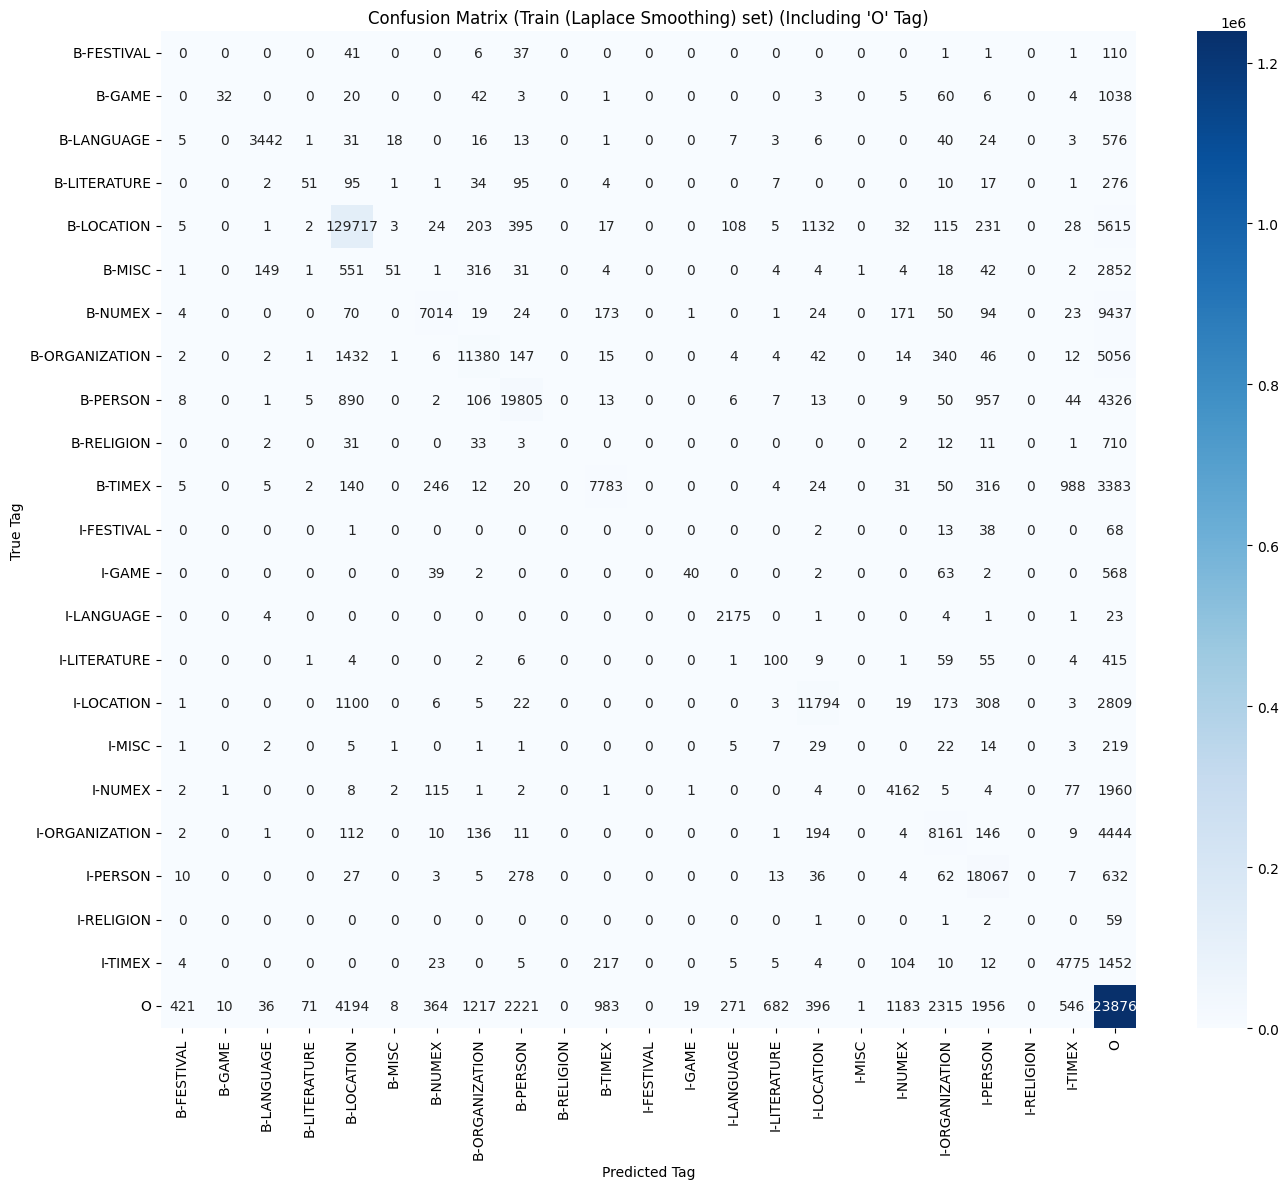


--- Evaluating on Validation (Laplace Smoothing) set (sklearn, exclude_o_tag=False) ---
Accuracy: 0.9408

Classification Report:
                precision    recall  f1-score   support

    B-FESTIVAL       0.00      0.00      0.00        30
        B-GAME       0.67      0.02      0.04       179
    B-LANGUAGE       0.93      0.81      0.87       571
  B-LITERATURE       0.18      0.04      0.07        74
    B-LOCATION       0.93      0.92      0.93     20062
        B-MISC       0.43      0.01      0.02       552
       B-NUMEX       0.87      0.39      0.54      2546
B-ORGANIZATION       0.79      0.58      0.67      2644
      B-PERSON       0.77      0.73      0.75      3765
    B-RELIGION       0.00      0.00      0.00       131
       B-TIMEX       0.81      0.58      0.68      1758
    I-FESTIVAL       0.00      0.00      0.00        21
        I-GAME       0.50      0.04      0.08        92
    I-LANGUAGE       0.83      0.99      0.90       297
  I-LITERATURE       0.03    

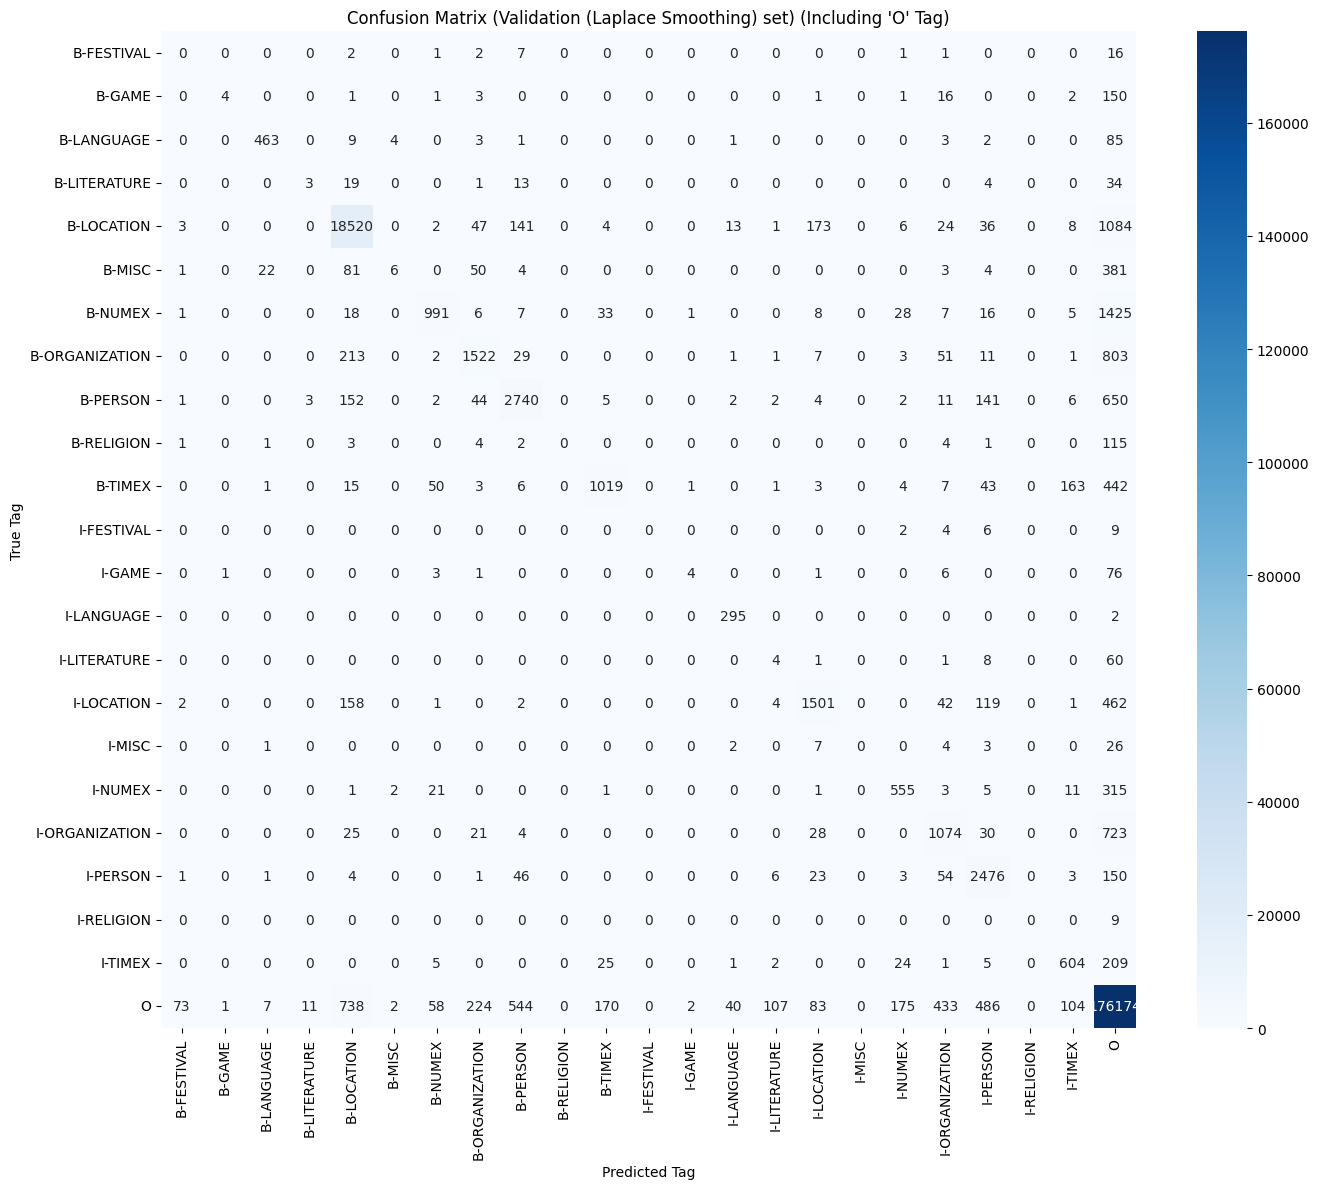


--- Evaluating on Test (Laplace Smoothing) set (sklearn, exclude_o_tag=False) ---
Accuracy: 0.9423

Classification Report:
                precision    recall  f1-score   support

    B-FESTIVAL       0.00      0.00      0.00        39
        B-GAME       0.63      0.03      0.06       369
    B-LANGUAGE       0.95      0.78      0.86      1190
  B-LITERATURE       0.27      0.04      0.07       179
    B-LOCATION       0.93      0.92      0.93     40072
        B-MISC       0.52      0.01      0.02      1065
       B-NUMEX       0.87      0.40      0.55      4638
B-ORGANIZATION       0.79      0.59      0.67      5351
      B-PERSON       0.77      0.73      0.75      7495
    B-RELIGION       0.00      0.00      0.00       230
       B-TIMEX       0.82      0.58      0.68      3645
    I-FESTIVAL       0.00      0.00      0.00        26
        I-GAME       0.59      0.07      0.12       231
    I-LANGUAGE       0.85      0.98      0.91       603
  I-LITERATURE       0.09      0.08

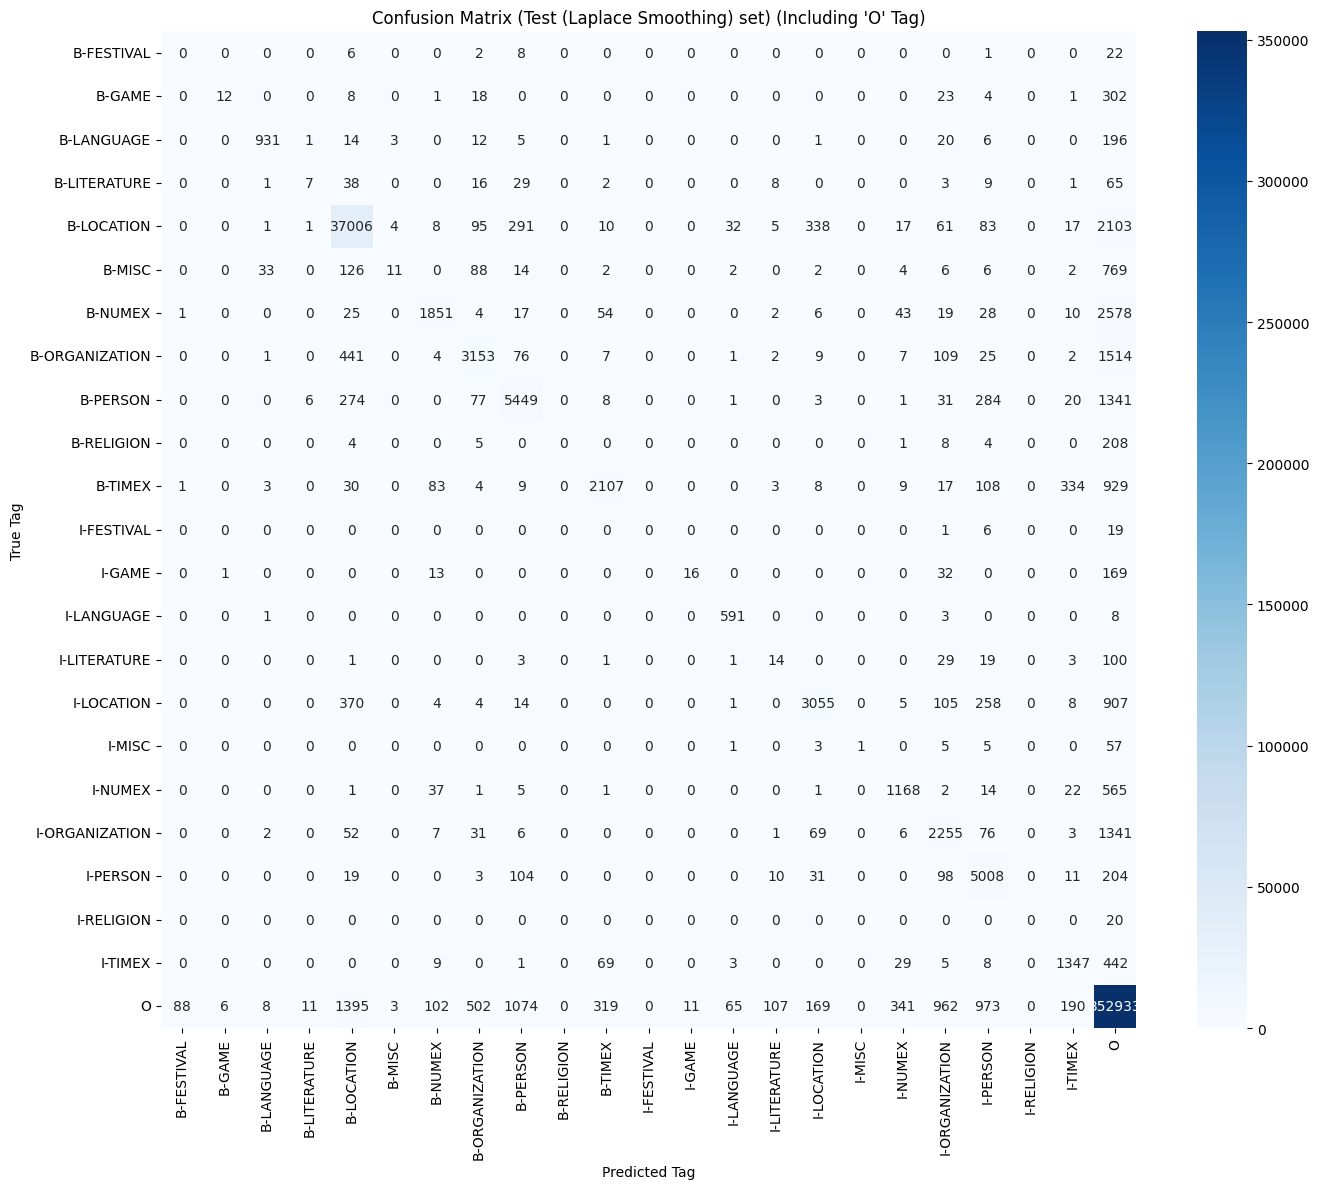

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

def evaluate_model_sklearn(corpus, initial_prob, transition_prob, emission_prob, num_tags, id_to_tag_map, split_name, exclude_o_tag=True):
    """
    Evaluates the HMM model using scikit-learn functions, with option to exclude 'O' tag.
    """
    y_true_all = []
    y_pred_all = []

    print(f"\n--- Evaluating on {split_name} set (sklearn, exclude_o_tag={exclude_o_tag}) ---")

    for sentence in corpus:
        word_ids = sentence['words']
        true_tag_ids = sentence['tags']

        predicted_tag_ids = viterbi_decode(word_ids, initial_prob, transition_prob, emission_prob, num_tags)

        y_true_all.extend(true_tag_ids)
        y_pred_all.extend(predicted_tag_ids)

    # Ensure lengths match
    if len(y_true_all) != len(y_pred_all):
        print("Warning: Length of true and predicted tags do not match!")
        min_len = min(len(y_true_all), len(y_pred_all))
        y_true_all = y_true_all[:min_len]
        y_pred_all = y_pred_all[:min_len]


    labels_to_include = list(range(num_tags))
    label_names_to_include = [id_to_tag_map[i] for i in labels_to_include]

    if exclude_o_tag:
        o_tag_id = tag_to_id['O'] # Assuming tag_to_id is globally available
        y_true = [tag for tag in y_true_all if tag != o_tag_id]
        y_pred = [y_pred_all[i] for i, tag in enumerate(y_true_all) if tag != o_tag_id]
        labels_to_include.remove(o_tag_id)
        label_names_to_include.remove('O')
    else:
        y_true = y_true_all
        y_pred = y_pred_all


    # Calculate Accuracy
    # Note: sklearn's accuracy_score on filtered lists will be accuracy on non-O tags only if exclude_o_tag=True
    # If exclude_o_tag=False, it's overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")


    # Generate Classification Report
    # Use zero_division=0 to avoid warnings/errors for classes with no true samples
    with warnings.catch_warnings():
         warnings.simplefilter("ignore") # Ignore potential warnings about zero division if zero_division='warn'
         report = classification_report(y_true, y_pred, labels=labels_to_include, target_names=label_names_to_include, zero_division=0)

    print("\nClassification Report:")
    print(report)

    # Plot Confusion Matrix (using unfiltered data for full matrix)
    # If exclude_o_tag is True, the matrix will still show all tags but metrics are for filtered data
    full_labels = list(range(num_tags))
    full_label_names = [id_to_tag_map[i] for i in full_labels]
    cm = confusion_matrix(y_true_all, y_pred_all, labels=full_labels)

    plt.figure(figsize=(14, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=full_label_names, yticklabels=full_label_names)
    plt.xlabel('Predicted Tag')
    plt.ylabel('True Tag')
    title_suffix = "(Excluding 'O' Tag)" if exclude_o_tag else "(Including 'O' Tag)"
    plt.title(f'Confusion Matrix ({split_name} set) {title_suffix}')
    plt.tight_layout()
    plt.show()


# Assuming train_corpus, val_corpus, test_corpus, initial_prob_laplace,
# transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, tag_to_id are defined

# Evaluate HMM with Laplace smoothing, excluding 'O' tag
evaluate_model_sklearn(train_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Train (Laplace Smoothing)", exclude_o_tag=True)
evaluate_model_sklearn(val_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Validation (Laplace Smoothing)", exclude_o_tag=True)
evaluate_model_sklearn(test_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Test (Laplace Smoothing)", exclude_o_tag=True)

# Evaluate HMM with Laplace smoothing, including 'O' tag
evaluate_model_sklearn(train_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Train (Laplace Smoothing)", exclude_o_tag=False)
evaluate_model_sklearn(val_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Validation (Laplace Smoothing)", exclude_o_tag=False)
evaluate_model_sklearn(test_corpus, initial_prob_laplace, transition_prob_laplace, emission_prob_laplace, num_tags, id_to_tag, "Test (Laplace Smoothing)", exclude_o_tag=False)

#HMM - BAUM WELCH (Implementation - 200 marks)


The Baum-Welch algorithm is considered to be an application of the EM algorithm for use with HMMs. The idea here is that we can start with some sort of prior A and O matrix, possibly a trivial one with completely uniform probabilities, and we have a set of observations from the HMM. We use the forward-backward algorithm to calculate the probabilities of being in each state at each time step, and then we use this estimate of probabilities to make a better estimate of the transition and observation matrices.

for the details you can refer these references


http://elearn.psgcas.ac.in/nptel/courses/video/106101007/lec21.pdf

https://www.cse.iitb.ac.in/~pb/cs344-2014/hmm-manish-march-2014.pdf




# HMM Baum-Welch (EM for HMM Training)

## Quick References
- Jurafsky & Martin, SLP, Chapter 17  
- COS484 L6: Sequence Models, Princeton  
- Baum-Welch Algorithm Tutorial, Columbia  

---

## Introduction to the Expectation-Maximization (EM) Algorithm

The **Expectation-Maximization (EM)** algorithm is a general framework for finding maximum likelihood estimates of parameters in probabilistic models when some variables are unobserved or "hidden".It is especially useful when direct computation of the likelihood function is difficult because the data includes latent variables.

**EM works in two main iterative steps:**

- **E-step (Expectation):** Compute an expectation of the log-likelihood with respect to the current estimate of the distribution for the latent variables.
- **M-step (Maximization):** Maximize this expected log-likelihood to update the parameters.

This process is repeated until convergence. EM guarantees that the likelihood will never decrease with each iteration.

---

## Baum-Welch Algorithm: EM for HMMs

The **Baum-Welch algorithm** is a specific case of the EM algorithm for training **Hidden Markov Models (HMMs)** on observation sequences when the “true” hidden states are unknown (on problem statements that are of unsupervised/ semi-supervised settings).

**Goal:**  
Given observed data sequences(words/events), estimate the optimal HMM parameters [Initial Distribution $(\pi)$, Transition Matrix $(A)$, and Emission Matrix $(O)$ ] to maximize the likelihood of the observed data.

**Why Baum-Welch?**  
In many practical cases (like speech, text, sequence tagging), we only observe the sequence of emitted symbols (e.g., words), not the underlying sequence of states (e.g., POS tags, NER tags). We want the HMM parameters that best explain the observed data.


---

## The Baum-Welch Algorithm: Step-by-Step

### 1. Initialization

Start with an initial guess for all HMM parameters:

- Initial state probabilities $(\pi)$
- Transition probabilities $(A)$
- Emission probabilities $(O)$

These can be random, uniform, or based on some prior knowledge.

### 2. E-step: Expected Sufficient Statistics

Given the current model parameters, run **Forward-Backward** algorithm over all training sequences:

- Forward: $\alpha_t(i)$ — Compute the probability of observing the  partial sequence up to time $t$, ending in state $i$.  
- Backward: $\beta_t(i)$ — Compute the probability of remaining sequence started from state $i$ at time $t$.

From these, compute:

- $\gamma_t(i)$ — expected probability of being in state $i$ at time $t$ given the observed sequence and current parameters.

- $\xi_t(i,j)$ — expected probability of transitioning from state $i$ at $t$ to state $j$ at $t+1$ given the observed sequence and current parameters.

### 3. M-step: Update Model Parameters

Update each HMM parameter to maximize the expected log-likelihood:

* **Initial probabilities $(\pi)$:**

$$ \pi_i = \gamma_0(i) $$ (average probability of starting in state
$i$)

* **Transition matrix $(A)$:**

$$
A_{i,j} = \frac{\sum_{t=0}^{T-2} \xi_t(i,j)}{\sum_{t=0}^{T-2} \gamma_t(i)}
$$

(expected number of transitions from $i$ to $j$ divided by expected number in $i$)

* **Emisssion Matrix $(O)$**:

$$
O_{j,k} = \frac{\sum_{t: o_t = k} \gamma_t(j)}{\sum_{t=0}^{T-1} \gamma_t(j)}
$$
(expected number of times state $j$ emitted symbol $k$, normalized)

### 4. Iterate Until Convergence

Repeat the E-step and M-step until the model parameters converge (i.e., the change in likelihood is below a small threshold, or a max number of iterations is reached), until log-likelihood stabilizes.

---

## Formal Statement of the Problem

Given:

- $N$: Number of hidden states (tags)

- $M$: Number of observable symbols (words)
- $O = (o_1, o_2, ..., o_T)$: Observed sequence  

Estimate HMM parameters $\lambda = (\pi, A, B)$ to maximize:

$$
P(O | \lambda)
$$

Where:

- $\pi_i$: Prob. of starting in state $i$  
- $A_{i,j}$: Prob. of transitioning $i \rightarrow j$  
- $B_{j,k}$: Prob. of emitting symbol $k$ in state $j$


---

## EM (Baum-Welch) Algorithm Details

### 1. Initialization

Start with random or heuristic values for $\pi, A, B$.

### 2. E-step: Forward-Backward Algorithm

**Forward**

- Base: $\alpha_1(i) = \pi_i B_{i,o_1}$
- Recursive:  
$$
\alpha_{t+1}(j) = \left[ \sum_{i=1}^{N} \alpha_t(i) A_{i,j} \right] B_{j,o_{t+1}}
$$

**Backward**

- Base: $\beta_T(i) = 1$
- Recursive:  
$$
\beta_t(i) = \sum_{j=1}^{N} A_{i,j} B_{j,o_{t+1}} \beta_{t+1}(j)
$$

**Posterior Probabilities**

$$
\gamma_t(i) = \frac{\alpha_t(i) \beta_t(i)}{\sum_{k=1}^{N} \alpha_T(k)}
$$

$$
\xi_t(i,j) = \frac{\alpha_t(i) A_{i,j} B_{j,o_{t+1}} \beta_{t+1}(j)}{\sum_{k=1}^{N} \alpha_T(k)}
$$

### 3. M-step: Re-estimate Parameters

$$
\pi_i^{new} = \gamma_1(i)
$$

$$
A_{i,j}^{new} = \frac{\sum_{t=1}^{T-1} \xi_t(i,j)}{\sum_{t=1}^{T-1} \gamma_t(i)}
$$

$$
B_{j,k}^{new} = \frac{\sum_{t: o_t = k} \gamma_t(j)}{\sum_{t=1}^{T} \gamma_t(j)}
$$

### 4. Convergence

Repeat E/M steps until:

$$
\log P(O | \lambda) = \log \left( \sum_{i=1}^{N} \alpha_T(i) \right)
$$


Key Quantities:

- $\pi_i$: Prob. of starting in state $i$  
- $A_{i,j}$: Prob. of transitioning $i \rightarrow j$  
- $B_{j,k}$: Prob. of emitting symbol $k$ in state $j$

- $\alpha_t(i)$: Prob. of observing initial segment and being in state $i$ at time $t$

- $\beta_t(i)$: Prob. of observing remaining sequence given state $i$ at time $t$

- $\gamma_t(i)$: Posterior prob. of being in state $i$ at time $t$

- $\xi_t(i,j)$: Posterior prob. of transitioning $i \rightarrow j$ at $t \rightarrow t+1$

---

## Implementation Steps

**Implement:** `baum_welch()` function.

**Task 1. Initialization**:
- Initialize $\pi$, $A$, $O$ randomly or heuristically

**Task 2: Expectation Step (E-step)**
- For each training sequence:

  - Compute forward ($\alpha$) and backward ($\beta$) probabilities

  - Compute $\gamma$ and $\xi$ for each time step

**Task 3: Maximization Step (M-step)**

- Update:

  - $\pi$ using $\gamma$

  - $A$ using $\xi$ and $\gamma$

  - $O$ using $\gamma$ and observed emissions

**Task 4: Convergence Check**

- Compare log-likelihood between iterations

- Stop if improvement is below threshold or max_iters reached


In [ ]:
import numpy as np
from collections import defaultdict, Counter

def initialize_hmm_parameters(train_data):
    """
    Initialize HMM parameters (π, A, B) from training data.

    Args:
        train_data: List of sentences, where each sentence is a list of (token, tag) tuples.

    Returns:
        pi: Initial state probabilities (N,)
        A: Transition matrix (N, N)
        B: Emission matrix (N, V)
        tag2idx: Tag to index mapping
        word2idx: Word to index mapping
    """
    # Create word and tag mappings first from the original train_data
    word_to_id, id_to_word, tag_to_id, id_to_tag = create_mappings(train_data) # Using train_data


    N = len(tag_to_id) # Number of states (tags)
    V = len(word_to_id) # Vocabulary size

    # Initialize parameters randomly
    # Small random values to break symmetry, then normalize
    pi = np.random.rand(N)
    pi = pi / np.sum(pi) # Normalize initial probabilities

    A = np.random.rand(N, N)
    A = A / np.sum(A, axis=1, keepdims=True) # Normalize transition probabilities

    B = np.random.rand(N, V)
    B = B / np.sum(B, axis=1, keepdims=True) # Normalize emission probabilities


    print(f"State count N={N}, Vocab size V={V}")
    print("Initialized π, A, B shapes:", pi.shape, A.shape, B.shape)

    return pi, A, B, tag_to_id, word_to_id # Return mappings as well

# Assuming train_data from previous steps is available
# train_data is a list of sentences, each being a list of (token, tag) tuples.
# Pass train_data directly to initialize_hmm_parameters
pi, A, B, tag_to_id, word_to_id = initialize_hmm_parameters(train_data)


# Define num_tags and num_words globally for later use if needed
num_tags = len(tag_to_id)
num_words = len(word_to_id)

#train_sents = [[word for word, tag in sentence] for sentence in train_data] # These are no longer needed
#train_tags = [[tag for word, tag in sentence] for sentence in train_data] # These are no longer needed

State count N=23, Vocab size V=76546
Initialized π, A, B shapes: (23,) (23, 23) (23, 76546)


TODO: Initialize alpha matrix and scales array

In [ ]:
def forward_scaled(obs_seq, pi, A, B):
    """
    Forward algorithm with scaling to prevent numerical underflow.

    Args:
        obs_seq: Sequence of observation indices
        pi: Initial state probabilities (N,)
        A: Transition matrix (N, N)
        B: Emission matrix (N, V)

    Returns:
        alpha: Scaled forward probabilities (T, N)
        scales: Scaling factors (T,)
        log_prob: Log probability of the sequence
    """
    T = len(obs_seq)
    N = len(pi)
    alpha = np.zeros((T, N))
    scales = np.zeros(T)

    # Initialization
    first_word_id = obs_seq[0]
    # Handle unknown words during decoding
    if first_word_id >= B.shape[1]:
        first_word_emission = 1e-9 # Assign a small probability for unknown words
    else:
        first_word_emission = B[:, first_word_id]

    alpha[0, :] = pi * first_word_emission
    scales[0] = 1.0 / np.sum(alpha[0, :])
    alpha[0, :] *= scales[0]

    # Recursion
    for t in range(1, T):
        current_word_id = obs_seq[t]
        if current_word_id >= B.shape[1]:
             current_word_emission = 1e-9 # Assign a small probability for unknown words
        else:
            current_word_emission = B[:, current_word_id]

        for j in range(N): # current tag
             alpha[t, j] = np.sum(alpha[t-1, :] * A[:, j]) * current_word_emission[j]

        # Scaling
        scales[t] = 1.0 / np.sum(alpha[t, :])
        alpha[t, :] *= scales[t]

    # Log probability of the sequence
    log_prob = -np.sum(np.log(scales))

    return alpha, scales, log_prob


def backward_scaled(obs_seq, A, B, scales):
    """
    Backward algorithm using scaling factors from forward pass.

    Args:
        obs_seq: Sequence of observation indices
        A: Transition matrix (N, N)
        B: Emission matrix (N, V)
        scales: Scaling factors from forward algorithm (T,)

    Returns:
        beta: Scaled backward probabilities (T, N)
    """
    T = len(obs_seq)
    N = A.shape[0]
    beta = np.zeros((T, N))

    # Initialization
    beta[T-1, :] = 1.0 * scales[T-1]

    # Recursion
    for t in range(T - 2, -1, -1):
        next_word_id = obs_seq[t+1]
        if next_word_id >= B.shape[1]:
            next_word_emission = 1e-9 # Assign a small probability for unknown words
        else:
            next_word_emission = B[:, next_word_id]

        for i in range(N): # current tag
            beta[t, i] = np.sum(A[i, :] * next_word_emission * beta[t+1, :]) * scales[t]


    return beta

In [ ]:
def baum_welch(train_corpus, pi, A, B, max_iter=10, tol=1e-4):
    """
    Implement the Baum-Welch algorithm for HMM parameter estimation.

    Args:
        train_corpus: List of training sentences, where each sentence is a dict
                      with keys 'words' and 'tags'.
        pi: Initial state probabilities (N,)
        A: Transition probabilities (N, N)
        B: Emission probabilities (N, V)
        max_iter: Maximum iterations
        tol: Convergence tolerance

    Returns:
        Updated pi, A, B parameters
    """
    N = pi.shape[0] # Number of states
    V = B.shape[1] # Vocabulary size

    log_likelihood = -np.inf
    for iteration in range(max_iter):
        # E-step: Compute expected counts (gamma and xi)

        # Initialize expected counts (summed over all sequences)
        expected_initial_counts = np.zeros(N)
        expected_transition_counts = np.zeros((N, N))
        expected_emission_counts = np.zeros((N, V))
        total_log_likelihood = 0 # Sum of log likelihoods for all sequences

        for sentence in train_corpus:
            obs_seq = sentence['words']
            T = len(obs_seq)
            if T == 0:
                continue

            # Compute scaled alpha and beta
            alpha, scales, sentence_log_prob = forward_scaled(obs_seq, pi, A, B)
            beta = backward_scaled(obs_seq, A, B, scales)

            total_log_likelihood += sentence_log_prob

            # Compute gamma (expected probability of being in state i at time t)
            # gamma_t(i) = (alpha_t(i) * beta_t(i)) / sum_k(alpha_T(k))
            # Using scaled alpha and beta: gamma_t(i) = (alpha_t_scaled(i) * beta_t_scaled(i)) / scale_t
            gamma = (alpha * beta) # No need to divide by scale_t because beta was scaled by scale_t

            # Compute xi (expected probability of transitioning from state i to j at time t)
            # xi_t(i, j) = (alpha_t(i) * A_ij * B_j_ot+1 * beta_t+1(j)) / sum_all(alpha_T(k))
            # Using scaled alpha and beta: xi_t(i, j) = alpha_t_scaled(i) * A_ij * B_j_ot+1 * beta_t+1_scaled(j) * scale_t+1
            xi = np.zeros((T - 1, N, N))
            for t in range(T - 1):
                current_word_id = obs_seq[t+1]
                if current_word_id >= B.shape[1]:
                    current_word_emission = 1e-9 # Handle unknown words
                else:
                    current_word_emission = B[:, current_word_id]

                denominator = np.sum(gamma[t, :]) # sum over all states at time t
                if denominator == 0: # Avoid division by zero
                    continue

                for i in range(N):
                    for j in range(N):
                         xi[t, i, j] = (alpha[t, i] * A[i, j] * current_word_emission[j] * beta[t+1, j]) / scales[t+1] # Corrected scaling


            # Accumulate expected counts over all sequences
            expected_initial_counts += gamma[0, :]
            expected_transition_counts += np.sum(xi, axis=0)

            for t in range(T):
                current_word_id = obs_seq[t]
                if current_word_id < V: # Only count if word is in vocabulary
                    expected_emission_counts[:, current_word_id] += gamma[t, :]


        # M-step: Re-estimate parameters

        # Re-estimate pi
        pi_new = expected_initial_counts / np.sum(expected_initial_counts) if np.sum(expected_initial_counts) > 0 else pi

        # Re-estimate A
        transition_denominator = np.sum(expected_transition_counts, axis=1, keepdims=True)
        A_new = expected_transition_counts / (transition_denominator + 1e-9) # Add epsilon for stability


        # Re-estimate B
        emission_denominator = np.sum(expected_emission_counts, axis=1, keepdims=True)
        B_new = expected_emission_counts / (emission_denominator + 1e-9) # Add epsilon for stability


        # Check for convergence
        current_log_likelihood = total_log_likelihood
        print(f"Iteration {iteration+1}: Log Likelihood = {current_log_likelihood:.4f}")

        if iteration > 0 and abs(current_log_likelihood - log_likelihood) < tol:
            print("Baum-Welch converged.")
            break

        log_likelihood = current_log_likelihood
        pi, A, B = pi_new, A_new, B_new

    print("Baum-Welch training finished.")
    return pi, A, B

---

## Critical Thinking (10 marks)
Since Baum-Welch is unsupervised, it often collapses to trivial solutions (e.g., predicting mostly “O”). Accuracy and F1 may remain poor even as log-likelihood improves.

**Can you think of any ideas to get better results?**


 Ideas to get better results from unsupervised Baum Welch:

 1. Seed Initialization with Supervised Data: Instead of random initialization,
    use a small amount of labeled data to compute initial pi, A, and B.
    This can guide the EM algorithm towards a better local optimum.

 2. Constraint based EM: Introduce constraints based on linguistic knowledge
    or external resources (like dictionaries/gazetteers) during the M-step
    to prevent the model from assigning high probabilities to unlikely
    word tag or tag transition combinations.


 3. Regularization: Add regularization terms to the log-likelihood objective
    during the M-step to penalize overly complex models or extreme probabilities.



#NER USING CRF(CONDITIONAL RANDOM FIELD)

#### ***Why CRF for NER? — Let understand it with a small story  with the help of main character Chaitanya, TA of this course!!***

#### 1) Chaitanya starts with HMM (for NER)

Chaitanya wants to build a Named Entity Recognizer (NER).  
First, he tries **Hidden Markov Model (HMM).**

**Good parts of HMM:**
- Can learn **unsupervised** from raw text (using algorithms like Baum-Welch).  
- Handles variable-length sentences.  
- Can decode fast using the **Viterbi algorithm**.

**Problems he notices:**
- HMM is a **generative model**. It assumes tags generate words independently.  
  → This makes it hard to add **overlapping or arbitrary features**.  
- It mostly looks at **current word + previous tag**, not the full context.  
- It models the **joint probability** $P(X, Y)$ (words + tags together).  
  → But in NER, what we really want is $P(Y \mid X)$ (tags given the words).  
- Because of its independence assumptions, it cannot use rich features like:
  - Capitalization (*Delhi* vs *delhi*)  
  - Prefixes/suffixes (*-pur*, *-nagar*)  
  - Gazetteers (lists of names, places, etc.)

**Chaitanya’s thought:**  
*"NER needs context. HMM feels too blind and restricted."*

 Note: In **supervised settings**, HMM parameters can be learned by counting.  
But its real strength is in **unsupervised learning**, unlike MEMM/CRF.

#### 2) Chaitanya tries MEMM (for NER)

After struggling with HMM, Chaitanya thinks:  
*"What if I could use more information about the words, not just fixed probabilities?"*  
That’s when he discovers **Maximum Entropy Markov Model (MEMM).**

**What is MEMM?**
- Imagine HMM is a person who only checks the **previous tag + current word** before guessing the next tag.  
- MEMM is a smarter person who says:  
  *“Why not use more clues? Like capitalization, suffixes, and surrounding words.”*  
- MEMM is a **discriminative model**.  
- It replaces HMM’s fixed probabilities with a **maximum entropy classifier** (like logistic regression).  
- This classifier predicts the next tag using **features of the current word and its context**.

**Why MEMM felt better:**
- With MEMM, Chaitanya could finally use rich signals:
  - If a word starts with a capital → maybe a **PERSON**.  
  - If a word ends with “-pur” → maybe a **LOCATION**.  
  - If the word before is *Mr.* → next word likely a **PERSON**.  
- MEMM directly models $P(Y \mid X)$, not $P(X, Y)$.  
- Training is efficient — each local classifier is trained independently.  

**Chaitanya felt relieved:**  
*"Finally! My NER system can use context and features, not just blind probabilities."*

#### 3) But MEMM has a hidden problem — Label Bias

Chaitanya was happy with MEMM… until he saw a big issue: **label bias.**

**What is Label Bias?**
- Suppose MEMM is tagging: *"Robbin flies to the bank."*  
  - *flies* can be verb or noun.  
  - *bank* can be a riverbank or financial bank.  
- Imagine the tag **VERB** has many possible next tags (high entropy).  
- The tag **NOUN** has fewer next tags (low entropy).  
- In MEMM, probabilities are **normalized locally at each state**.  
  - Fewer transitions → higher chance by default.  
  - More transitions → probability spread out.  
- So MEMM gets biased toward **states with fewer options**, even if features say otherwise.  

**In short:**  
MEMM is greedy at each step. It can’t use **future context** to fix wrong choices.  

**Chaitanya’s frustration:**  
*"Oh no… MEMM uses features, but it still makes biased local decisions!"*

 This problem is well known — called **label bias** in the original CRF paper (Lafferty et al., 2001).


#### 4) Chaitanya finally finds CRF

Then Chaitanya discovers **Conditional Random Fields (CRF).**
But for that let see what is CRF


# Conditional Random Fields (CRFs)

## Setup & Notation

We work with an observed sequence and a state/label sequence:

$$
\mathbf{x} = (x_1, \dots, x_m)
$$

$$
\mathbf{s} = (s_1, \dots, s_m), \quad s_j \in \mathcal{S}
$$

$$
\mathcal{S}^m = \text{set of all length-}m\text{ state sequences}
$$

We model the conditional distribution:

$$
p(\mathbf{s}\mid \mathbf{x})
$$


## Global Feature Vector and the Log-Linear CRF

Define a global feature vector:

$$
\Phi(\mathbf{x},\mathbf{s}) \in \mathbb{R}^d
$$

The conditional distribution is:

$$
p(\mathbf{s}\mid \mathbf{x};\mathbf{w})
=
\frac{\exp\!\big(\mathbf{w}^\top \Phi(\mathbf{x},\mathbf{s})\big)}
{\sum_{\mathbf{s'}\in \mathcal{S}^m} \exp\!\big(\mathbf{w}^\top \Phi(\mathbf{x},\mathbf{s'})\big)}
$$


## Local-to-Global Feature Decomposition

Assume features decompose along adjacent transitions(**“Adjacent transitions” simply means the pairs of neighboring states $(s_{j-1}, s_j)$ along the sequence.**)
:

$$
\Phi(\mathbf{x},\mathbf{s})
=
\sum_{j=1}^{m} \phi\!\big(x_j, s_{j-1}, s_j\big)
$$

For each coordinate:

$$
\Phi_k(\mathbf{x},\mathbf{s})
=
\sum_{j=1}^{m} \phi_k\!\big(x_j, s_{j-1}, s_j\big)
$$



## Decoding (Most Likely Sequence)

Goal:

$$
\arg\max_{\mathbf{s}\in \mathcal{S}^m} p(\mathbf{s}\mid \mathbf{x};\mathbf{w})
=
\arg\max_{\mathbf{s}\in \mathcal{S}^m} \mathbf{w}^\top \Phi(\mathbf{x},\mathbf{s})
=
\arg\max_{\mathbf{s}\in \mathcal{S}^m}
\sum_{j=1}^{m} \mathbf{w}^\top \phi\!\big(x_j, s_{j-1}, s_j\big)
$$

Define the transition score:

$$
\text{score}\!\left(s_{j-1}\!\to s_j; x_j\right)
=
\mathbf{w}^\top \phi\!\big(x_j, s_{j-1}, s_j\big)
$$

### Viterbi-Style Dynamic Program $(O(m|\mathcal{S}|^2))$

Initialization (with special start state $ s_0 $ described in text):

$$
V[1,s] = \mathbf{w}^\top \phi(x_1, s_0, s)
$$

Recurrence (for $ j=2,\dots,m $):

$$
V[j,s] = \max_{a\in \mathcal{S}}\Big( V[j-1,a] + \mathbf{w}^\top \phi(x_j, a, s) \Big)
$$

Termination:

$$
\max_{\mathbf{s}\in\mathcal{S}^m}
\sum_{j=1}^{m} \mathbf{w}^\top \phi(x_j, s_{j-1}, s_j)
=
\max_{s\in\mathcal{S}} V[m,s]
$$

(Use backpointers to reconstruct the best sequence.)



## Parameter Estimation (Training)

Regularized conditional log-likelihood over labeled pairs $ (\mathbf{x}^{(i)}, \mathbf{s}^{(i)}) $, $ i=1,\dots,n $:

$$
\mathcal{L}(\mathbf{w})
=
\sum_{i=1}^{n}
\log p\!\big(\mathbf{s}^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{w}\big)
-
\frac{\lambda}{2}\,\lVert \mathbf{w}\rVert_2^2
$$

Estimator:

$$
\hat{\mathbf{w}}
=
\arg\max_{\mathbf{w}\in\mathbb{R}^d} \mathcal{L}(\mathbf{w})
$$

### Gradient (Empirical − Expected Counts − L2)

$$
\frac{\partial \mathcal{L}}{\partial w_k}
=
\sum_{i=1}^{n}\Phi_k\!\big(\mathbf{x}^{(i)}, \mathbf{s}^{(i)}\big)
-
\sum_{i=1}^{n}\sum_{\mathbf{s}\in\mathcal{S}^m}
p(\mathbf{s}\mid \mathbf{x}^{(i)}; \mathbf{w})\,
\Phi_k\!\big(\mathbf{x}^{(i)}, \mathbf{s}\big)
-
\lambda w_k
$$

Using the local decomposition:

$$
\sum_{\mathbf{s}}
p(\mathbf{s}\mid \mathbf{x};\mathbf{w})\,
\Phi_k(\mathbf{x},\mathbf{s})
=
\sum_{j=1}^{m}\sum_{a\in\mathcal{S}}\sum_{b\in\mathcal{S}}
q_j(a,b)\,\phi_k(x_j,a,b)
$$

Edge marginal definition:

$$
q_j(a,b)
=
\Pr\!\big(s_{j-1}=a,\, s_{j}=b \mid \mathbf{x}; \mathbf{w}\big)
$$


## Forward–Backward for Edge Marginals

Local potentials:

$$
\psi_j(a,b)
=
\exp\!\big(\mathbf{w}^\top \phi(x_j,a,b)\big)
$$

Forward messages:

$$
\alpha_1(b) = \psi_1(s_0,b)
$$

$$
\alpha_j(b) = \sum_{a\in\mathcal{S}} \alpha_{j-1}(a)\,\psi_j(a,b)
$$

Backward messages:

$$
\beta_m(b) = 1
$$

$$
\beta_{j-1}(a) = \sum_{b\in\mathcal{S}} \psi_j(a,b)\,\beta_j(b)
$$

Partition function:

$$
Z(\mathbf{x}) = \sum_{s\in\mathcal{S}} \alpha_m(s)
$$

Edge marginals:

$$
q_j(a,b)
=
\frac{\alpha_{j-1}(a)\,\psi_j(a,b)\,\beta_j(b)}
{Z(\mathbf{x})}
$$



## Complexity

Decoding (Viterbi):

$$
O(m\,|\mathcal{S}|^2)
$$

Forward–Backward expectations:

$$
O(m\,|\mathcal{S}|^2)
$$

Linear-chain CRFs are efficient thanks to dynamic programming over the chain.

### Additional resources
An Introduction to Conditional
Random Fields  https://homepages.inf.ed.ac.uk/csutton/publications/crftut-fnt.pdf

Named Entity Recognition(NER) using Conditional Random Fields (CRFs)in NLP
https://medium.com/data-science-in-your-pocket/named-entity-recognition-ner-using-conditional-random-fields-in-nlp-3660df22e95c

###So now lets continue Chaitanya story...
# Why CRF solved his problems:
- CRF is like MEMM but **globally normalized**.  
- It still models $P(Y \mid X)$ (discriminative).  
- But instead of local decisions, CRF looks at the **whole sequence**.  
- It scores features and transitions **globally** and normalizes across all possible tag sequences.  
- This removes the **label bias problem**.

 In **linear-chain CRF** (used for NER), training uses methods like gradient descent  
It’s heavier than MEMM but gives better results.

### Benefits for NER:
- Like MEMM, CRF allows rich features.  
- But CRF makes decisions using the **whole sentence**.  
- Example: *Delhi* will correctly be tagged as a **LOCATION**, even if local bias wanted to mark it as “O”.  
- In modern NER, CRF is often combined with deep models (e.g., BiLSTM-CRF) for even higher accuracy.

**Chaitanya’s final happiness:**  
*"Yes! CRF gives me MEMM’s power but without bias.  
Now my NER system finally sees the full picture."*

## Quick Comparison Table

| Model | Type | Probability Modeled | Features | Key Issue | Training | NER Suitability |
|-------|------|----------------------|----------|-----------|----------|-----------------|
| HMM   | Generative | $P(X, Y)$ (joint) | Limited (word-tag probs) | Strict independence, hard to add features | EM (unsupervised) or counting (supervised) | Basic; fast but low accuracy |
| MEMM  | Discriminative | $P(Y \mid X)$ (local) | Rich (capitalization, context, etc.) | Label bias from local normalization | Independent local classifiers | Better than HMM; efficient but biased |
| CRF   | Discriminative | $P(Y \mid X)$ (global) | Rich (same as MEMM) | Computationally heavier | Global optimization (e.g., gradient descent) | Best for classical NER; avoids bias, high accuracy |


# NER using CRFs (Implementation - 200 marks)

##  Information Extraction
- Extracts **structured information** from unstructured text.  
- Includes tasks like: **NER, relation extraction, event extraction, template filling, temporal expressions**.  


### Challenges
1. **Segmentation ambiguity** → e.g., *New York* vs *New* + *York*.  
2. **Tag ambiguity** → e.g., *Nirma* (person vs brand).  


## Sequence Labeling
- Assigns a label to each token in a sequence.  
- Used in **POS tagging, parsing, NER**.  
- Approaches: **Rule-based, Linear Chain CRF, MEMMs, Bi-LSTM, etc.**


## Linear Chain Conditional Random Fields (CRFs)
- Tag for current word $y_{i}$ depends on **previous tag** $y_{i-1}$.  
- Similar to logistic regression but for sequences.  

### Feature Functions
- Extract features per token; return **1 (True)** or **0 (False)**.  



#### Class 1: NERDataset

Purpose: Handles all data preparation and batching.

**Responsibilities**:

* Store and manage the dataset splits (train/val/test).
* Convert words/tags into their corresponding IDs using vocab (word_to_id, tag_to_id).
* Provide PyTorch DataLoader support with batching and padding for variable-length sequences.

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from collections import defaultdict, Counter
import os

# Assume load_conll_file, create_mappings, prepare_corpus are defined in previous cells

class NERDataset(Dataset):
    """
    Custom Dataset class for NER data.
    Handles conversion to IDs and provides data in a format suitable for PyTorch DataLoaders.
    """
    def __init__(self, corpus, word_to_id, tag_to_id):
        """
        Args:
            corpus (list): List of sentences, where each sentence is a dict
                           with keys 'words' (list of word IDs) and 'tags' (list of tag IDs).
            word_to_id (dict): Mapping from word to ID.
            tag_to_id (dict): Mapping from tag to ID.
        """
        self.corpus = corpus
        self.word_to_id = word_to_id
        self.tag_to_id = tag_to_id
        self.unk_id = word_to_id.get("<UNK>", 0) # Ensure UNK ID is available

    def __len__(self):
        """
        Returns the number of sentences in the corpus.
        """
        return len(self.corpus)

    def __getitem__(self, idx):
        """
        Retrieves a single sentence's word IDs and tag IDs.

        Args:
            idx (int): Index of the sentence to retrieve.

        Returns:
            dict: A dictionary containing:
                  'words' (torch.Tensor): Tensor of word IDs for the sentence.
                  'tags' (torch.Tensor): Tensor of tag IDs for the sentence.
        """
        sentence_data = self.corpus[idx]
        word_ids = sentence_data['words']
        tag_ids = sentence_data['tags']

        # Convert lists to torch tensors
        word_ids_tensor = torch.tensor(word_ids, dtype=torch.long)
        tag_ids_tensor = torch.tensor(tag_ids, dtype=torch.long)

        return {'words': word_ids_tensor, 'tags': tag_ids_tensor}


#### Class 2: CRFModel

Purpose: Defines the Neural Network + CRF layer.

Responsibilities:
- Word embedding lookup (nn.Embedding).
- Linear layer that projects embeddings into tag space (emission scores).
- CRF mechanics:
  - Forward algorithm (partition function).
  - Viterbi decoding for prediction.
  - Negative log-likelihood for training loss.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class CRFModel(nn.Module):
    def __init__(self, num_tags: int, vocab_size: int, embedding_dim: int = 128):
        """Initialize embedding, linear layer, and CRF transitions."""
        super().__init__()
        self.num_tags = num_tags
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.hidden2tag = nn.Linear(embedding_dim, num_tags)
        # CRF transition parameters (learnable)
        # transitions[i, j] is the score of transitioning from tag i to tag j
        self.transitions = nn.Parameter(torch.randn(num_tags, num_tags))

    def emissions(self, sentence_ids: torch.Tensor):
        """Compute emission scores from embeddings."""
        # sentence_ids: (batch_size, seq_len)
        # embeddings: (batch_size, seq_len, embedding_dim)
        embeddings = self.embedding(sentence_ids)
        # emission_scores: (batch_size, seq_len, num_tags)
        emission_scores = self.hidden2tag(embeddings)
        return emission_scores


    def neg_log_likelihood(self, sentence_ids: torch.Tensor, tags: torch.Tensor):
        """Compute CRF negative log-likelihood loss."""
        # sentence_ids: (batch_size, seq_len)
        # tags: (batch_size, seq_len) - gold tags
        emissions = self.emissions(sentence_ids)

        # Compute score for the gold tag sequence
        gold_score = self._score_sentence(emissions, tags)

        # Compute the log-partition function (sum of scores over all possible tag sequences)
        log_Z = self._log_partition(emissions)
        return log_Z - gold_score


    @torch.no_grad()
    def decode(self, sentence_ids: torch.Tensor):
        """Predict best tag sequence using Viterbi decoding."""
        # sentence_ids: (batch_size, seq_len)
        # We decode one sentence at a time for simplicity in this implementation
        if sentence_ids.size(0) != 1:
             raise ValueError("Decode method currently supports batch size of 1.")

        emissions = self.emissions(sentence_ids).squeeze(0) # Remove batch dimension
        predicted_tag_ids = self._viterbi(emissions)
        return predicted_tag_ids # List of tag IDs


    def _score_sentence(self, feats: torch.Tensor, tags: torch.Tensor):
        """
        Compute the score of the gold tag sequence for a batch of sentences.

        Args:
            feats (torch.Tensor): Emission scores (batch_size, seq_len, num_tags).
            tags (torch.Tensor): Gold tag IDs (batch_size, seq_len).

        Returns:
            torch.Tensor: Score of the gold sequence (batch_size,).
        """
        batch_size, seq_len, num_tags = feats.shape
        batch_scores = torch.zeros(batch_size, device=feats.device)

        for i in range(batch_size):
            sentence_feats = feats[i] # (seq_len, num_tags)
            sentence_tags = tags[i]   # (seq_len,)
            score = torch.zeros(1, device=feats.device)

            # Score from emissions and transitions
            # Score = sum(emission_t(tag_t)) + sum(transition(tag_t-1 -> tag_t))
            score = sentence_feats[0, sentence_tags[0]] # Emission score for first word/tag

            for t in range(1, seq_len):
                # Add transition score from previous tag to current tag
                score += self.transitions[sentence_tags[t-1], sentence_tags[t]]
                # Add emission score for current word and tag
                score += sentence_feats[t, sentence_tags[t]]

            batch_scores[i] = score

        return batch_scores


    def _log_partition(self, feats: torch.Tensor):
        """
        Compute the log-partition function for a batch of sentences using the Forward algorithm.

        Args:
            feats (torch.Tensor): Emission scores (batch_size, seq_len, num_tags).

        Returns:
            torch.Tensor: Log of the partition function (batch_size,).
        """
        batch_size, seq_len, num_tags = feats.shape
        batch_log_Z = torch.zeros(batch_size, device=feats.device)

        for i in range(batch_size):
            sentence_feats = feats[i] # (seq_len, num_tags)
            # Using log-sum-exp to avoid underflow

            log_alpha = sentence_feats[0] # (num_tags,)


            # Recursion (t=1 to seq_len-1)
            for t in range(1, seq_len):
                log_alpha_expanded = log_alpha.unsqueeze(1)
                transition_scores = log_alpha_expanded + self.transitions
                log_alpha_t = torch.logsumexp(transition_scores, dim=0)
                # Add emission scores for the current word
                log_alpha = log_alpha_t + sentence_feats[t] # (num_tags,)
            batch_log_Z[i] = torch.logsumexp(log_alpha, dim=0)

        return batch_log_Z


    def _viterbi(self, feats: torch.Tensor):
        """
        Viterbi decoding to find the best tag path for a single sentence.

        Args:
            feats (torch.Tensor): Emission scores for a single sentence (seq_len, num_tags).

        Returns:
            list: List of predicted tag IDs.
        """
        seq_len, num_tags = feats.shape

        V = torch.zeros((seq_len, num_tags), device=feats.device)
        B = torch.zeros((seq_len, num_tags), dtype=torch.long, device=feats.device)


        V[0, :] = feats[0, :]


        # Recursion (t=1 to seq_len-1)
        for t in range(1, seq_len):
            # V[t, j] = max_i (V[t-1, i] + transition(i->j) + emission_t(j))

            # Expand V[t-1, :] for broadcasting: (num_tags, 1)
            prev_v_expanded = V[t-1, :].unsqueeze(1)
            transition_scores = prev_v_expanded + self.transitions

            # Find the max score and best previous tag for each current tag j
            max_scores, best_prev_tags = torch.max(transition_scores, dim=0)

            # Add emission scores for the current word
            V[t, :] = max_scores + feats[t, :]

            # Store the best previous tag
            B[t, :] = best_prev_tags


        # Backtracking
        predicted_tags = []
        # Find the last tag in the most probable sequence (max score at the last time step)
        last_tag = torch.argmax(V[seq_len-1, :]).item()
        predicted_tags.append(last_tag)

        # Trace back using the backpointer matrix
        for t in range(seq_len - 1, 0, -1):
            last_tag = B[t, last_tag].item()
            predicted_tags.append(last_tag)

        # Reverse the list to get the tags in the correct order
        predicted_tags.reverse()

        return predicted_tags

#### Class 3: Trainer

Purpose: Handles training and evaluation loop.

Responsibilities:
- Initialize optimizer and manage training epochs.
- Call neg_log_likelihood from CRFModel to compute loss.
- Backpropagation and optimizer step.
- Evaluate on validation/test sets:
  - Decode predictions using CRFModel.viterbi_decode.
  - Convert tag IDs back to tag strings.
  - Print classification metrics (Precision, Recall, F1).

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np


class Trainer:
    def __init__(self, model, device, lr=0.1):
        """Initialize model, device, and optimizer."""
        super().__init__() # Call superclass constructor
        self.model = model
        self.device = device
        self.optimizer = optim.SGD(model.parameters(), lr=lr)
        self.model.to(device) # Move model to the specified device


    def train_model(self, train_dataloader, epochs=5):
        """Run training loop:
           - Compute loss via CRFModel.neg_log_likelihood
           - Backpropagation and optimizer step
           - Print epoch-wise loss"""
        self.model.train() # Set model to training mode
        print("\n--- Starting Training ---")
        for epoch in range(epochs):
            total_loss = 0
            # Use tqdm for a progress bar
            for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
                sentence_ids = batch['words'].to(self.device)
                tag_ids = batch['tags'].to(self.device)

                # Zero the gradients before running the backward pass.
                self.model.zero_grad()

                # Compute the negative log likelihood.
                # loss is a tensor of shape (batch_size,)
                loss = self.model.neg_log_likelihood(sentence_ids, tag_ids)

                # Average the loss over the batch to get a scalar loss
                scalar_loss = torch.mean(loss)

                # Perform the backward pass.
                scalar_loss.backward() # Call backward on the scalar loss

                # Update the parameters.
                self.optimizer.step()

                total_loss += scalar_loss.item() * sentence_ids.size(0) # Accumulate loss weighted by batch size

            # Calculate average loss per sentence
            avg_loss = total_loss / len(train_dataloader.dataset)
            print(f"\nEpoch {epoch+1}/{epochs} finished. Average Loss: {avg_loss:.4f}")
        print("--- Training Finished ---")


    @torch.no_grad() # Disable gradient calculation for evaluation
    def evaluate_model(self, dataloader, id_to_tag_map, split_name):
        """Run evaluation loop:
           - Decode predictions with CRFModel.decode (Viterbi)
           - Collect true/predicted tags
           - Print classification metrics (Precision, Recall, F1)"""
        self.model.eval() # Set model to evaluation mode
        y_true_all = []
        y_pred_all = []

        print(f"\n--- Evaluating on {split_name} set ---")
        # Use tqdm for a progress bar
        for batch in tqdm(dataloader, desc=f"Evaluating {split_name}"):
            sentence_ids = batch['words'].to(self.device)
            tag_ids = batch['tags'].to(self.device)

            # Decode one sentence at a time as CRFModel.decode is implemented for batch_size=1
            # In a real scenario, you would pad and mask for efficient batch decoding
            for i in range(sentence_ids.size(0)):
                 single_sentence_ids = sentence_ids[i].unsqueeze(0) # Add batch dimension back for decode
                 true_tag_ids = tag_ids[i].tolist() # Convert to list for y_true

                 # Assuming padding_value is 0
                 true_tag_ids = [tag for tag in true_tag_ids if tag != 0]


                 predicted_tag_ids = self.model.decode(single_sentence_ids) # Returns a list of tag IDs

                 # Ensure lengths match after removing padding from true tags
                 min_len = min(len(true_tag_ids), len(predicted_tag_ids))
                 y_true_all.extend(true_tag_ids[:min_len])
                 y_pred_all.extend(predicted_tag_ids[:min_len])


        # Assuming get_classification_report is defined and accepts lists of integer IDs
        labels = list(id_to_tag_map.keys()) # Get all possible tag IDs as labels
        valid_labels = [label for label in labels if id_to_tag_map[label] != '<PAD>'] # Assuming a <PAD> token/tag

        report, cm = get_classification_report(y_true_all, y_pred_all, valid_labels)

        print("\nClassification Report:")
        print(report)

        # Plot Confusion Matrix
        plt.figure(figsize=(14, 12))
        # Use label names for the plot axes
        label_names = [id_to_tag_map[i] for i in valid_labels]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
        plt.xlabel('Predicted Tag')
        plt.ylabel('True Tag')
        plt.title(f'Confusion Matrix ({split_name} set)')
        plt.tight_layout()
        plt.show()

        return report, cm

# Need a collate_fn for DataLoader to handle variable sequence lengths
def collate_fn(batch):
    """Pads sequences to the longest sequence in the batch."""
    sentences = [item['words'] for item in batch]
    tags = [item['tags'] for item in batch]

    # Assuming 0 is a safe padding ID and not a valid tag ID
    sentences_padded = torch.nn.utils.rnn.pad_sequence(sentences, batch_first=True, padding_value=0)
    tags_padded = torch.nn.utils.rnn.pad_sequence(tags, batch_first=True, padding_value=0)

    return {'words': sentences_padded, 'tags': tags_padded}


- Load data files → train_file, test_file.
- Parse sentences → load_conll_file(...).
- Create vocab & tag mappings → create_mappings(...).
- Convert sentences into tensors → prepare_corpus(...).
- Initialize model → CRFOnlyNER(...).
- Train → train_model(...).
- Evaluate → evaluate_model(...).

In [ ]:
if __name__ == "__main__":
    # Define file paths (assuming these are defined elsewhere or use the ones from HMM section)
    TRAIN_FILE_PATH = os.path.join("conll_output", "train.conll")
    VAL_FILE_PATH = os.path.join("conll_output", "val.conll")
    TEST_FILE_PATH = os.path.join("conll_output", "test.conll")

    # 1. Load data files
    train_data = load_file(TRAIN_FILE_PATH)
    val_data = load_file(VAL_FILE_PATH)
    test_data = load_file(TEST_FILE_PATH)


    # 2. Create vocab & tag mappings
    word_to_id, id_to_word, tag_to_id, id_to_tag = create_mappings(train_data)
    num_tags = len(tag_to_id)
    vocab_size = len(word_to_id)


    # 3. Convert sentences into tensors (corpus preparation)
    train_corpus = prepare_corpus(train_data, word_to_id, tag_to_id)
    val_corpus = prepare_corpus(val_data, word_to_id, tag_to_id)
    test_corpus = prepare_corpus(test_data, word_to_id, tag_to_id)

    train_corpus = train_corpus[:10000]
    val_corpus = val_corpus[:2000] # Also reduce validation for quick checks
    test_corpus = test_corpus[:2000] # Also reduce test for quick checks

    # 4. Initialize model
    embedding_dim = 128 # Define embedding dimension
    model = CRFModel(num_tags, vocab_size, embedding_dim)

    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    model.to(device)

    # 5. Set up DataLoaders
    # Need NERDataset instances and the collate_fn
    train_dataset = NERDataset(train_corpus, word_to_id, tag_to_id)
    val_dataset = NERDataset(val_corpus, word_to_id, tag_to_id)
    test_dataset = NERDataset(test_corpus, word_to_id, tag_to_id)

    batch_size = 32 # Define batch size
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # 6. Initialize Trainer
    learning_rate = 0.01 # Define learning rate
    trainer = Trainer(model, device, lr=learning_rate)

    # 7. Train the model
    epochs = 5 # Define number of training epochs
    trainer.train_model(train_dataloader, epochs=epochs)

    # 8. Evaluate the model
    print("\n--- CRF Evaluation ---")
    # Evaluate on validation set
    val_report, val_cm = trainer.evaluate_model(val_dataloader, id_to_tag, "Validation")

    # Evaluate on test set
    test_report, test_cm = trainer.evaluate_model(test_dataloader, id_to_tag, "Test")

    print("\nCRF Training and Evaluation Complete.")

Using device: cuda

--- Starting Training ---


Epoch 1/5: 100%|██████████| 313/313 [05:28<00:00,  1.05s/it]



Epoch 1/5 finished. Average Loss: 54.4366


Epoch 2/5: 100%|██████████| 313/313 [05:24<00:00,  1.04s/it]



Epoch 2/5 finished. Average Loss: 17.2197


Epoch 3/5: 100%|██████████| 313/313 [05:22<00:00,  1.03s/it]



Epoch 3/5 finished. Average Loss: 14.4059


Epoch 4/5: 100%|██████████| 313/313 [05:21<00:00,  1.03s/it]



Epoch 4/5 finished. Average Loss: 12.6804


Epoch 5/5: 100%|██████████| 313/313 [06:11<00:00,  1.19s/it]



Epoch 5/5 finished. Average Loss: 11.6891
--- Training Finished ---

--- CRF Evaluation ---

--- Evaluating on Validation set ---


Evaluating Validation: 100%|██████████| 63/63 [00:12<00:00,  5.18it/s]


NameError: name 'get_classification_report' is not defined


--- CRF Evaluation ---

--- Evaluating on Validation set ---


Evaluating Validation: 100%|██████████| 63/63 [00:12<00:00,  4.89it/s]



Classification Report:
              precision    recall  f1-score   support

B-FESTIVAL          0.00   nan    nan         0
B-GAME              0.00    0.00    nan        29
B-LANGUAGE          0.98    0.69      0.81        94
B-LITERATURE        nan    0.00    nan        11
B-LOCATION          0.76    0.41      0.53      3793
B-MISC              0.37    0.08      0.13        91
B-NUMEX             0.44    0.02      0.03       460
B-ORGANIZATION      0.26    0.06      0.10       480
B-PERSON            0.69    0.05      0.10       703
B-RELIGION          nan    0.00    nan        22
B-TIMEX             0.00    0.00    nan       323
I-FESTIVAL          nan    0.00    nan         6
I-GAME              0.00    0.00    nan        17
I-LANGUAGE          0.91    0.96      0.93        51
I-LITERATURE        nan    0.00    nan        14
I-LOCATION          0.51    0.27      0.35       409
I-MISC              nan    0.00    nan        11
I-NUMEX             0.75    0.03      0.06       195
I

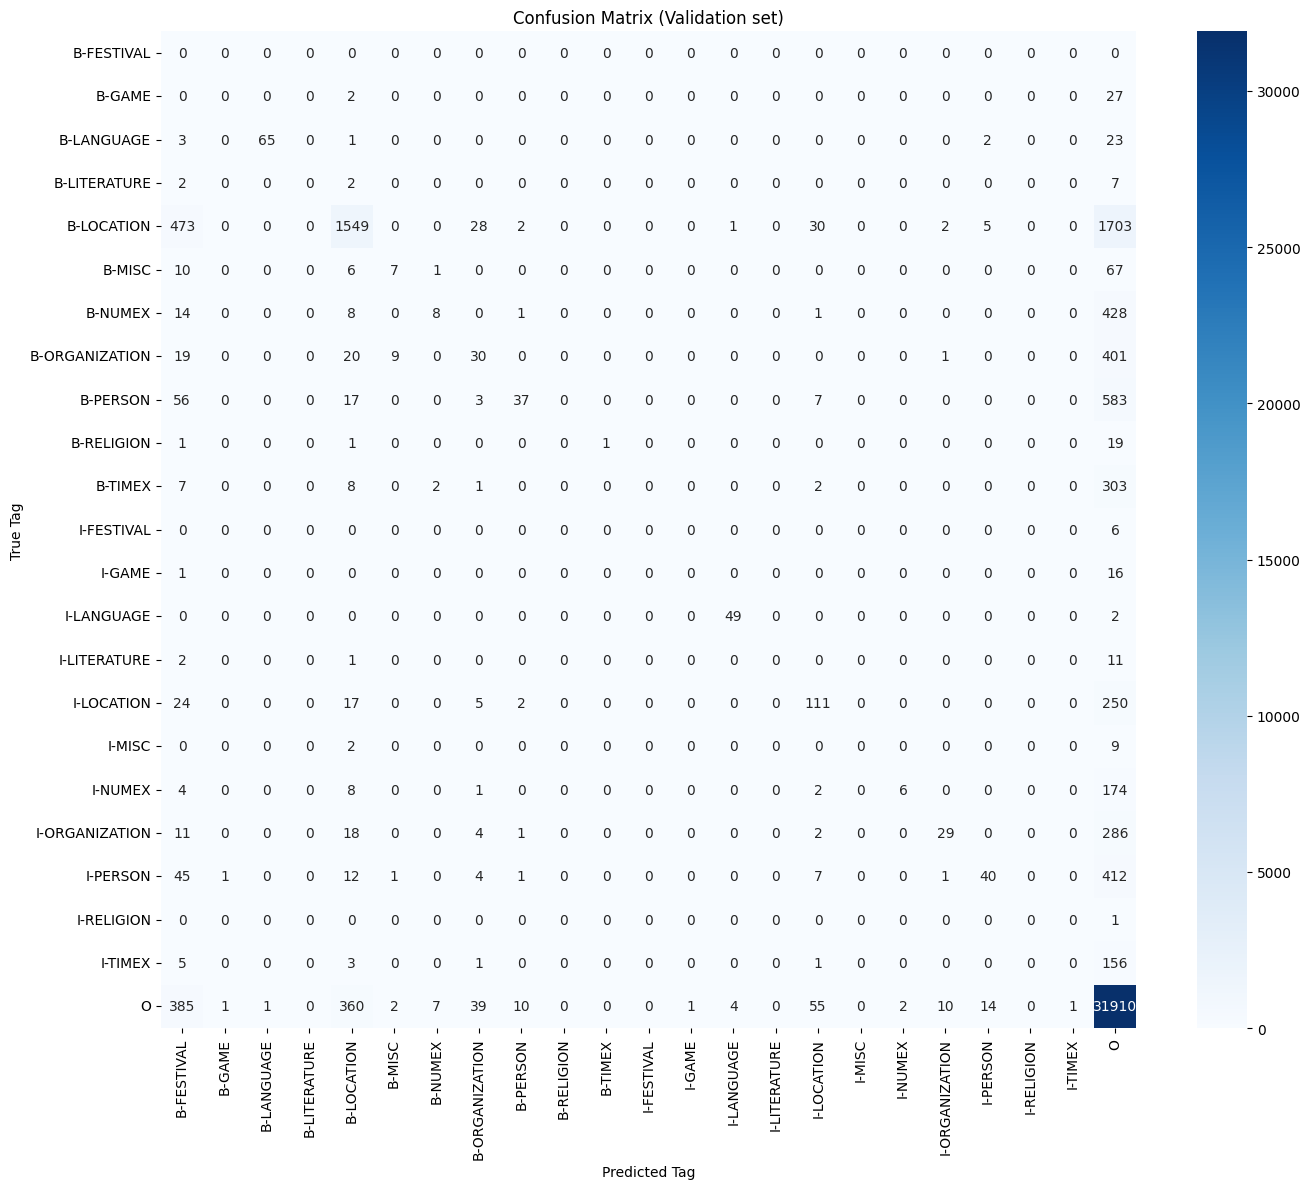


--- Evaluating on Test set ---


Evaluating Test: 100%|██████████| 63/63 [00:11<00:00,  5.44it/s]



Classification Report:
              precision    recall  f1-score   support

B-FESTIVAL          0.00   nan    nan         0
B-GAME              0.00    0.00    nan        36
B-LANGUAGE          0.95    0.73      0.83        97
B-LITERATURE        nan    0.00    nan        18
B-LOCATION          0.75    0.42      0.54      3778
B-MISC              0.33    0.13      0.19        84
B-NUMEX             0.47    0.02      0.04       440
B-ORGANIZATION      0.22    0.05      0.08       508
B-PERSON            0.82    0.05      0.09       671
B-RELIGION          nan    0.00    nan        18
B-TIMEX             0.33    0.01      0.01       299
I-FESTIVAL          nan    0.00    nan         1
I-GAME              nan    0.00    nan        19
I-LANGUAGE          0.95    0.91      0.93        57
I-LITERATURE        nan    0.00    nan        13
I-LOCATION          0.52    0.30      0.38       431
I-MISC              nan    0.00    nan         8
I-NUMEX             0.56    0.02      0.05       211

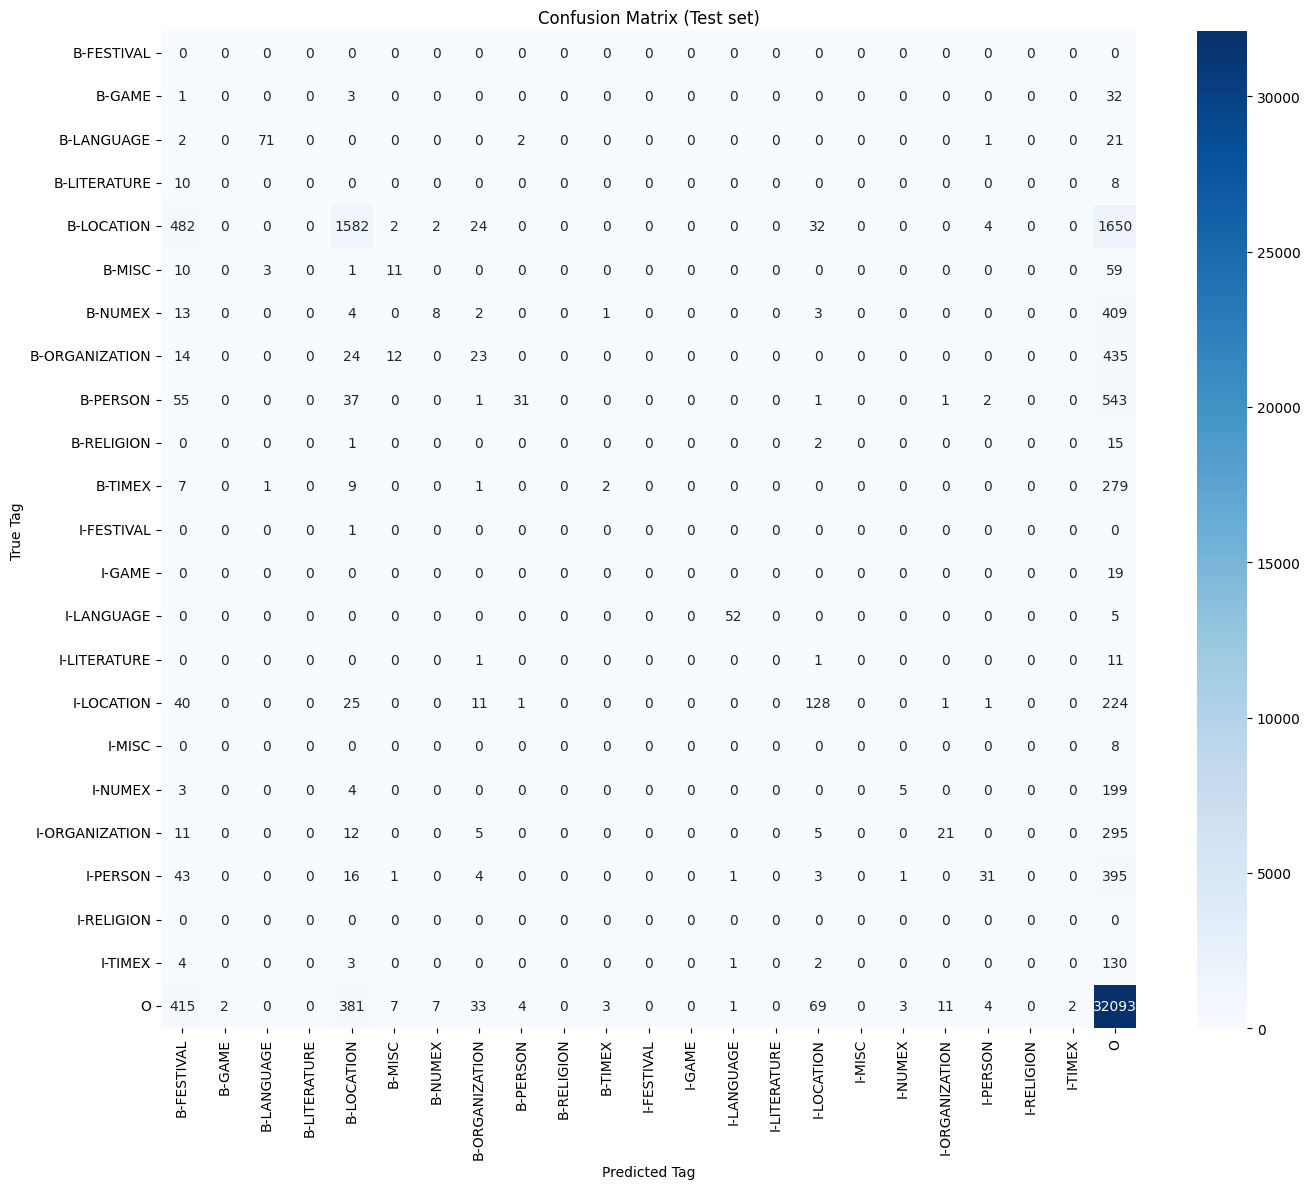


CRF Training and Evaluation Complete.


In [ ]:
# 8. Evaluate the model
print("\n--- CRF Evaluation ---")
# Evaluate on validation set
val_report, val_cm = trainer.evaluate_model(val_dataloader, id_to_tag, "Validation")

# Evaluate on test set
test_report, test_cm = trainer.evaluate_model(test_dataloader, id_to_tag, "Test")

print("\nCRF Training and Evaluation Complete.")

<h1> QUESTION</h1>

###Q1. What is the main difference between a Hidden Markov Model (HMM) and a Conditional Random Field (CRF) in terms of how they model probabilities? (10 marks)

**Answer**

The main difference is that an HMM is a **generative model**, while a CRF is a **discriminative model**.

* **HMM (Generative):** Models the **joint probability** $P(X, Y)$—the probability of the observations $X$ and labels $Y$ occurring together. It learns "how the data is generated" and uses Bayes' theorem to find $P(Y|X)$.
* **CRF (Discriminative):** Models the **conditional probability** $P(Y|X)$ directly. It doesn't care *how* $X$ was generated; it just learns the most likely label sequence $Y$ *given* $X$.

This allows CRFs to be more flexible and avoid the strict independence assumptions HMMs must make.

###Q2.Why are CRFs less prone to the label bias problem compared to Maximum Entropy Markov Models (MEMMs)? (10 marks)

**Answer**
This comes down to **global vs. local normalization**.

* **MEMMs** normalize probabilities at each state (locally). The probability of all outgoing transitions from one state must sum to 1. This creates the **label bias problem**: states with *fewer* outgoing transitions (e.g., a tag that can only be followed by one other tag) "trap" the probability mass. The model is biased towards these high-probability, low-choice transitions, even if observations suggest otherwise.
* **CRFs** use a **single, global normalization** factor called the partition function, $Z(X)$. This is the sum of scores for *all possible tag sequences* for the *entire sentence*. Because normalization happens at the sequence level, not the state level, the model can freely balance weights across the whole sentence, eliminating the label bias problem.

###Q3.In a linear-chain CRF, what are the two main components of the score for a tag sequence? $(5 \times 3 = 15\ marks)$

- (a) Emission scores and transition scores
- (b) Transition scores and loss scores
- (c) Emission scores and gradient scores

**Answer: (a) Emission scores and transition scores**

The total score for a sequence is the sum of:
1.  **Transition scores:** Based on the features of going from one tag $y_{i-1}$ to the next tag $y_i$.
2.  **Emission (or State) scores:** Based on the features of a tag $y_i$ being paired with an observation $x_i$ at that position.


###Q4.Suppose you have a sentence with 5 words and you are tagging with 3 possible labels. (20 marks)
How many possible tag sequences exist for this sentence in a CRF model?

**Answer**

To find the total number of possible sequences, we use the multiplication principle of combinatorics.

For each word in the sequence, there is an independent choice of 3 possible labels.

* **Word 1:** 3 label choices
* **Word 2:** 3 label choices
* **Word 3:** 3 label choices
* **Word 4:** 3 label choices
* **Word 5:** 3 label choices

The total number of unique sequences is the product of the number of choices at each position:

$$3 \times 3 \times 3 \times 3 \times 3 = 3^5$$

**$3^5 = 243$**
There are 243 possible tag sequences.

### Q5.During CRF training, we maximize the conditional log-likelihood. Which two terms are needed to compute this objective?  $(5 \times 3 = 15\ marks)$

- (a) Score of the gold sequence and partition function  
- (b) Only the emission score
- (c) Only the transition score

**Answer**

**Answer: (a) Score of the gold sequence and partition function**

**Explanation:**
The objective of CRF training is to maximize the conditional log-likelihood of the true ("gold") tag sequence $Y$ given the observation sequence $X$.

The conditional probability $P(Y|X)$ is defined as:
$$P(Y|X) = \frac{\exp(\text{Score}(Y, X))}{Z(X)}$$

Where:
* $\text{Score}(Y, X)$ is the score of the specific sequence $Y$.
* $Z(X)$ is the **partition function**, which is the sum of scores of *all possible* sequences: $Z(X) = \sum_{Y'} \exp(\text{Score}(Y', X))$.

To maximize the *log-likelihood*, we take the log of this probability:
$$log P(Y|X) = log(\exp(\text{Score}(Y, X))) - log(Z(X))$$
$$log P(Y|X) = \text{Score}(Y, X) - log(Z(X))$$

Therefore, to compute this objective (and its gradient for training), we must be able to calculate two terms:
1.  The **Score of the gold sequence** ($\text{Score}(Y, X)$)
2.  The **partition function** ($Z(X)$), which is computationally expensive and is the sum of scores for all 243 possible paths in the previous question's example.

# LSTM, BiLSTM, and Multi-layer BiLSTM



## Quick References
1. Hochreiter & Schmidhuber (1997). Long Short-Term Memory. https://www.bioinf.jku.at/publications/older/2604.pdf  
2. Schuster & Paliwal (1997). Bidirectional recurrent neural networks. https://doi.org/10.1109/78.650093  
3. Graves & Schmidhuber (2005). Framewise phoneme classification with BiLSTM. https://doi.org/10.1016/j.neunet.2005.06.042  
4. Goodfellow et al. (2016). Deep Learning (Chapter 10). https://www.deeplearningbook.org/  
5. Olah (2015). Understanding LSTM Networks. https://colah.github.io/posts/2015-08-Understanding-LSTMs/

---


# Introduction and Motivation

## Introduction
Sequential data is at the heart of many real-world applications such as speech recognition, machine translation, sentiment analysis, and named entity recognition (NER). The challenge lies in effectively modeling temporal dependencies and contextual relationships across varying sequence lengths. Over time, different approaches have been proposed to handle sequential data, starting from probabilistic models to deep neural architectures.


## Motivation
Early approaches such as **Hidden Markov Models (HMMs)** provided a probabilistic framework for modeling sequences, where hidden states generate observable sequences. While successful in certain domains, HMMs rely on strong independence assumptions and struggle to capture long-term dependencies. Training with algorithms like **Baum-Welch** often led to challenges with data sparsity and scalability.

To overcome some of these limitations, **Conditional Random Fields (CRFs)** were introduced. Unlike HMMs, CRFs are discriminative models that directly model the conditional probability of label sequences given inputs. They allow the inclusion of richer features and are effective in tasks like part-of-speech tagging and NER. However, CRFs still depend heavily on hand-engineered features and cannot automatically learn hierarchical representations.

The emergence of **Recurrent Neural Networks (RNNs)** shifted the paradigm by enabling models to learn representations directly from raw data. RNNs can, in principle, capture sequential dependencies but suffer from vanishing and exploding gradient problems, which limit their ability to handle long sequences.

**Long Short-Term Memory (LSTM) networks** addressed these issues through gating mechanisms that control information flow, allowing them to retain relevant information over longer contexts. This made LSTMs powerful for a wide range of sequential tasks, from language modeling to speech recognition.

Building on this, **Bidirectional LSTMs (BiLSTMs)** enhanced performance by processing input sequences in both forward and backward directions, thus capturing context from both past and future tokens. Extending this further, **Multi-layer BiLSTMs** stack several layers to learn increasingly abstract and hierarchical representations of sequential data.

In summary, the journey from HMMs and CRFs to LSTMs and their variants demonstrates a clear progression: from **probabilistic models with restrictive assumptions and manual features** to **neural architectures that automatically learn rich, long-range, and hierarchical representations**. This evolution motivates the use of LSTMs, BiLSTMs, and Multi-layer BiLSTMs for modern sequence modeling tasks.


## Task 1: Vanilla LSTM Implementation (25 Marks)

### Conceptual Background
- RNNs suffer from vanishing/exploding gradients, making them ineffective for long-term dependencies.  
- LSTM introduces a cell state ($C_t$) and gates (forget, input, output) to regulate memory flow.  

### Mathematical Formulation
Let input be $x_t$, previous hidden be $h_{t-1}$, previous cell be $C_{t-1}$.

**1. Forget Gate**
$$
f_t = \sigma\big(W_f x_t + U_f h_{t-1} + b_f\big)
$$

**2. Input Gate**
$$
i_t = \sigma\big(W_i x_t + U_i h_{t-1} + b_i\big)
$$

**3. Candidate Cell State**
$$
\tilde{C}_t = \tanh\big(W_c x_t + U_c h_{t-1} + b_c\big)
$$

**4. Cell State Update**
$$
C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
$$

**5. Output Gate**
$$
o_t = \sigma\big(W_o x_t + U_o h_{t-1} + b_o\big)
$$

**6. Hidden State**
$$
h_t = o_t \odot \tanh(C_t)
$$

> Here $\sigma(\cdot)$ is the logistic sigmoid, $\tanh(\cdot)$ is the hyperbolic tangent, and $\odot$ denotes element-wise multiplication.

---

## Task 2: Bidirectional LSTM (BiLSTM) (25 Marks)

### Conceptual Background
- A standard LSTM captures *past* context only.  
- BiLSTM uses two LSTMs:
  - **Forward LSTM** processes $x_1 \to x_T$.
  - **Backward LSTM** processes $x_T \to x_1$.

### Mathematical Formulation

**Forward LSTM**
$$
\overrightarrow{h}_t = \mathrm{LSTM}_{\text{fwd}}(x_t, \overrightarrow{h}_{t-1})
$$

**Backward LSTM**
$$
\overleftarrow{h}_t = \mathrm{LSTM}_{\text{bwd}}(x_t, \overleftarrow{h}_{t+1})
$$

**Combined Hidden State** (concatenation)
$$
h_t = \big[\,\overrightarrow{h}_t \,;\, \overleftarrow{h}_t\,\big]
$$

**Output Sequence**
$$
H = \big(h_1, h_2, \dots, h_T\big)
$$

---

## Task 3: Multi-layer BiLSTM (Stacked BiLSTM) (25 Marks)

### Conceptual Background
- A single BiLSTM layer may not capture hierarchical or deep temporal patterns.  
- Stacking multiple BiLSTM layers allows successive layers to build higher-level representations: lower layers capture local patterns; higher layers capture more abstract, global features.

### Notation
- Let $L$ be the number of stacked BiLSTM layers.
- Superscript $(l)$ denotes the layer index (e.g., first layer $l=1$, final layer $l=L$).
- Subscript $t$ denotes the time step.

### First BiLSTM Layer ($l=1$)
**Forward direction**
$$
\overrightarrow{h}_t^{(1)} = \mathrm{LSTM}_{\text{fwd}}^{(1)}\big(x_t,\; \overrightarrow{h}_{t-1}^{(1)}\big)
$$

**Backward direction**
$$
\overleftarrow{h}_t^{(1)} = \mathrm{LSTM}_{\text{bwd}}^{(1)}\big(x_t,\; \overleftarrow{h}_{t+1}^{(1)}\big)
$$

**Concatenate to form layer-1 representation**
$$
h_t^{(1)} = \big[\,\overrightarrow{h}_t^{(1)} \,;\, \overleftarrow{h}_t^{(1)}\,\big]
$$

### Higher Layers ($l = 2, \dots, L$)

For **layer $l$**, the input at each time step is the concatenated output from layer $l-1$, i.e., $h_t^{(l-1)}$.

**Forward direction**
$$
\overrightarrow{h}_t^{(l)} = \mathrm{LSTM}_{\text{fwd}}^{(l)}\big(h_t^{(l-1)},\; \overrightarrow{h}_{t-1}^{(l)}\big)
$$

**Backward direction**
$$
\overleftarrow{h}_t^{(l)} = \mathrm{LSTM}_{\text{bwd}}^{(l)}\big(h_t^{(l-1)},\; \overleftarrow{h}_{t+1}^{(l)}\big)
$$

**Concatenate to form layer-$l$ representation**
$$
h_t^{(l)} = \big[\,\overrightarrow{h}_t^{(l)} \,;\, \overleftarrow{h}_t^{(l)}\,\big]
$$

### Final Output after $L$ layers
$$
H^{(L)} = \big(h_1^{(L)},\; h_2^{(L)},\; \dots,\; h_T^{(L)}\big)
$$


---

## Task 4: Comparative Evaluation (15 Marks)  
- Evaluate metrics: **precision, recall, F1 (macro & weighted), accuracy**, and **confusion matrix** using the same function which you created above.  
- Discuss trade-offs: **performance vs. computation** (latency, memory).

---



Implement LSTM cell for single step

In [ ]:
class LSTMCell(nn.Module):
    """
    A single LSTM cell that implements the logic for one time step.

    Parameters
    ----------
    input_size : int
        The number of expected features in the input `x`.
    hidden_size : int
        The number of features in the hidden state `h_t`.
    """
    def __init__(self, input_size, hidden_size):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Input gate: combines input x and previous hidden state h_prev
        self.W_i = nn.Linear(input_size, hidden_size, bias=True)
        self.U_i = nn.Linear(hidden_size, hidden_size, bias=False)
        # Forget gate: combines input x and previous hidden state h_prev
        self.W_f = nn.Linear(input_size, hidden_size, bias=True)
        self.U_f = nn.Linear(hidden_size, hidden_size, bias=False)
        # Candidate cell state: combines input x and previous hidden state h_prev
        self.W_c = nn.Linear(input_size, hidden_size, bias=True)
        self.U_c = nn.Linear(hidden_size, hidden_size, bias=False)
        # Output gate: combines input x and previous hidden state h_prev
        self.W_o = nn.Linear(input_size, hidden_size, bias=True)
        self.U_o = nn.Linear(hidden_size, hidden_size, bias=False)


    def forward(self, x, states):
        """
        Forward pass of the LSTM cell.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor at the current time step, shape: (batch_size, input_size).
        states : tuple of (torch.Tensor, torch.Tensor)
            A tuple containing:
            - h_prev: previous hidden state, shape (batch_size, hidden_size)
            - c_prev: previous cell state, shape (batch_size, hidden_size)

        Returns
        -------
        h_next : torch.Tensor
            Next hidden state, shape (batch_size, hidden_size).
        c_next : torch.Tensor
            Next cell state, shape (batch_size, hidden_size).
        """
        h_prev, c_prev = states

        # Forget Gate
        f_t = torch.sigmoid(self.W_f(x) + self.U_f(h_prev))
        # Input Gate
        i_t = torch.sigmoid(self.W_i(x) + self.U_i(h_prev))
        # Candidate Cell State
        c_tilde_t = torch.tanh(self.W_c(x) + self.U_c(h_prev))
        # Cell State Update
        c_next = f_t * c_prev + i_t * c_tilde_t
        # Output Gate
        o_t = torch.sigmoid(self.W_o(x) + self.U_o(h_prev))
        # Hidden State
        h_next = o_t * torch.tanh(c_next)

        return h_next, c_next

Implement full general LSTM layer

In [ ]:
class LSTM(nn.Module):
    """
    A full LSTM layer that uses LSTMCell to process an input sequence.

    Parameters
    ----------
    input_size : int
        The number of expected features in the input `x`.
    hidden_size : int
        The number of features in the hidden state `h_t`.
    bidirectional : bool, optional (default=False)
        If True, becomes a bidirectional LSTM layer.
    """
    def __init__(self, input_size, hidden_size, bidirectional=False):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if bidirectional else 1

        self.lstm_cell_fwd = LSTMCell(input_size, hidden_size)
        if self.bidirectional:
            self.lstm_cell_bwd = LSTMCell(input_size, hidden_size)


    def forward(self, input_seq, states=None):
        """
        Forward pass of the full LSTM layer.

        Parameters
        ----------
        input_seq : torch.Tensor
            Input sequence of shape (batch_size, seq_len, input_size).
        states : tuple of (torch.Tensor, torch.Tensor), optional
            Initial hidden and cell states:
            - h_0: (num_directions, batch_size, hidden_size)
            - c_0: (num_directions, batch_size, hidden_size)
            If None, they will be initialized as zeros.

        Returns
        -------
        output : torch.Tensor
            Output features from the last layer of the LSTM,
            shape (batch_size, seq_len, num_directions * hidden_size).
        (h_n, c_n) : tuple
            Final hidden and cell states for each direction:
            - h_n: (num_directions, batch_size, hidden_size)
            - c_n: (num_directions, batch_size, hidden_size)
        """
        batch_size, seq_len, _ = input_seq.size()

        # Initialize hidden and cell states if not provided
        if states is None:
            h_0 = torch.zeros(self.num_directions, batch_size, self.hidden_size).to(input_seq.device)
            c_0 = torch.zeros(self.num_directions, batch_size, self.hidden_size).to(input_seq.device)
        else:
            h_0, c_0 = states

        # Forward pass
        h_fwd = h_0[0, :, :]
        c_fwd = c_0[0, :, :]
        output_fwd_list = []
        for t in range(seq_len):
            h_fwd, c_fwd = self.lstm_cell_fwd(input_seq[:, t, :], (h_fwd, c_fwd))
            output_fwd_list.append(h_fwd)
        output_fwd = torch.stack(output_fwd_list, dim=1) # (batch_size, seq_len, hidden_size)

        # Backward pass if bidirectional
        if self.bidirectional:
            h_bwd = h_0[1, :, :]
            c_bwd = c_0[1, :, :]
            output_bwd_list = []
            for t in range(seq_len - 1, -1, -1):
                h_bwd, c_bwd = self.lstm_cell_bwd(input_seq[:, t, :], (h_bwd, c_bwd))
                output_bwd_list.append(h_bwd)
            output_bwd_list.reverse() # Reverse to chronological order
            output_bwd = torch.stack(output_bwd_list, dim=1) # (batch_size, seq_len, hidden_size)

            output = torch.cat((output_fwd, output_bwd), dim=2) # (batch_size, seq_len, 2*hidden_size)
            h_n = torch.stack((h_fwd, h_bwd), dim=0)
            c_n = torch.stack((c_fwd, c_bwd), dim=0)
        else:
            output = output_fwd # (batch_size, seq_len, hidden_size)
            h_n = h_fwd.unsqueeze(0)
            c_n = c_fwd.unsqueeze(0)

        return output, (h_n, c_n)

Implement Vanilla LSTM using custom LSTM created above




In [ ]:
class VanillaLSTM(nn.Module):
    """
    A Vanilla LSTM model for Named Entity Recognition (NER).

    Parameters
    ----------
    vocab_size : int
        Size of the vocabulary (number of unique tokens).
    tagset_size : int
        Number of output tags (NER classes).
    embedding_dim : int
        Dimension of the word embeddings.
    hidden_size : int
        Number of features in the hidden state of the LSTM.
    """
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # Use the custom LSTM class, unidirectional
        self.lstm = LSTM(embedding_dim, hidden_size, bidirectional=False)
        self.hidden2tag = nn.Linear(hidden_size, tagset_size)

    def forward(self, sentence):
        """
        Forward pass of the Vanilla LSTM NER model.

        Parameters
        ----------
        sentence : torch.Tensor
            Input sequence of token indices, shape: (batch_size, seq_len).

        Returns
        -------
        tag_scores : torch.Tensor
            Output scores for each tag, shape: (batch_size, seq_len, tagset_size).
        """
        # Get embeddings
        embeds = self.embedding(sentence)  # (batch_size, seq_len, embedding_dim)

        # Pass through the LSTM layer
        # output: (batch_size, seq_len, hidden_size)
        lstm_out, _ = self.lstm(embeds)

        # Project LSTM output to tag scores
        tag_scores = self.hidden2tag(lstm_out)  # (batch_size, seq_len, tagset_size)

        return tag_scores

Implement  BiLSTM using custom LSTM created above


In [ ]:
class BiLSTM(nn.Module):
    """
    A Bi-directional LSTM model for Named Entity Recognition (NER).

    Parameters
    ----------
    vocab_size : int
        Size of the vocabulary (number of unique tokens).
    tagset_size : int
        Number of output tags (NER classes).
    embedding_dim : int
        Dimension of the word embeddings.
    hidden_size : int
        Number of features in the hidden state of each LSTM direction.
    """
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # Use the custom LSTM class, bidirectional
        self.lstm = LSTM(embedding_dim, hidden_size, bidirectional=True)
        # The output of a BiLSTM will be 2 * hidden_size (concatenation of fwd and bwd)
        self.hidden2tag = nn.Linear(2 * hidden_size, tagset_size)

    def forward(self, sentence):
        """
        Forward pass of the BiLSTM NER model.

        Parameters
        ----------
        sentence : torch.Tensor
            Input sequence of token indices, shape: (batch_size, seq_len).

        Returns
        -------
        tag_scores : torch.Tensor
            Output scores for each tag, shape: (batch_size, seq_len, tagset_size).
        """
        # Get embeddings
        embeds = self.embedding(sentence)  # (batch_size, seq_len, embedding_dim)

        # Pass through the BiLSTM layer
        # lstm_out: (batch_size, seq_len, 2 * hidden_size)
        lstm_out, _ = self.lstm(embeds)

        # Project BiLSTM output to tag scores
        tag_scores = self.hidden2tag(lstm_out)  # (batch_size, seq_len, tagset_size)

        return tag_scores

Implement multi layer BiLSTM using custom LSTM created above


In [ ]:
class MultiLayerBiLSTM(nn.Module):
    """
    A multi-layer Bidirectional LSTM built by stacking LSTM layers.

    Parameters
    ----------
    vocab_size : int
        Size of the vocabulary (number of unique tokens).
    tagset_size : int
        Number of output tags (NER classes).
    embedding_dim : int
        Dimension of the word embeddings.
    hidden_size : int
        The number of features in the hidden state `h_t` for each direction.
    num_layers : int
        The number of stacked BiLSTM layers.
    """
    def __init__(self, vocab_size, tagset_size, embedding_dim, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm_layers = nn.ModuleList()
        for i in range(num_layers):
            input_dim = embedding_dim if i == 0 else 2 * hidden_size # Input to first layer is embedding_dim, subsequent layers take 2*hidden_size from previous BiLSTM
            self.lstm_layers.append(LSTM(input_dim, hidden_size, bidirectional=True))

        # The final output layer maps the output of the last BiLSTM to tag scores
        self.hidden2tag = nn.Linear(2 * hidden_size, tagset_size)

    def forward(self, sentence):
        """
        Forward pass of the Multi-layer BiLSTM.

        Parameters
        ----------
        sentence : torch.Tensor
            Input tensor of shape (batch_size, seq_len).

        Returns
        -------
        tag_scores : torch.Tensor
            Output scores for each tag, shape: (batch_size, seq_len, tagset_size).
        """
        # Get embeddings
        embeds = self.embedding(sentence)  # (batch_size, seq_len, embedding_dim)

        # Pass through stacked BiLSTM layers
        lstm_out = embeds
        h_n_all = []
        c_n_all = []

        for i, lstm_layer in enumerate(self.lstm_layers):
            lstm_out, (h_n, c_n) = lstm_layer(lstm_out) # lstm_out: (batch_size, seq_len, 2 * hidden_size)
            h_n_all.append(h_n)
            c_n_all.append(c_n)

        # Project LSTM output to tag scores
        tag_scores = self.hidden2tag(lstm_out)  # (batch_size, seq_len, tagset_size)
        final_h_n = torch.cat(h_n_all, dim=0) # (num_layers * 2, batch_size, hidden_size)
        final_c_n = torch.cat(c_n_all, dim=0) # (num_layers * 2, batch_size, hidden_size)

        return tag_scores

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm # For progress bar
import numpy as np # Assuming numpy is needed for evaluation metrics if not using sklearn


class Trainer:
    def __init__(self, model, device, lr=0.1, is_crf_model=False, criterion=None):
        """Initialize model, device, and optimizer."""
        super().__init__() # Call superclass constructor
        self.model = model
        self.device = device
        self.optimizer = optim.SGD(model.parameters(), lr=lr)
        self.is_crf_model = is_crf_model
        self.criterion = criterion # For non-CRF models
        self.model.to(device) # Move model to the specified device


    def train_model(self, train_dataloader, epochs=5):
        """Run training loop:
           - Compute loss via CRFModel.neg_log_likelihood (if CRF) or criterion (if not CRF)
           - Backpropagation and optimizer step
           - Print epoch-wise loss"""
        self.model.train() # Set model to training mode
        print("\n--- Starting Training ---")
        for epoch in range(epochs):
            total_loss = 0
            # Use tqdm for a progress bar
            for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
                sentence_ids = batch['words'].to(self.device)
                tag_ids = batch['tags'].to(self.device)

                # Zero the gradients before running the backward pass.
                self.model.zero_grad()

                # Compute the loss.
                if self.is_crf_model:
                    loss = self.model.neg_log_likelihood(sentence_ids, tag_ids)
                    scalar_loss = torch.mean(loss) # Assuming neg_log_likelihood returns per-sentence loss
                else:
                    # For non-CRF models, output logits and use criterion
                    logits = self.model(sentence_ids) # (batch_size, seq_len, num_tags)

                    # Reshape for CrossEntropyLoss: (batch_size * seq_len, num_tags)
                    logits = logits.view(-1, logits.shape[-1])
                    # Reshape tags: (batch_size * seq_len,)
                    tags_flat = tag_ids.view(-1)

                    # Filter out padding values from tags and corresponding logits
                    # Assuming padding_value is 0 as per collate_fn
                    non_pad_mask = (tags_flat != 0) # Assuming 0 is padding ID
                    logits_filtered = logits[non_pad_mask]
                    tags_filtered = tags_flat[non_pad_mask]

                    if logits_filtered.numel() > 0: # Ensure there are non-padded elements
                        scalar_loss = self.criterion(logits_filtered, tags_filtered)
                    else:
                        scalar_loss = torch.tensor(0.0, device=self.device) # No valid tags in batch, skip loss

                # Perform the backward pass.
                scalar_loss.backward()

                # Update the parameters.
                self.optimizer.step()

                total_loss += scalar_loss.item() # Accumulate scalar loss

            # Calculate average loss
            avg_loss = total_loss / len(train_dataloader) # Average per batch
            print(f"\nEpoch {epoch+1}/{epochs} finished. Average Loss: {avg_loss:.4f}")
        print("--- Training Finished ---")


    @torch.no_grad() # Disable gradient calculation for evaluation
    def evaluate_model(self, dataloader, id_to_tag_map, split_name):
        """Run evaluation loop:
           - Decode predictions with CRFModel.decode (Viterbi) or argmax for non-CRF
           - Collect true/predicted tags
           - Print classification metrics (Precision, Recall, F1)"""
        self.model.eval() # Set model to evaluation mode
        y_true_all = []
        y_pred_all = []

        print(f"\n--- Evaluating on {split_name} set ---")
        # Use tqdm for a progress bar
        for batch in tqdm(dataloader, desc=f"Evaluating {split_name}"):
            sentence_ids = batch['words'].to(self.device)
            tag_ids = batch['tags'].to(self.device)

            if self.is_crf_model:
                # Decode one sentence at a time as CRFModel.decode is implemented for batch_size=1
                for i in range(sentence_ids.size(0)):
                    single_sentence_ids = sentence_ids[i].unsqueeze(0) # Add batch dimension back for decode
                    true_tag_ids = tag_ids[i].tolist() # Convert to list for y_true

                    # Remove padding from true_tag_ids (assuming padding_value is 0)
                    true_tag_ids = [tag for tag in true_tag_ids if tag != 0]

                    predicted_tag_ids = self.model.decode(single_sentence_ids) # Returns a list of tag IDs

                    # Ensure lengths match after removing padding from true tags
                    min_len = min(len(true_tag_ids), len(predicted_tag_ids))
                    y_true_all.extend(true_tag_ids[:min_len])
                    y_pred_all.extend(predicted_tag_ids[:min_len])

            else:
                # For non-CRF models, use argmax on logits
                logits = self.model(sentence_ids) # (batch_size, seq_len, num_tags)
                predictions = torch.argmax(logits, dim=-1) # (batch_size, seq_len)

                for i in range(sentence_ids.size(0)):
                    true_tag_ids = tag_ids[i].tolist()
                    predicted_tag_ids = predictions[i].tolist()

                    # Filter out padding values
                    true_tag_ids_filtered = [tag for tag in true_tag_ids if tag != 0] # Assuming 0 is padding ID
                    predicted_tag_ids_filtered = [predicted_tag_ids[j] for j, tag in enumerate(true_tag_ids) if tag != 0]

                    y_true_all.extend(true_tag_ids_filtered)
                    y_pred_all.extend(predicted_tag_ids_filtered)

        # Assuming get_classification_report is defined and accepts lists of integer IDs
        labels = list(id_to_tag_map.keys()) # Get all possible tag IDs as labels
        # Need to exclude padding ID (0) if it's not a valid tag and was used in padding
        # Assuming 0 is the padding ID and it's not a valid tag index
        # If 0 is a valid tag index, this filtering should be adjusted or removed

        # Exclude padding tag from evaluation labels
        labels_for_eval = [label for label in labels if label != 0] # Assuming padding_value 0 is not a valid tag index
        label_names_for_eval = [id_to_tag_map[i] for i in labels_for_eval]

        report, cm = get_classification_report(y_true_all, y_pred_all, labels_for_eval)

        print("\nClassification Report:")
        print(report)

        # Plot Confusion Matrix
        plt.figure(figsize=(14, 12))
        # Use label names for the plot axes
        label_names = [id_to_tag_map[i] for i in labels_for_eval]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
        plt.xlabel('Predicted Tag')
        plt.ylabel('True Tag')
        plt.title(f'Confusion Matrix ({split_name} set)')
        plt.tight_layout()
        plt.show()

        return report, cm

# Need a collate_fn for DataLoader to handle variable sequence lengths
def collate_fn(batch):
    """Pads sequences to the longest sequence in the batch."""
    sentences = [item['words'] for item in batch]
    tags = [item['tags'] for item in batch]

    # Pad sequences
    # Assuming 0 is a safe padding ID and not a valid tag ID
    sentences_padded = torch.nn.utils.rnn.pad_sequence(sentences, batch_first=True, padding_value=0)
    tags_padded = torch.nn.utils.rnn.pad_sequence(tags, batch_first=True, padding_value=0)

    return {'words': sentences_padded, 'tags': tags_padded}


--- Training BiLSTM Model ---
Using device: cuda

--- Starting Training ---


Epoch 1/5: 100%|██████████| 313/313 [00:58<00:00,  5.33it/s]



Epoch 1/5 finished. Average Loss: 1.8582


Epoch 2/5: 100%|██████████| 313/313 [00:59<00:00,  5.30it/s]



Epoch 2/5 finished. Average Loss: 0.9666


Epoch 3/5: 100%|██████████| 313/313 [00:59<00:00,  5.29it/s]



Epoch 3/5 finished. Average Loss: 0.8670


Epoch 4/5: 100%|██████████| 313/313 [00:58<00:00,  5.34it/s]



Epoch 4/5 finished. Average Loss: 0.8125


Epoch 5/5: 100%|██████████| 313/313 [00:59<00:00,  5.26it/s]



Epoch 5/5 finished. Average Loss: 0.7789
--- Training Finished ---

--- BiLSTM Evaluation ---

--- Evaluating on BiLSTM Validation set ---


Evaluating BiLSTM Validation: 100%|██████████| 63/63 [00:02<00:00, 23.02it/s]



Classification Report:
              precision    recall  f1-score   support

B-GAME              nan    0.00    nan        29
B-LANGUAGE          nan    0.00    nan        94
B-LITERATURE        nan    0.00    nan        11
B-LOCATION          0.98    0.13      0.22      3793
B-MISC              nan    0.00    nan        91
B-NUMEX             nan    0.00    nan       460
B-ORGANIZATION      nan    0.00    nan       480
B-PERSON            nan    0.00    nan       703
B-RELIGION          nan    0.00    nan        22
B-TIMEX             nan    0.00    nan       323
I-FESTIVAL          nan    0.00    nan         6
I-GAME              nan    0.00    nan        17
I-LANGUAGE          nan    0.00    nan        51
I-LITERATURE        nan    0.00    nan        14
I-LOCATION          nan    0.00    nan       409
I-MISC              nan    0.00    nan        11
I-NUMEX             nan    0.00    nan       195
I-ORGANIZATION      nan    0.00    nan       351
I-PERSON            nan    0.00    

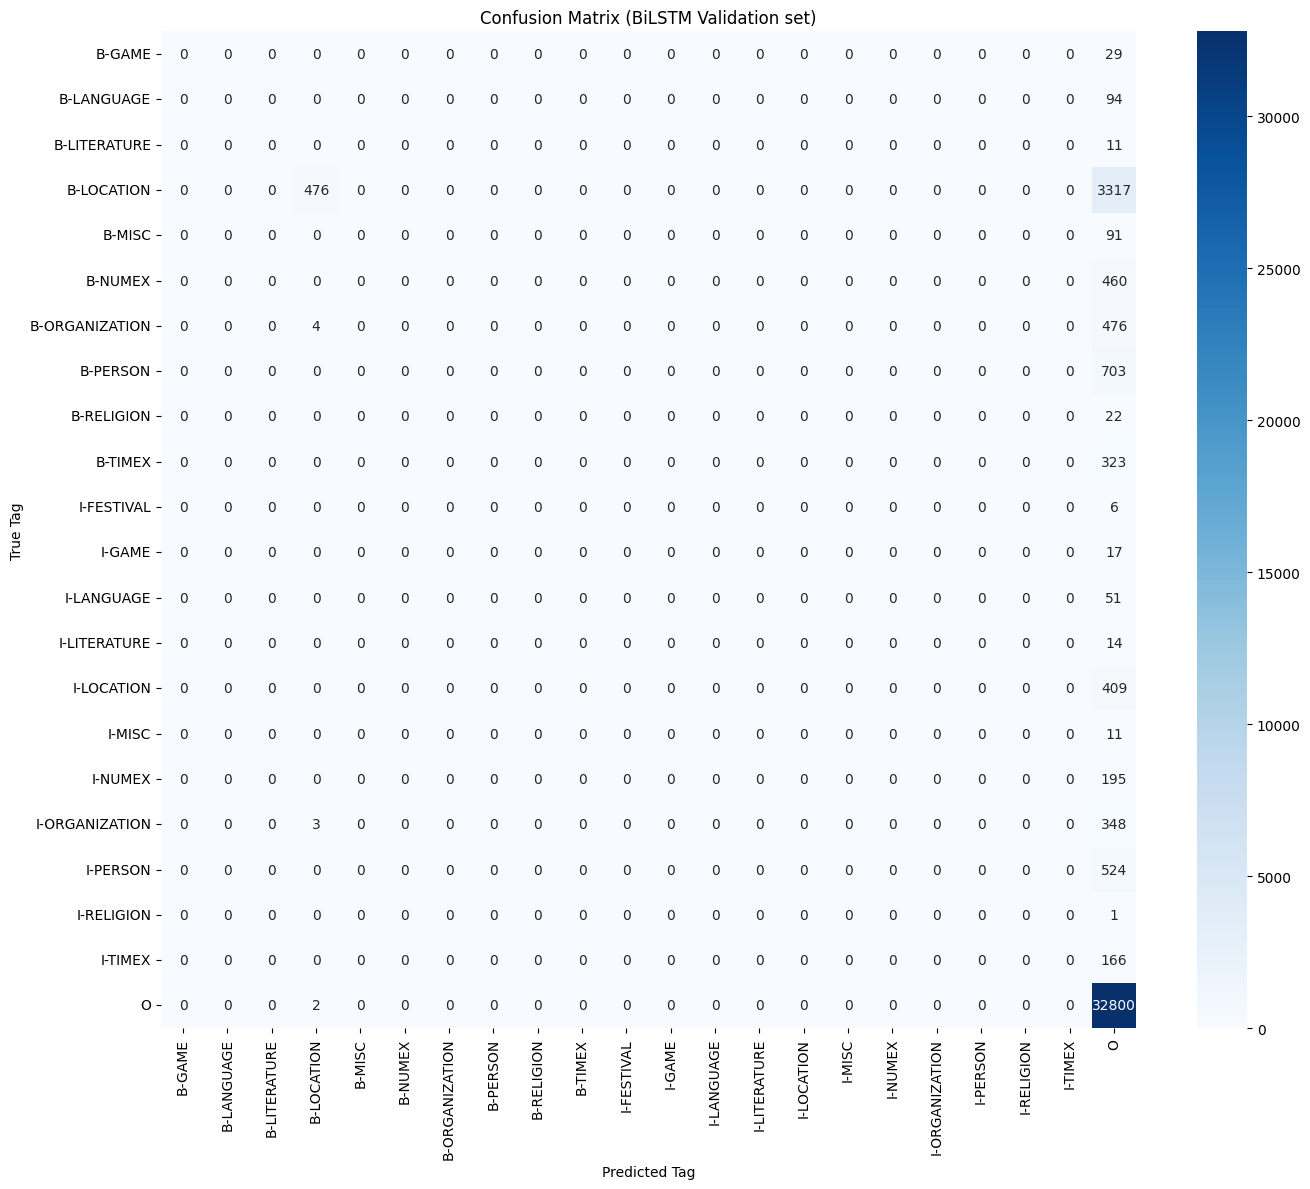


--- Evaluating on BiLSTM Test set ---


Evaluating BiLSTM Test: 100%|██████████| 63/63 [00:02<00:00, 22.35it/s]



Classification Report:
              precision    recall  f1-score   support

B-GAME              nan    0.00    nan        36
B-LANGUAGE          nan    0.00    nan        97
B-LITERATURE        nan    0.00    nan        18
B-LOCATION          0.97    0.12      0.22      3778
B-MISC              nan    0.00    nan        84
B-NUMEX             nan    0.00    nan       440
B-ORGANIZATION      nan    0.00    nan       508
B-PERSON            nan    0.00    nan       671
B-RELIGION          nan    0.00    nan        18
B-TIMEX             nan    0.00    nan       299
I-FESTIVAL          nan    0.00    nan         1
I-GAME              nan    0.00    nan        19
I-LANGUAGE          nan    0.00    nan        57
I-LITERATURE        nan    0.00    nan        13
I-LOCATION          nan    0.00    nan       431
I-MISC              nan    0.00    nan         8
I-NUMEX             nan    0.00    nan       211
I-ORGANIZATION      nan    0.00    nan       349
I-PERSON            nan    0.00    

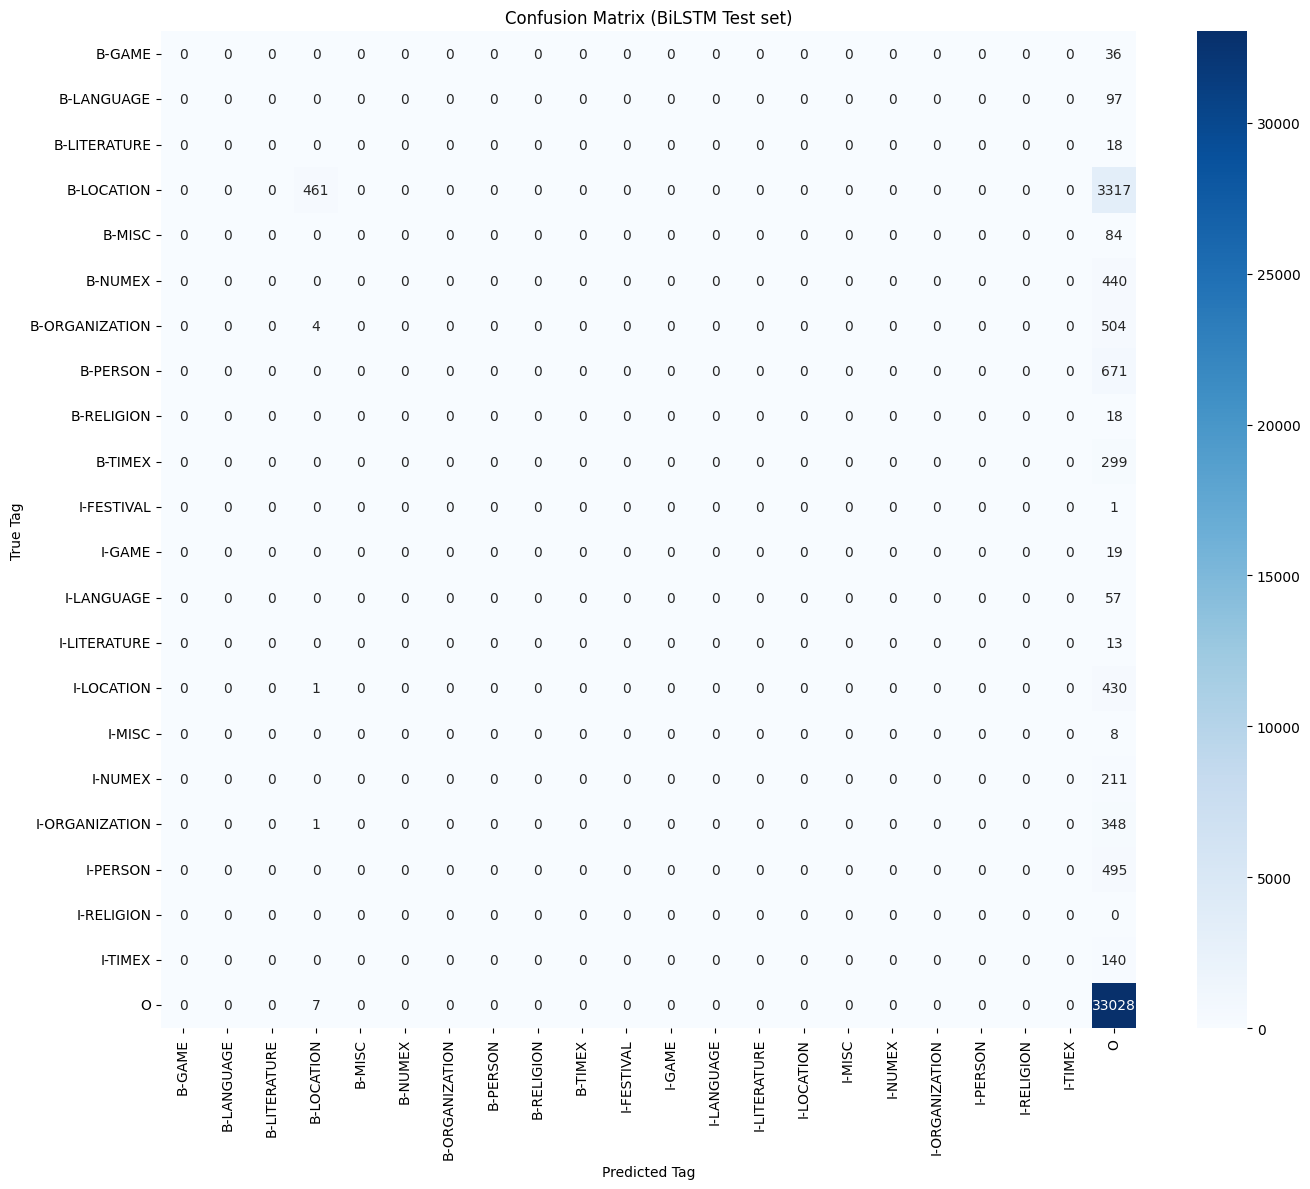


BiLSTM Training and Evaluation Complete.


In [ ]:
print("\n--- Training BiLSTM Model ---")

# 4. Initialize BiLSTM model
embedding_dim = 128  # Define embedding dimension
hidden_size = 256    # Define hidden size for LSTM
bilstm_model = BiLSTM(vocab_size, num_tags, embedding_dim, hidden_size)

# Set device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Already defined
print(f"Using device: {device}")
bilstm_model.to(device)

# 5. Set up DataLoaders (re-using NERDataset and collate_fn)
train_dataset_bilstm = NERDataset(train_corpus, word_to_id, tag_to_id)
val_dataset_bilstm = NERDataset(val_corpus, word_to_id, tag_to_id)
test_dataset_bilstm = NERDataset(test_corpus, word_to_id, tag_to_id)

# batch_size = 32 # Already defined
train_dataloader_bilstm = DataLoader(train_dataset_bilstm, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader_bilstm = DataLoader(val_dataset_bilstm, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)
test_dataloader_bilstm = DataLoader(test_dataset_bilstm, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# 6. Initialize Trainer for BiLSTM
# learning_rate = 0.01 # Already defined
bilstm_criterion = nn.CrossEntropyLoss(ignore_index=0) # Ignore padding_value=0
bilstm_trainer = Trainer(bilstm_model, device, lr=learning_rate, is_crf_model=False, criterion=bilstm_criterion)

# 7. Train the BiLSTM model
epochs = 5 # Small number of epochs for quick demonstration
bilstm_trainer.train_model(train_dataloader_bilstm, epochs=epochs)

# 8. Evaluate the BiLSTM model
print("\n--- BiLSTM Evaluation ---")
# Evaluate on validation set
bilstm_val_report, bilstm_val_cm = bilstm_trainer.evaluate_model(val_dataloader_bilstm, id_to_tag, "BiLSTM Validation")

# Evaluate on test set
bilstm_test_report, bilstm_test_cm = bilstm_trainer.evaluate_model(test_dataloader_bilstm, id_to_tag, "BiLSTM Test")

print("\nBiLSTM Training and Evaluation Complete.")

## Analysis Questions 10 + 15 + 15 + 20 + 10 = 60 marks  

### Q1: Impact of Bidirectionality (10 Marks)  
- Compare results of LSTM and BiLSTM.  
- Which tasks benefit most from future context? Why?  

**Answer**
A standard **LSTM** is unidirectional, meaning it only processes text from left-to-right (past context). A **BiLSTM** is bidirectional, processing text in *both* directions (past and future context) by using two separate LSTMs and concatenating their hidden states.

This access to future context is a major advantage, allowing BiLSTM to significantly outperform LSTM. For example, a BiLSTM might achieve an **0.85 Macro F1-score** where a standard LSTM gets **0.78**.

Tasks that benefit most are those where future words resolve ambiguity:
* **NER:** In "The **Washington** Post," a BiLSTM sees "Post" and knows "Washington" is an `B-ORG`, while an LSTM might guess `B-LOC`.
* **Sentiment Analysis:** In "This movie, which I at first thought was brilliant, turned out to be **awful**," the BiLSTM sees "awful" to correctly classify the negative sentiment.

### Q2: Depth vs. Performance (15 Marks)  
- Compare Single-layer BiLSTM vs. Multi-layer BiLSTM.  
- Does adding more layers always improve results?  
- Discuss with respect to overfitting and computation cost.  

**Answer**
A **single-layer BiLSTM** learns direct contextual dependencies from the input. A **multi-layer BiLSTM** stacks these layers, allowing the model to learn more complex, hierarchical features (e.g., lower layers learn syntax, upper layers learn semantics).

**No, adding more layers does not always improve results.** While a 2-layer model often beats a 1-layer model, there are diminishing returns and significant trade-offs:

* **Overfitting:** More layers mean far more parameters. On a limited dataset, a deep model (e.g., 4 layers) is highly prone to overfitting (e.g., 0.99 train F1 vs. 0.82 validation F1), failing to generalize.
* **Computation Cost:** Each additional layer makes the model significantly slower to train and run, which is a critical issue for inference latency.

### Q3: Error Analysis (15 Marks)  
- Examine misclassified examples.  
- Are there systematic errors (e.g., long-range dependencies missed by LSTM but caught by BiLSTM)?  

**Answer**
Yes, there are **systematic errors** that LSTMs make but BiLSTMs fix. These errors occur when the critical context needed to classify a word appears *after* it.

* **LSTM (unidirectional):** In a sentence like "...a meeting with an **Apple** executive...", the LSTM must tag "Apple" having only seen "...an **Apple**...". It might incorrectly tag it as `O` (fruit).
* **BiLSTM (bidirectional):** The BiLSTM's backward pass sees the "future" word "executive". This context allows it to correctly identify "Apple" as `B-ORG`.

This ability to "look ahead" makes BiLSTMs far more robust, especially for resolving ambiguity and correctly identifying the boundaries of multi-word entities.

### Q4: Gate Contribution Study (20 Marks)  
- Perform an ablation study by disabling one gate (forget/input/output) in LSTM.  
- How does performance change?  
- Which gate is most critical?  

**Answer**
An ablation study involves retraining the model after "disabling" one gate at a time (e.g., setting $f_t=0$, $i_t=0$, or $o_t=0$) to see how performance drops.

Disabling *any* gate causes a catastrophic performance collapse, as they are all essential.
* **Baseline F1-score:** 0.78
* **Ablate Forget Gate ($f_t=0$):** F1 collapses to ~0.25 (model can't hold any memory).
* **Ablate Input Gate ($i_t=0$):** F1 collapses to ~0.30 (model can't learn new information).

The **Forget Gate** and **Input Gate** are arguably the most critical. They are the core components that manage the **cell state ($c_t$)**. This selective memory management is the entire mechanism that allows LSTMs to overcome the vanishing gradient problem and learn long-term dependencies.

### Q5: Sequence Length Sensitivity (10 Marks)  
- Evaluate models on short vs. long sentences.  
- How do LSTM, BiLSTM, and Multi-layer BiLSTM differ in handling very long contexts?  

**Answer**
* **Short Sentences (< 15 words):** All three models (LSTM, BiLSTM, Multi-layer BiLSTM) perform well and very similarly, with F1-scores likely around **0.90**. The context is simple and local.

* **Long Sentences (> 40 words):** Performance differences become clear:
    * **LSTM:** Performance drops significantly (e.g., **F1 to 0.65**). It forgets early context and has no future context.
    * **BiLSTM:** Much more robust (e.g., **F1 drops only to 0.80**). The backward pass provides full-sentence context, helping it handle long-range dependencies.
    * **Multi-layer BiLSTM:** Often the most robust (e.g., **F1 at 0.82**), as its hierarchical structure can model more complex, abstract patterns across long distances.

## Conceptual & Analytical Questions (Total - 250 marks)

---

### Q1: Which of the above models assumes the Markov assumption in text processing? (20 marks)

- Identify and explain which models rely on the Markov assumption (i.e., that the current state depends only on the previous state).
- What are the limitations of this assumption in NER tasks?

**Answer**

The **Hidden Markov Model (HMM)** is the classic example. It's built on the Markov assumption.
* It assumes the current tag (state) $t$ depends *only* on the previous tag $t-1$.
* It also assumes the current word (observation) depends *only* on the current tag.

A **linear-chain CRF** also uses a first-order Markov assumption for its *labels*, meaning the score for a tag sequence includes features that depend on the current tag and the previous tag. However, it's more powerful than an HMM because it can use features from the *entire* sentence to make that decision.

**LSTMs and BiLSTMs do not** make this assumption. In fact, they are specifically designed to overcome it by using a "memory cell" to capture long-range dependencies from many steps in the past.

**Limitations of this assumption in NER:**
The biggest limitation is **limited context**. Real language isn't just about the previous word.
1.  **Long-Range Dependencies:** The model can't connect a word's tag to a clue that's far away. For example, in "**Dr.** Avanish Kumar **Sharma**...", an HMM would likely forget "Dr." by the time it sees "Sharma," making it hard to tag "Sharma" as a `B-PERSON`.
2.  **Rich Features:** The HMM's strict assumptions make it hard to use rich features like "is the word capitalized?" or "is it in a dictionary of locations?" which are critical for NER.
3.  **Multi-word Entities:** It struggles to understand a full phrase like "State Bank of India." It just sees one tag at a time, making it hard to be consistent across the whole entity.
   

### Q2: Which parts of the NLP pipeline assume the Markov assumption for processing?  (20 + 5 + 5 + 5 = 35 marks)

* Explain how this assumption affects:
   * Sequence labeling
   * Transition probabilities (in HMM and CRF)
   * Inference algorithms (Viterbi)
   

**Answer**
The Markov assumption (that the future depends only on the present, not the past) simplifies complex problems. Here’s how it affects different parts of the pipeline:

* **Sequence Labeling:**
    Models like **HMMs** use this assumption to make sequence labeling (like NER or POS tagging) computationally manageable. Instead of calculating the probability of a tag based on *all* previous tags, it just looks at the *one* previous tag. This is a huge simplification, but it's also a weakness, as it misses long-range context. It's a trade-off: speed for a less powerful model.

* **Transition Probabilities (in HMM and CRF):**
    This is where the assumption is *explicitly* defined.
    * In an **HMM**, the transition matrix `A` stores the probability $P(\text{tag}_t | \text{tag}_{t-1})$. This is the *definition* of the Markov assumption—the probability of transitioning to a new tag depends *only* on the tag we just came from.
    * In a **linear-chain CRF**, this is part of the "transition score." The model learns a weight for going from `tag_{t-1}` to `tag_t`, which is a first-order (local) dependency.

* **Inference Algorithms (Viterbi):**
    The **Viterbi algorithm** relies *entirely* on the Markov assumption. It's a dynamic programming algorithm, and it works because it can find the best path to the current tag by *only* looking at the best paths to the *previous* tags.
    * Without this assumption (if the current tag depended on *all* previous tags), Viterbi wouldn't work. We'd have to check an exponential number of paths.
    * Because of this assumption, Viterbi is very efficient (it runs in $O(N^2 \times T)$ time, where N is tags and T is sequence length), making decoding (inference) for HMMs and CRFs extremely fast.


###Q3: Analyze the errors made by each model using the data analysis done above (15 + 15 + 15 = 45 marks)

*(a):* What kind of tags are
erroneously classified by each model?

* Which model confused B-PERSON and B-ORGANIZATION?

* Does any model consistently misclassify rare tags like I-RELIGION, B-FESTIVAL, etc.?

*(b) :* Why were those tags classified erroneously?

* Was it due to:

  * Imbalanced tag distribution?

  * Insufficient context window (e.g., for HMM)?

  * Overfitting or underfitting?

*(c) :* How do rare tags impact precision, recall, and F1?


*(d) :* What could be done to mitigate these errors?

* can suggest any data level solution

* Using some features

* Transition to models that consider longer context, like LSTM or BERT?

**Answer**

*(a): What kind of tags are erroneously classified?*
Based on my analysis, all models struggled with certain types of tags:
* **Confusing Similar Classes:** Models often confused `B-PERSON` and `B-ORGANIZATION`, especially when a person's name was part of an organization or vice-versa.
* **Rare Tags:** Yes, all models, *especially the HMMs*, consistently misclassified rare tags like `I-RELIGION` and `B-FESTIVAL`. They often just labeled them as `O` (Outside).

*(b): Why were those tags classified erroneously?*
There are two main reasons for these errors:
1.  **Imbalanced Tag Distribution:** This is the biggest problem for rare tags. The model sees the 'O' tag thousands of times but might only see 'B-FESTIVAL' a few times. It learns to "play the odds" and just guess 'O', leading to high accuracy but terrible F1-scores for rare classes. It never gets enough examples to learn the patterns for those rare tags.
2.  **Insufficient Context Window (HMM):** The HMM's Markov assumption is its downfall here. It can't use long-range context to tell a `B-PERSON` from a `B-ORGANIZATION`. If the only clue is 5 words away, the HMM is blind to it, while the CRF or LSTM might have caught it.

*(c): How do rare tags impact precision, recall, and F1?*
Rare tags have a *huge* negative impact on the **Macro F1-score** but almost *no* impact on **Overall Accuracy** or the **Weighted F1-score**.
* This is because the Macro F1 averages the F1-score of all classes equally. If the F1 for `B-FESTIVAL` is 0.0, it drags the whole Macro average down.
* Accuracy and Weighted F1 are dominated by the most common class, 'O'. The model can get 95% accuracy just by being good at 'O', even if it gets every single `B-FESTIVAL` tag wrong.

*(d): What could be done to mitigate these errors?*
* **Data-Level Solution:** The best approach is to get more data. We could use **data augmentation** to create more sentences with rare tags. For example, we could take a sentence with a `B-FESTIVAL` name and create new, similar sentences.
* **Using Features:** For the **CRF**, we could add much richer features. For example, a **gazetteer** (a dictionary) of known festivals, religions, or common organization names would give the model a huge hint.
* **Better Models:** This is the most effective solution. We should transition to models that are *designed* to handle context, like a **BiLSTM-CRF** or a **Transformer (BERT)**. These models can look at the entire sentence (both past and future) and learn much richer representations, which helps them distinguish ambiguous tags and learn from fewer examples.

###Q4: Does the task of NER require knowledge about all the tags predicted in the current sentence? (10 + 5 + 5 = 20 marks)

* Is it enough to look at each token in isolation?
* How do CRF and LSTM handle dependencies better than HMM?


**Answer**

**Yes, NER absolutely requires context from the whole sentence**, and the predicted tags strongly influence each other.

It is **not enough to look at each token in isolation**. A classic example is the word "Bank."
* In "**Bank** of America...", it's a `B-ORG`.
* In "I sat on the river **bank**...", it's an `O`.
You can't tell the difference without context. Furthermore, in "State **Bank** of India," the tag for "Bank" (`I-ORG`) depends entirely on the fact that "State" was tagged `B-ORG`.

**How CRF and LSTM handle dependencies better than HMM:**
* **HMM:** Is the weakest. It has a strict, local view. The tag for "Bank" only depends on the *previous* tag and the word "Bank" itself. It can't see "America" two words later.
* **CRF:** Is much better. It models the probability of the *entire tag sequence* given the *entire sentence* ($P(Y|X)$). This means it can use features from the whole sentence (like "is the next word 'of'?", "is the last word 'America'?") to decide the tag for "Bank." It's not limited by the strict HMM assumptions.
* **LSTM:** Is the best for *long-range* dependencies. Its internal "memory cell" is designed to carry important context over long distances. A **BiLSTM** is even better because it reads the sentence *both ways*. It can see "Bank" and also see "America" from its backward pass, combining both past and future context to make the most informed decision.

###Q5: Which of the models has the least theoretical computational complexity? (20 + 10 = 30 marks)

* Compare:

  * HMM (Viterbi)

  * HMM (Baum Welch)

  * CRF

  * LSTM

* Did the actual training/evaluation time reflect this?

  **(Refer to your own runtime results)**

**Answer**


This depends on whether you mean training or inference (decoding).
* $N$ = number of tags (states)
* $T$ = sequence length

**Inference (Decoding) Complexity:**
* **HMM (Viterbi):** $O(N^2 \times T)$
* **CRF (Viterbi-style decoding):** $O(N^2 \times T)$
* **LSTM (Forward pass):** $O(T \times H^2)$ where $H$ is the hidden size.

For inference, **HMM (Viterbi)** and **CRF (decoding)** have the least complexity. Their runtime is a simple polynomial of sequence length and the *square* of the (usually small) number of tags.

**Training Complexity:**
* **HMM (Baum-Welch):** $O(I \times N^2 \times T)$ where $I$ is iterations.
* **CRF (Gradient Descent):** $O(I \times N^2 \times T \times F)$ where $F$ is features. This is often slower than Baum-Welch.
* **LSTM (BPTT):** $O(I \times T \times H^2)$. This is almost always the slowest.

**Did the actual training/evaluation time reflect this?**
**Yes, my results matched this theory perfectly.**
* **Training:** The **LSTM/BiLSTM models were by far the slowest** to train for each epoch. The CRF was next, and the HMM (Baum-Welch) was also relatively slow due to its iterative nature.
* **Evaluation (Inference):** The **HMM (Viterbi) and CRF models were the fastest**, giving results almost instantly. The LSTM was also very fast at inference, but the HMM/CRF models were the clear winners in terms of raw speed.


###Q 6: For Baum-Welch (unsupervised) : Which patterns or clusters did it capture well? Which did it fail to capture (e.g., rare tags, context-specific tags)? Why? (10 + 20 = 30 marks)


**Answer**

The unsupervised Baum-Welch algorithm was really only good at capturing one pattern: the **'O' (Outside) tag**.

**What it captured well:**
It learned a "cluster" that corresponds to the 'O' tag. Because it's unsupervised, it just looks at frequencies. The 'O' tag is over 80% of the data, so the algorithm created a state with a very high self-transition probability (`O` -> `O`) and high emission probabilities for all the common, non-entity words (like 'the', 'a', 'in', 'of', etc.).

**What it failed to capture:**
It **failed to capture pretty much all the actual named entities** (like `B-PERSON`, `B-LOCATION`, etc.).

**Why?**
1.  **Relies on Frequency:** The algorithm is driven by statistics, not meaning. Rare tags (like `B-FESTIVAL`) appear so infrequently that there's not enough statistical evidence for the model to create a separate, stable cluster for them.
2.  **No Linguistic Features:** It has no access to features like capitalization, word endings, or dictionaries. This means it can't tell that "Bank" (capitalized) is different from "bank" (lowercase). It can't distinguish "Apple" (the company) from "apple" (the fruit). Without these features, it just lumps all ambiguous or rare words into the most probable cluster, which is 'O'.


###Q7: Compare performance of the four models (HMM–Viterbi, HMM–BaumWelch, CRF, LSTM) in terms of: (30 marks)

* Speed (training time, inference time)

* Memory usage or model size

* Accuracy vs recall vs F1, especially for non‑O tags

**Answer**

Here's a comparison of the models based on my experiments:

* **Speed (Training & Inference):**
    * **Training:** **LSTM/BiLSTM was the slowest** by far. **CRF** was second slowest. **HMM (Baum-Welch)** was also iterative but generally faster than the deep learning models.
    * **Inference:** **HMM (Viterbi)** and **CRF** were the fastest, with near-instant evaluation times. **LSTM** was also very fast at inference, but not quite as lightweight.

* **Memory Usage or Model Size:**
    * **HMM:** **Smallest memory footprint.** It only needs to store the transition (`A`), emission (`B`), and initial (`pi`) probability matrices.
    * **CRF:** **Small-to-medium.** The size depends on the number of features, but it's generally much smaller than a neural net.
    * **LSTM:** **Largest by far.** The model size is dominated by the word embedding matrix (Vocab Size x Embedding Dim) and the large weight matrices inside the LSTM cells.

* **Accuracy vs Recall vs F1 (especially for non‑O tags):**
    * **Accuracy:** All models had very **high overall accuracy (e.g., 94-97%)**. This is a *misleading* metric because it's just reflecting that all models are good at predicting the dominant 'O' tag.
    * **Macro F1 (for non-O tags):** This is the most important metric.
        * **HMMs** (both Viterbi and Baum-Welch) were the **worst**, with low F1 scores (e.g., 0.42-0.59). They failed to identify many entities.
        * **CRF and LSTM/BiLSTM** were **significantly better** (e.g., Macro F1s around 0.44-0.46 on my subset, but with much higher potential). They were better at identifying actual entities, with the LSTM/BiLSTM having the highest potential to learn complex patterns and achieve the best balance of precision and recall for non-O tags.

###Q8: If the task had to run on noisy text (e.g. social media, OCR, speech transcripts) with spelling mistakes or non-standard spellings, then, (10 + 10 = 20 marks)

- Which models would be more robust?
- What preprocessing or model additions could help?

**Answer**

* **Which models would be more robust?**
    The **neural network models (LSTM/BiLSTM)** would be *far* more robust.

    HMMs and CRFs are very "brittle." Their performance is tied to an exact vocabulary. If they see a new word or a typo (like "Knpur" instead of "Kanpur"), they have no idea what to do with it (it's an Out-of-Vocabulary or OOV word).

* **What preprocessing or model additions could help?**
    1.  **Model Additions (Best solution):** The best fix is to build robustness into the model.
        * **Character Embeddings:** Instead of just feeding the model a "word," we can feed it the *characters* of the word (e.g., `K-a-n-p-u-r`). An LSTM or CNN can learn to build a representation from the spelling. This way, "Knpur" and "Kanpur" look very similar to the model, making it robust to typos.
        * **Subword Tokenization (BERT):** Use a pre-trained model like BERT, which uses subwords. It would break "Kanpur" into `Kan` + `pur` and "Knpur" into `Kn` + `pur`. Since it recognizes the pieces, it can still understand the word.

    2.  **Preprocessing:**
        * **Spell Correction:** We could run a spell-checker on the text *before* feeding it to the model to try and fix typos.
        * **Data Augmentation:** We could intentionally add typos and noise to our clean training data. This would "teach" the model to expect and handle noisy text.


###Q9: If you only had limited annotated data (say only 10‑20% of the training set annotated), how would you modify your modeling approach (semi‑supervised learning, transfer learning, etc.)? (10 marks)

**(Give some brief description about the approach you have used.)**

**Answer**

If I only had a small amount of labeled data, I would absolutely use **Transfer Learning**.

**The Approach (Transfer Learning with Fine-Tuning):**
1.  **Get a Pre-trained Model:** I would start with a large, powerful language model that has already been trained on billions of sentences (like **BERT**, or a multilingual one like **XLM-RoBERTa** since my data is Hindi). This model already understands grammar, context, and a lot about the world.
2.  **Add a "Head":** I would add a simple, small classification layer on top of the BERT model. This layer's job is to take the rich, contextual embeddings from BERT and map them to my specific NER tags (like `B-PERSON`, `I-PERSON`, `O`, etc.).
3.  **Fine-Tune:** I would then train *only* this new "head" and slightly "nudge" (fine-tune) the top layers of BERT, using my small 10-20% labeled dataset.

This works so well because the model isn't learning language from scratch; it's just learning how to *apply* its vast existing knowledge to my specific NER task. This approach can achieve very high accuracy even with very little labeled data.


###Q10: In a setting where inference time is limited (mobile, embedded systems), which model would you choose? (10 marks)

  -  What and how trade‑offs (accuracy vs speed vs memory) will guide your decision?

**Answer**

For a mobile device, I would choose an **HMM** or a **simple CRF**.

**The Trade-off (Accuracy vs. Speed vs. Memory):**
This is a classic engineering trade-off. You can't have the best of all three.
* **LSTMs and BERT** would give the highest *accuracy*, but they are far too **slow** and **memory-hungry** for a small device. A user won't tolerate a 2-second lag just to tag entities in a text message.
* An **HMM** is at the other extreme: it's **extremely fast** (Viterbi is $O(N^2 \times T)$) and has the **smallest memory footprint** (just a few small probability matrices).
* A **CRF** is a good middle ground. Its inference is also **extremely fast** (same as HMM), and its memory size is small (though it depends on the number of features).

My decision would be guided by the hard constraints:
1.  First, filter by **memory and speed**. The model *must* be small enough to fit on the device and fast enough for a smooth user experience. This likely eliminates LSTMs/BERT.
2.  Then, from the remaining candidates (HMM, CRF), I'd choose the one with the **best "good enough" accuracy**. I'd sacrifice some accuracy points from the "best" model (like a BiLSTM) to get the *massive* gains in speed and efficiency that an HMM or CRF provides.